In [1]:
import typing as tp
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from collections import defaultdict

# A 10% shock occuring in 10 blocks (a couple minutes) and lasting for 100 blocks (20 minutes) leads to about 3.5% of free profit for anyone paying attention. What is worse is that, because of the time delay, the price does not immediately revert when the spot price has an opposite shock. 

In [2]:
FILENAME = "mc-1627502207.7848918-filtered"

# OK, let's look at monte carlo sims. Data generated for 3 months every block assuming 15s blocks. Fit used to generate sample points assumes Levy process, with log stable increments

# Fit based on ETH/USDC 120d worth of data w 10min candles. Sim points generated every 15s

In [3]:
df = pd.read_csv(f"csv/{FILENAME}.csv")
df

Unnamed: 0        sim-0        sim-1        sim-3        sim-5  \
0                0  2239.570000  2239.570000  2239.570000  2239.570000   
1                1  2257.279939  2239.635583  2239.409648  2239.094328   
2                2  2256.965792  2239.605222  2239.267675  2239.050133   
3                3  2256.706637  2239.333992  2239.432515  2237.433049   
4                4  2257.705008  2240.500107  2239.547802  2237.308286   
...            ...          ...          ...          ...          ...   
518396      518396  4174.489419   906.705980  6157.105814   367.560558   
518397      518397  4173.715783   906.519268  6157.561302   367.610972   
518398      518398  4174.649734   906.736253  6158.126843   367.681718   
518399      518399  4174.341345   906.878986  6158.762760   367.669851   
518400      518400  4174.229295   906.757432  6159.313239   367.664499   

             sim-17       sim-22       sim-36       sim-38       sim-39  ...  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  ...   
1       2239.760435  2239.796242  2239.750602  2240.430580  2239.417710  ...   
2       2239.888765  2239.791825  2239.242870  2240.002148  2239.213937  ...   
3       2238.922973  2240.031993  2239.386863  2239.706611  2239.122091  ...   
4       2239.140346  2239.931609  2240.015802  2239.730837  2238.947734  ...   
...             ...          ...          ...          ...          ...  ...   
518396   195.905552  3314.593940   403.041701  8906.875086  3085.968418  ...   
518397   195.885391  3313.934908   402.951137  8906.405720  3086.108355  ...   
518398   195.913516  3314.246217   402.456515  8907.964768  3085.927212  ...   
518399   196.010765  3313.808611   402.236807  8907.538585  3085.025612  ...   
518400   196.045444  3314.168984   402.028579  8907.385747  3085.000625  ...   

             sim-72       sim-76       sim-77       sim-83       sim-89  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000   
1       2239.938046  2239.420321  2239.679258  2239.517582  2239.318892   
2       2240.022457  2239.233272  2239.691800  2239.240016  2239.302512   
3       2240.235425  2239.673608  2238.520212  2239.447428  2239.764958   
4       2239.934672  2240.046417  2238.285628  2239.886464  2239.934240   
...             ...          ...          ...          ...          ...   
518396  1690.435861    19.376452  2584.766372  2181.585887   962.129536   
518397  1687.754736    19.378207  2584.720787  2181.946576   962.098430   
518398  1687.885219    19.379282  2583.785731  2183.254626   962.206680   
518399  1687.746931    19.377603  2583.822224  2183.000443   962.354298   
518400  1688.047998    19.388802  2583.716263  2181.841374   962.326495   

             sim-91       sim-93       sim-94       sim-97       sim-98  
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  
1       2239.339680  2239.529045  2239.679989  2239.809589  2239.484089  
2       2239.621831  2239.378811  2239.273305  2238.563352  2239.233271  
3       2239.793826  2239.381085  2238.744148  2238.784563  2238.896240  
4       2239.995334  2238.865671  2238.706849  2238.663632  2240.015180  
...             ...          ...          ...          ...          ...  
518396  3032.097362  1067.191654  9180.367870  2834.303017  3741.589612  
518397  3031.955090  1066.845260  9180.012436  2833.928540  3740.045180  
518398  3031.872773  1067.057273  9180.881484  2833.470085  3740.032175  
518399  3032.868904  1067.320077  9180.609562  2833.829332  3740.222330  
518400  3033.163909  1067.227409  9179.096597  2833.484290  3741.181385  

[518401 rows x 32 columns]

# Start out with something relatively tame like sim 53. Calculate the TWAP over averaging times of 30m, 1h, 8h

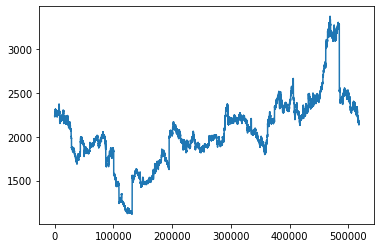

In [4]:
sim_filter = [0, 1, 3, 5, 17, 22, 36, 38, 39, 42, 43, 47, 49, 53, 55, 56, 63, 64, 65, 69, 71, 72, 76, 77, 83, 89, 91, 93, 94, 97, 98]
df['sim-53'].plot()

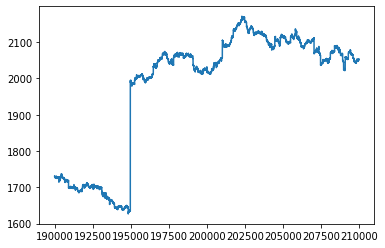

In [5]:
df['sim-53'][190000:210000].plot()

In [6]:
print(df.columns)
df = df.rename(columns={'Unnamed: 0': 'block'})
df

Index(['Unnamed: 0', 'sim-0', 'sim-1', 'sim-3', 'sim-5', 'sim-17', 'sim-22',
       'sim-36', 'sim-38', 'sim-39', 'sim-42', 'sim-43', 'sim-47', 'sim-49',
       'sim-53', 'sim-55', 'sim-56', 'sim-63', 'sim-64', 'sim-65', 'sim-69',
       'sim-71', 'sim-72', 'sim-76', 'sim-77', 'sim-83', 'sim-89', 'sim-91',
       'sim-93', 'sim-94', 'sim-97', 'sim-98'],
      dtype='object')


block        sim-0        sim-1        sim-3        sim-5  \
0            0  2239.570000  2239.570000  2239.570000  2239.570000   
1            1  2257.279939  2239.635583  2239.409648  2239.094328   
2            2  2256.965792  2239.605222  2239.267675  2239.050133   
3            3  2256.706637  2239.333992  2239.432515  2237.433049   
4            4  2257.705008  2240.500107  2239.547802  2237.308286   
...        ...          ...          ...          ...          ...   
518396  518396  4174.489419   906.705980  6157.105814   367.560558   
518397  518397  4173.715783   906.519268  6157.561302   367.610972   
518398  518398  4174.649734   906.736253  6158.126843   367.681718   
518399  518399  4174.341345   906.878986  6158.762760   367.669851   
518400  518400  4174.229295   906.757432  6159.313239   367.664499   

             sim-17       sim-22       sim-36       sim-38       sim-39  ...  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  ...   
1       2239.760435  2239.796242  2239.750602  2240.430580  2239.417710  ...   
2       2239.888765  2239.791825  2239.242870  2240.002148  2239.213937  ...   
3       2238.922973  2240.031993  2239.386863  2239.706611  2239.122091  ...   
4       2239.140346  2239.931609  2240.015802  2239.730837  2238.947734  ...   
...             ...          ...          ...          ...          ...  ...   
518396   195.905552  3314.593940   403.041701  8906.875086  3085.968418  ...   
518397   195.885391  3313.934908   402.951137  8906.405720  3086.108355  ...   
518398   195.913516  3314.246217   402.456515  8907.964768  3085.927212  ...   
518399   196.010765  3313.808611   402.236807  8907.538585  3085.025612  ...   
518400   196.045444  3314.168984   402.028579  8907.385747  3085.000625  ...   

             sim-72       sim-76       sim-77       sim-83       sim-89  \
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000   
1       2239.938046  2239.420321  2239.679258  2239.517582  2239.318892   
2       2240.022457  2239.233272  2239.691800  2239.240016  2239.302512   
3       2240.235425  2239.673608  2238.520212  2239.447428  2239.764958   
4       2239.934672  2240.046417  2238.285628  2239.886464  2239.934240   
...             ...          ...          ...          ...          ...   
518396  1690.435861    19.376452  2584.766372  2181.585887   962.129536   
518397  1687.754736    19.378207  2584.720787  2181.946576   962.098430   
518398  1687.885219    19.379282  2583.785731  2183.254626   962.206680   
518399  1687.746931    19.377603  2583.822224  2183.000443   962.354298   
518400  1688.047998    19.388802  2583.716263  2181.841374   962.326495   

             sim-91       sim-93       sim-94       sim-97       sim-98  
0       2239.570000  2239.570000  2239.570000  2239.570000  2239.570000  
1       2239.339680  2239.529045  2239.679989  2239.809589  2239.484089  
2       2239.621831  2239.378811  2239.273305  2238.563352  2239.233271  
3       2239.793826  2239.381085  2238.744148  2238.784563  2238.896240  
4       2239.995334  2238.865671  2238.706849  2238.663632  2240.015180  
...             ...          ...          ...          ...          ...  
518396  3032.097362  1067.191654  9180.367870  2834.303017  3741.589612  
518397  3031.955090  1066.845260  9180.012436  2833.928540  3740.045180  
518398  3031.872773  1067.057273  9180.881484  2833.470085  3740.032175  
518399  3032.868904  1067.320077  9180.609562  2833.829332  3740.222330  
518400  3033.163909  1067.227409  9179.096597  2833.484290  3741.181385  

[518401 rows x 32 columns]

In [7]:
prices = df['sim-53']
prices

0         2239.570000
1         2239.667466
2         2240.655710
3         2238.304510
4         2239.584944
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518401, dtype: float64

In [8]:
# This is number of blocks into the future
blocks = df['block']
blocks

0              0
1              1
2              2
3              3
4              4
           ...  
518396    518396
518397    518397
518398    518398
518399    518399
518400    518400
Name: block, Length: 518401, dtype: int64

In [9]:
# 1h price changes
# Use the geometric mean to be consistent with uni v3: https://uniswap.org/whitepaper-v3.pdf
# Compare with arithmetic mean as well ...
window_1h = 4*60

dp_1h_arith = prices.rolling(window=window_1h).sum()
dt_1h = blocks.rolling(window=window_1h).apply(lambda w: w[-1]-w[0]+1, raw=True)
dt_1h

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
518396    240.0
518397    240.0
518398    240.0
518399    240.0
518400    240.0
Name: block, Length: 518401, dtype: float64

In [10]:
twap_1h_arith = (dp_1h_arith / dt_1h)
twap_1h_arith = twap_1h_arith[~twap_1h_arith.isnull()]
twap_1h_arith

239       2238.890016
240       2238.884368
241       2238.879010
242       2238.868694
243       2238.867567
             ...     
518396    2161.297954
518397    2161.377192
518398    2161.456294
518399    2161.531477
518400    2161.606372
Length: 518162, dtype: float64

In [11]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 240 blocks in this sim
twap_1h_geo = prices.rolling(window=window_1h).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h), raw=True)
twap_1h_geo = twap_1h_geo[~twap_1h_geo.isnull()]
twap_1h_geo

239       2238.888859
240       2238.883210
241       2238.877853
242       2238.867539
243       2238.866412
             ...     
518396    2161.265451
518397    2161.344353
518398    2161.423125
518399    2161.497987
518400    2161.572553
Name: sim-53, Length: 518162, dtype: float64

In [12]:
prices_filtered = prices[239:]
prices_filtered

239       2237.622746
240       2238.214274
241       2238.381596
242       2238.179852
243       2238.034022
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518162, dtype: float64

# Compare what TWAP arithmetic, geometric vs spot look like near a spot jump

In [13]:
prices_filtered[194710:194760]

194949    1637.445701
194950    1637.247430
194951    1637.421921
194952    1636.634825
194953    1636.663335
194954    1636.650276
194955    1636.749059
194956    1635.894670
194957    1635.856624
194958    1635.430328
194959    1635.315208
194960    1634.585924
194961    1633.767173
194962    1633.765022
194963    1633.796563
194964    1634.757899
194965    1634.983232
194966    1635.193521
194967    1634.694454
194968    1634.704682
194969    1634.698519
194970    1634.724512
194971    1994.326618
194972    1990.126144
194973    1989.787615
194974    1989.552402
194975    1988.576333
194976    1988.713652
194977    1988.674788
194978    1988.696268
194979    1988.999884
194980    1989.234997
194981    1989.008158
194982    1989.095215
194983    1989.152632
194984    1989.476140
194985    1989.942940
194986    1989.624463
194987    1990.070219
194988    1989.968677
194989    1989.188977
194990    1989.960421
194991    1989.434537
194992    1989.031456
194993    1989.041240
194994    

# Notice, there's a 360 USD (22%) jump over 1 block, which is unrealistic (larger tails in log stable than in reality). Should likely use 10min data to get more realistic sense, but this is good to stress test. Will come back to using 10min data later in notebook.

In [14]:
twap_1h_arith[194710:194760]

194949    1639.848098
194950    1639.799708
194951    1639.749869
194952    1639.698266
194953    1639.645923
194954    1639.596900
194955    1639.547413
194956    1639.493362
194957    1639.437896
194958    1639.380414
194959    1639.322263
194960    1639.266878
194961    1639.208955
194962    1639.145160
194963    1639.081097
194964    1639.019885
194965    1638.955612
194966    1638.893635
194967    1638.829073
194968    1638.765166
194969    1638.699826
194970    1638.635522
194971    1640.072081
194972    1641.493586
194973    1642.917156
194974    1644.339188
194975    1645.756711
194976    1647.174849
194977    1648.592427
194978    1650.007003
194979    1651.423193
194980    1652.839931
194981    1654.260080
194982    1655.681324
194983    1657.106640
194984    1658.533988
194985    1659.963602
194986    1661.390022
194987    1662.819405
194988    1664.247851
194989    1665.675496
194990    1667.107350
194991    1668.536743
194992    1669.964004
194993    1671.391759
194994    

In [15]:
print(twap_1h_geo[194710:194760])
print(twap_1h_geo[194710:195000])

194949    1639.835271
194950    1639.786976
194951    1639.737247
194952    1639.685742
194953    1639.633503
194954    1639.584567
194955    1639.535174
194956    1639.481218
194957    1639.425854
194958    1639.368475
194959    1639.310428
194960    1639.255109
194961    1639.197238
194962    1639.133530
194963    1639.069560
194964    1639.008461
194965    1638.944333
194966    1638.882496
194967    1638.818074
194968    1638.754307
194969    1638.689118
194970    1638.624962
194971    1639.921370
194972    1641.206823
194973    1642.495581
194974    1643.783985
194975    1645.069594
194976    1646.356726
194977    1647.644333
194978    1648.929929
194979    1650.217927
194980    1651.507312
194981    1652.801287
194982    1654.097312
194983    1655.398404
194984    1656.702329
194985    1658.009225
194986    1659.314165
194987    1660.622797
194988    1661.931589
194989    1663.241168
194990    1664.555474
194991    1665.868711
194992    1667.181119
194993    1668.495054
194994    

# Timelag in the TWAP vs spot is clear. Now let's plot and add in bid/ask spread.

## Bid/ask spread based off last point added to accumluator + 99% confidence constant E_B. Limits probability of profitable trade 1h into future once TWAP catches up to spot

## dB = P_{t-1} * e^{ (1/T) * [X_t + E_B ] } - TWAP_{t}

## where T is averaging window for the TWAP.

## Q: Do we want to min the exponent so it's never less than TWAP_{t} for B nor greater than TWAP_{t} for ask?

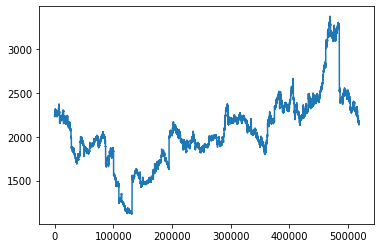

In [16]:
prices_filtered.plot()

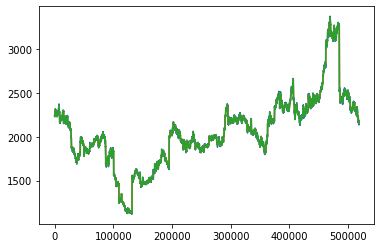

In [17]:
ax = prices_filtered.plot()
twap_1h_geo.plot(ax=ax)
twap_1h_arith.plot(ax=ax)

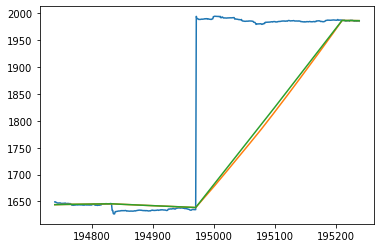

In [18]:
ax = prices_filtered[194500:195000].plot()
twap_1h_geo[194500:195000].plot(ax=ax)
twap_1h_arith[194500:195000].plot(ax=ax)

# Playing catch up over 240 blocks after spot jump with TWAP

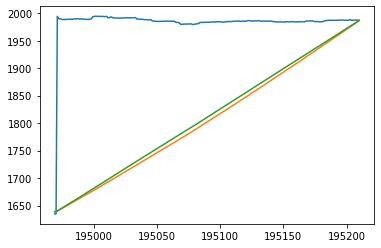

In [19]:
ax = prices_filtered[194730:194972].plot()
twap_1h_geo[194730:194972].plot(ax=ax)
twap_1h_arith[194730:194972].plot(ax=ax)

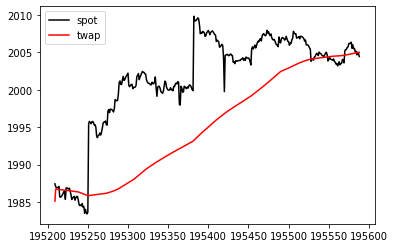

In [20]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag.png')

In [21]:
print('spot at jump', prices_filtered[195010:195015])
print('twap at jump', twap_1h_geo[195010:195015])
print('spot 1h after jump', prices_filtered[195010+window_1h:195015+window_1h])
print('twap 1h after jump', twap_1h_geo[195010+window_1h:195015+window_1h])

spot at jump 195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
Name: sim-53, dtype: float64
twap at jump 195249    1985.893596
195250    1985.848948
195251    1985.863894
195252    1985.880668
195253    1985.891454
Name: sim-53, dtype: float64
spot 1h after jump 195489    2006.375940
195490    2006.265032
195491    2006.807187
195492    2006.988585
195493    2006.943630
Name: sim-53, dtype: float64
twap 1h after jump 195489    2002.341845
195490    2002.436412
195491    2002.483630
195492    2002.530344
195493    2002.577607
Name: sim-53, dtype: float64


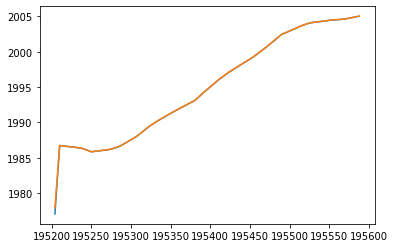

In [22]:
ax = twap_1h_geo[194965:195350].plot()
twap_1h_arith[194965:195350].plot(ax=ax)

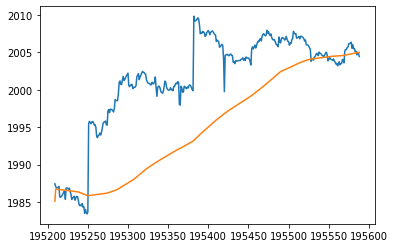

In [23]:
# Focus on only 240 block timespan to check catch up
ax = prices_filtered[194970:195350].plot()
twap_1h_geo[194970:195350].plot(ax=ax)

In [24]:
print(prices_filtered[194970:195025])
print(twap_1h_geo[194970:195025])

195209    1987.427329
195210    1987.061184
195211    1986.902750
195212    1986.925091
195213    1986.913355
195214    1987.084465
195215    1985.698910
195216    1985.637224
195217    1985.750202
195218    1985.887878
195219    1986.114328
195220    1986.326442
195221    1986.469949
195222    1985.365886
195223    1986.880659
195224    1986.879325
195225    1986.832025
195226    1986.723653
195227    1986.858808
195228    1986.403009
195229    1986.030006
195230    1985.337765
195231    1985.569617
195232    1985.600455
195233    1985.773879
195234    1985.244777
195235    1985.563615
195236    1985.743142
195237    1985.738180
195238    1985.327255
195239    1984.702402
195240    1984.520949
195241    1984.596926
195242    1984.485857
195243    1984.791574
195244    1984.313530
195245    1984.401755
195246    1983.497403
195247    1984.019650
195248    1983.589147
195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
195254    

In [25]:
# Jump in spot occurs from 195250 to 195251
print(np.log(1995.482323/1983.653382))
np.exp(0.005945500089474321/240)*np.exp(np.log(1.007))

# geometric TWAP value at 19250 is 1985.848948; 19251 is 1985.863894
1985.863894*np.exp(0.005945500089474321/240)*np.exp(np.log(1.007))

# Perfect. It's above the jump

0.005945500089474321


1999.8144818826183

In [26]:
# We could make it way more intense by instead using the current spot price as the top of the buy band ...
print(1995.482323*np.exp(0.005945500089474321/240)*np.exp(np.log(1.007)))

# Yea then it's way higher.

2009.50047983307


In [27]:
# Check that we catch up at 195251+240 = 195491
print(prices_filtered[194970:195025])
print(twap_1h_geo[195210:195265])

195209    1987.427329
195210    1987.061184
195211    1986.902750
195212    1986.925091
195213    1986.913355
195214    1987.084465
195215    1985.698910
195216    1985.637224
195217    1985.750202
195218    1985.887878
195219    1986.114328
195220    1986.326442
195221    1986.469949
195222    1985.365886
195223    1986.880659
195224    1986.879325
195225    1986.832025
195226    1986.723653
195227    1986.858808
195228    1986.403009
195229    1986.030006
195230    1985.337765
195231    1985.569617
195232    1985.600455
195233    1985.773879
195234    1985.244777
195235    1985.563615
195236    1985.743142
195237    1985.738180
195238    1985.327255
195239    1984.702402
195240    1984.520949
195241    1984.596926
195242    1984.485857
195243    1984.791574
195244    1984.313530
195245    1984.401755
195246    1983.497403
195247    1984.019650
195248    1983.589147
195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
195254    

In [28]:
# 195491    2002.483630
# Geometric twap is at 2002.483630 after an hour. Bid up with 0.7% envelope had it at 1999.8144818826183.
# So trader can profit ... 0.1334% => which is 0 after fees [x]
(2002.483630-1999.8144818826183)/1999.8144818826183

0.001334697864008307

# Ok! Bid/ask envelope seems potentially promising. Let's see it live in action. Add in envelope values to 1h TWAP for bid/ask. Don't have it adjust only on side with jump (try this later)

In [29]:
# Spread that makes unwinding over the next hour during TWAP catchup unprofitable ~99% of time
# SPREAD_X is e^X exponent component
SPREAD_X = np.log(1.00731)
SPREAD_X

0.007283411446258746

In [30]:
print('Long side price adjust up (Ask):', np.exp(SPREAD_X))
print('Short side price adjust down (Bid):', np.exp(-SPREAD_X))

Long side price adjust up (Ask): 1.00731
Short side price adjust down (Bid): 0.9927430483168043


In [31]:
twap_1h_geo_ask = twap_1h_geo.apply(lambda x: x * np.exp(SPREAD_X))
twap_1h_geo_bid = twap_1h_geo.apply(lambda x: x * np.exp(-SPREAD_X))

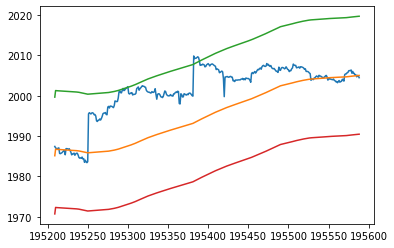

In [32]:
ax = prices_filtered[194970:195350].plot()
twap_1h_geo[194970:195350].plot(ax=ax)
twap_1h_geo_ask[194970:195350].plot(ax=ax)
twap_1h_geo_bid[194970:195350].plot(ax=ax)

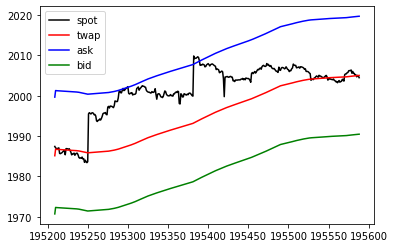

In [33]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid[194970:195350].plot(ax=ax, c='g', label='bid')
ax.legend()

In [34]:
print("prices_filtered", prices_filtered[195012:195013])
print("twap_1h_geo", twap_1h_geo[195012:195013])
print("twap_1h_geo_ask", twap_1h_geo_ask[195012:195013])
print("twap_1h_geo_bid", twap_1h_geo_bid[195012:195013])

prices_filtered 195251    1995.482323
Name: sim-53, dtype: float64
twap_1h_geo 195251    1985.863894
Name: sim-53, dtype: float64
twap_1h_geo_ask 195251    2000.380559
Name: sim-53, dtype: float64
twap_1h_geo_bid 195251    1971.452575
Name: sim-53, dtype: float64


In [35]:
1985.863894 * np.exp(SPREAD_X)

2000.38055906514

In [36]:
np.exp(SPREAD_X)

1.00731

In [37]:
0.00731 * 1985.863894

14.51666506514

# Compare the Ask value given to longs at time of jump with the TWAP value 1h into the future (used for unwind). Did the trader exit profitably while taking advantage of lag?

In [38]:
# prices at jump
print("prices_filtered at jump", prices_filtered[195012:195013])
print("twap_1h_geo at jump", twap_1h_geo[195012:195013])
print("twap_1h_geo_ask at jump", twap_1h_geo_ask[195012:195013])
print("twap_1h_geo_bid at jump", twap_1h_geo_bid[195012:195013])

prices_filtered at jump 195251    1995.482323
Name: sim-53, dtype: float64
twap_1h_geo at jump 195251    1985.863894
Name: sim-53, dtype: float64
twap_1h_geo_ask at jump 195251    2000.380559
Name: sim-53, dtype: float64
twap_1h_geo_bid at jump 195251    1971.452575
Name: sim-53, dtype: float64


In [39]:
195012 + 240

195252

In [40]:
# prices 1h after jump
print("prices_filtered 1h after jump", prices_filtered[195252:195253])
print("twap_1h_geo 1h after jump", twap_1h_geo[195252:195253])
print("twap_1h_geo_ask 1h after jump", twap_1h_geo_ask[195252:195253])
print("twap_1h_geo_bid 1h after jump", twap_1h_geo_bid[195252:195253])

prices_filtered 1h after jump 195491    2006.807187
Name: sim-53, dtype: float64
twap_1h_geo 1h after jump 195491    2002.48363
Name: sim-53, dtype: float64
twap_1h_geo_ask 1h after jump 195491    2017.121785
Name: sim-53, dtype: float64
twap_1h_geo_bid 1h after jump 195491    1987.951703
Name: sim-53, dtype: float64


In [41]:
# unwind price 1h after jump
twap_1h_geo[195252:195253]

195491    2002.48363
Name: sim-53, dtype: float64

In [42]:
# build price for long at jump (ask)
twap_1h_geo_ask[195012:195013]

195251    2000.380559
Name: sim-53, dtype: float64

In [43]:
# So profit on spread ...
(2002.48363 - 2000.380559) / 2000.380559

0.001051335452415782

# Profit on spread from time lag is about 0.1% which will get eaten by trading fees => 2 trades at 0.075% = .15%, so the time lag trade strategy is no longer profitable on this jump

# The jump here had a size of: 0.6% within a block

In [44]:
prices_filtered[195012:195013]

195251    1995.482323
Name: sim-53, dtype: float64

In [45]:
prices_filtered[195011:195012]

195250    1983.653382
Name: sim-53, dtype: float64

In [46]:
(1995.482323 - 1983.653382) / 1983.653382

0.005963209655143262

# Let's zoom out and look at bands over entire sim

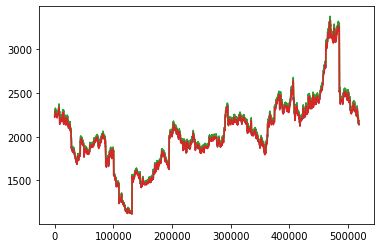

In [47]:
ax = prices_filtered.plot()
twap_1h_geo.plot(ax=ax)
twap_1h_geo_ask.plot(ax=ax)
twap_1h_geo_bid.plot(ax=ax)

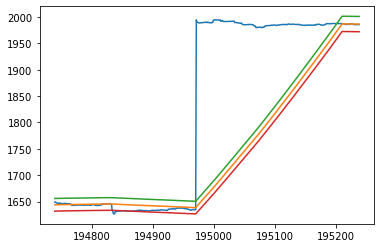

In [48]:
# Fine, but hard to see anything. Let's look at super extreme jump from 194500:195000
ax = prices_filtered[194500:195000].plot()
twap_1h_geo[194500:195000].plot(ax=ax)
twap_1h_geo_ask[194500:195000].plot(ax=ax)
twap_1h_geo_bid[194500:195000].plot(ax=ax)

# That's not good. Might want to instead have bands wrt to spot price? and only adjust up/down for side (long/short) where it's not favorable. can see issues with a massive drop ...

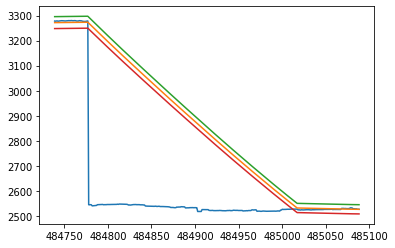

In [49]:
ax = prices_filtered[484500:484850].plot()
twap_1h_geo[484500:484850].plot(ax=ax)
twap_1h_geo_ask[484500:484850].plot(ax=ax)
twap_1h_geo_bid[484500:484850].plot(ax=ax)

# Let's look at some "relatively" normal behavior first before modifying spread function

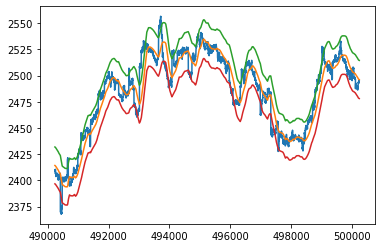

In [50]:
ax = prices_filtered[490000:500000].plot()
twap_1h_geo[490000:500000].plot(ax=ax)
twap_1h_geo_ask[490000:500000].plot(ax=ax)
twap_1h_geo_bid[490000:500000].plot(ax=ax)

# Not terrible. But ok, let's time shift the unwind TWAP 1h values 240 periods into the future and compare delta with build bid/ask prices, to plot how often timelag trade could be profitable

In [51]:
twap_1h_geo_1h_later = twap_1h_geo
twap_1h_geo_1h_later = twap_1h_geo_1h_later.shift(periods=-window_1h)
twap_1h_geo_1h_later

239       2257.076730
240       2257.226299
241       2257.378152
242       2257.527796
243       2257.678313
             ...     
518396            NaN
518397            NaN
518398            NaN
518399            NaN
518400            NaN
Name: sim-53, Length: 518162, dtype: float64

In [52]:
print(twap_1h_geo_1h_later[235:255])
print(twap_1h_geo_1h_later[len(twap_1h_geo_1h_later)-20-240:])

474    2279.186915
475    2279.215207
476    2279.234399
477    2279.251989
478    2279.269450
479    2279.286772
480    2279.307510
481    2279.323526
482    2279.341764
483    2279.359216
484    2279.380665
485    2279.404962
486    2279.428198
487    2279.453057
488    2279.478101
489    2279.502033
490    2279.526524
491    2279.551823
492    2279.576712
493    2279.598607
Name: sim-53, dtype: float64
518141    2160.249051
518142    2160.303117
518143    2160.356821
518144    2160.415235
518145    2160.473985
             ...     
518396            NaN
518397            NaN
518398            NaN
518399            NaN
518400            NaN
Name: sim-53, Length: 260, dtype: float64


# Now plot value of TWAP 1h into the future vs bands at current time

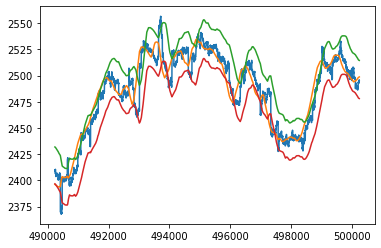

In [53]:
ax = prices_filtered[490000:500000].plot()
twap_1h_geo_1h_later[490000:500000].plot(ax=ax)
twap_1h_geo_ask[490000:500000].plot(ax=ax)
twap_1h_geo_bid[490000:500000].plot(ax=ax)

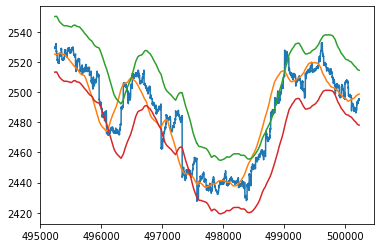

In [54]:
# zoom in ...
ax = prices_filtered[495000:500000].plot()
twap_1h_geo_1h_later[495000:500000].plot(ax=ax)
twap_1h_geo_ask[495000:500000].plot(ax=ax)
twap_1h_geo_bid[495000:500000].plot(ax=ax)

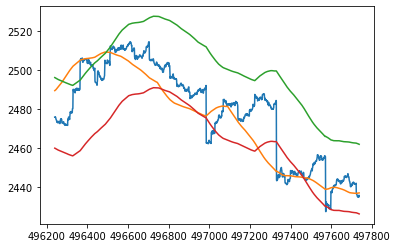

In [55]:
ax = prices_filtered[496000:497500].plot()
twap_1h_geo_1h_later[496000:497500].plot(ax=ax)
twap_1h_geo_ask[496000:497500].plot(ax=ax)
twap_1h_geo_bid[496000:497500].plot(ax=ax)

# There are select few cases where unwind value ends up being outside the bands in "normal" trading, although trading fees would take entire profit away.

# We want to prevent even the most insane jumps from printing. Use delta bw TWAP and spot. So what if we instead have:

## dB = max((spot-TWAP) * e^{ (1/T) * [E_B ] }, 0); dB is buy (long) spread
## dS = max((TWAP-spot) * e^{ (1/T) * [E_S ] }, 0); dS is sell (short) spread

In [56]:
dB = (prices_filtered*np.exp(SPREAD_X) - twap_1h_geo)
dB = dB.apply(lambda x: max(x, 0))
dB

239       15.090909
240       15.692410
241       15.866312
242       15.673407
243       15.527638
            ...    
518396    33.829128
518397    34.629117
518398    34.423515
518399    34.234038
518400    34.398050
Name: sim-53, Length: 518162, dtype: float64

In [57]:
dS = (twap_1h_geo - prices_filtered*np.exp(-SPREAD_X))
dS = dS.apply(lambda x: max(x, 0))
dS

239       17.504433
240       16.911550
241       16.740085
242       16.930051
243       17.073695
            ...    
518396     0.000000
518397     0.000000
518398     0.000000
518399     0.000000
518400     0.000000
Name: sim-53, Length: 518162, dtype: float64

In [58]:
twap_1h_geo_ask_spot_spread = twap_1h_geo + dB
twap_1h_geo_bid_spot_spread = twap_1h_geo - dS
print('twap_1h_geo_ask_spot_spread:', twap_1h_geo_ask_spot_spread)
print('twap_1h_geo_bid_spot_spread:', twap_1h_geo_bid_spot_spread)

twap_1h_geo_ask_spot_spread: 239       2253.979768
240       2254.575620
241       2254.744165
242       2254.540946
243       2254.394050
             ...     
518396    2195.094579
518397    2195.973470
518398    2195.846640
518399    2195.732025
518400    2195.970603
Name: sim-53, Length: 518162, dtype: float64
twap_1h_geo_bid_spot_spread: 239       2221.384426
240       2221.971661
241       2222.137768
242       2221.937489
243       2221.792717
             ...     
518396    2161.265451
518397    2161.344353
518398    2161.423125
518399    2161.497987
518400    2161.572553
Name: sim-53, Length: 518162, dtype: float64


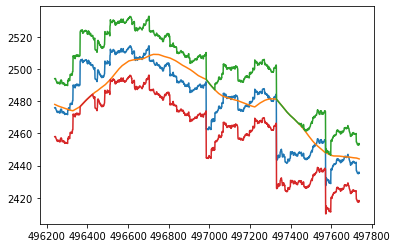

In [59]:
ax = prices_filtered[496000:497500].plot()
twap_1h_geo[496000:497500].plot(ax=ax)
twap_1h_geo_ask_spot_spread[496000:497500].plot(ax=ax)
twap_1h_geo_bid_spot_spread[496000:497500].plot(ax=ax)

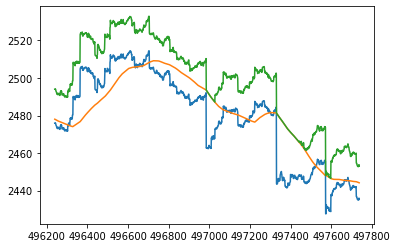

In [60]:
ax = prices_filtered[496000:497500].plot()
twap_1h_geo[496000:497500].plot(ax=ax)
twap_1h_geo_ask_spot_spread[496000:497500].plot(ax=ax)

# Ok, interesting .... will always stop at the TWAP. This isn't great. What we want is essentially the old band value to always be there. HOWEVER, when have a spike down (up), buy (sell) price stays the same BUT sell (buy) price spikes down to accomodate. So skews.

## Basically should reduce to:

## Ask: P_{t} = TWAP when TWAP > spot and = spot when TWAP < spot
## Bid: P_{t} = TWAP when TWAP < spot and = spot when TWAP > spot

## such that ...

## Ask = P_{t} * e^{E_S}
## Bid = P_{t} * e^{-E_S}

## where E_S is the spread to make it harder to make money in short term before funding kicks in -- harder to front run for users that have more info than us

In [61]:
twap_1h_geo_ask_skew = pd.concat([prices_filtered, twap_1h_geo], axis=1).max(axis=1) * np.exp(SPREAD_X)
twap_1h_geo_bid_skew = pd.concat([prices_filtered, twap_1h_geo], axis=1).min(axis=1) * np.exp(-SPREAD_X)

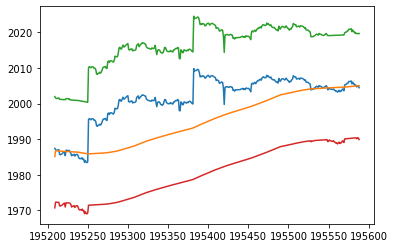

In [62]:
# Go back to the original jump ...
ax = prices_filtered[194970:195350].plot()
twap_1h_geo[194970:195350].plot(ax=ax)
twap_1h_geo_ask_skew[194970:195350].plot(ax=ax)
twap_1h_geo_bid_skew[194970:195350].plot(ax=ax)

# But isn't this susceptible to attack through manipulating the spot? Maybe?

# Let's look back at the most extreme jumps ...

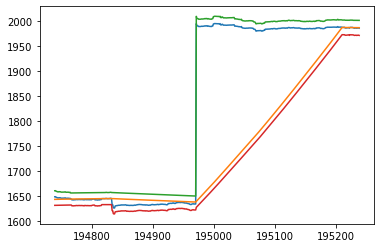

In [63]:
# Fine, but hard to see anything. Let's look at super extreme jump from 194500:195000
ax = prices_filtered[194500:195000].plot()
twap_1h_geo[194500:195000].plot(ax=ax)
twap_1h_geo_ask_skew[194500:195000].plot(ax=ax)
twap_1h_geo_bid_skew[194500:195000].plot(ax=ax)

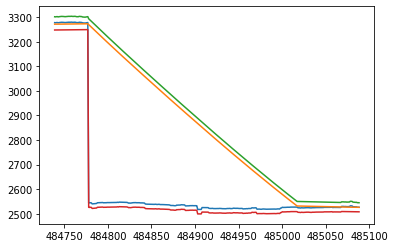

In [64]:
ax = prices_filtered[484500:484850].plot()
twap_1h_geo[484500:484850].plot(ax=ax)
twap_1h_geo_ask_skew[484500:484850].plot(ax=ax)
twap_1h_geo_bid_skew[484500:484850].plot(ax=ax)

# Definitively eliminates any chance of profit on the lag trade from the long ... but shorts will want to wait an hour for catch up in order to place next bet since they know they'll lose if they enter into a trade here.

# Problem then occurs for longs exiting? Since they get the red line but know they should wait to exit? But everyone has info spot jumped and so it's not us getting milked necessarily since they fairly made money

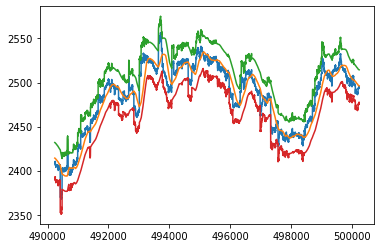

In [65]:
ax = prices_filtered[490000:500000].plot()
twap_1h_geo[490000:500000].plot(ax=ax)
twap_1h_geo_ask_skew[490000:500000].plot(ax=ax)
twap_1h_geo_bid_skew[490000:500000].plot(ax=ax)

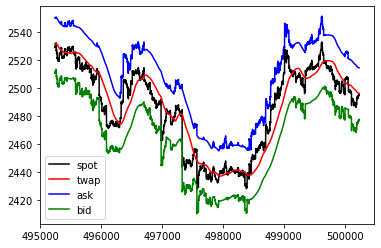

In [66]:
# zoom in ...
ax = prices_filtered[495000:500000].plot(c='k', label='spot')
twap_1h_geo[495000:500000].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[495000:500000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[495000:500000].plot(ax=ax, c='g', label='bid')
ax.legend()

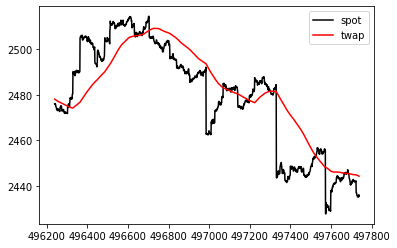

In [67]:
ax = prices_filtered[496000:497500].plot(c='k', label='spot')
twap_1h_geo[496000:497500].plot(ax=ax, c='r', label='twap')
ax.legend()

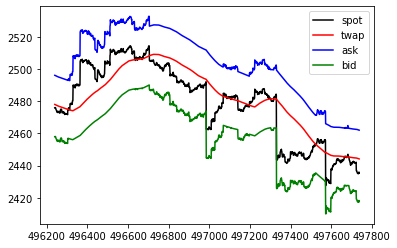

In [68]:
ax = prices_filtered[496000:497500].plot(c='k', label='spot')
twap_1h_geo[496000:497500].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[496000:497500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[496000:497500].plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_spread_vol.png')

In [69]:
print('spot entry', prices_filtered[496527-window_1h:496527-window_1h+5])
print('twap entry', twap_1h_geo[496527-window_1h:496527-window_1h+5])
print('ask entry', twap_1h_geo_ask_skew[496527-window_1h:496527-window_1h+5])
print('bid entry', twap_1h_geo_bid_skew[496527-window_1h:496527-window_1h+5])

spot entry 496526    2512.126386
496527    2512.234513
496528    2512.194264
496529    2511.817816
496530    2511.283742
Name: sim-53, dtype: float64
twap entry 496526    2495.687773
496527    2495.854993
496528    2496.023623
496529    2496.188664
496530    2496.350400
Name: sim-53, dtype: float64
ask entry 496526    2530.490030
496527    2530.598947
496528    2530.558404
496529    2530.179204
496530    2529.641226
dtype: float64
bid entry 496526    2477.576687
496527    2477.742694
496528    2477.910101
496529    2478.073944
496530    2478.234505
dtype: float64


In [70]:
print('spot exit', prices_filtered[497499:497501])
print('twap exit', twap_1h_geo[497499:497501])
print('ask exit', twap_1h_geo_ask_skew[497499:497501])
print('bid exit', twap_1h_geo_bid_skew[497499:497501])

spot exit 497738    2435.347407
497739    2435.633881
Name: sim-53, dtype: float64
twap exit 497738    2444.175897
497739    2444.125453
Name: sim-53, dtype: float64
ask exit 497738    2462.042823
497739    2461.992010
dtype: float64
bid exit 497738    2417.674208
497739    2417.958603
dtype: float64


In [71]:
print('delta spot', (2512.234513-2435.633881)/2512.234513)
print('delta twap', (2496.023623-2444.125453)/2496.023623)
print('delta short [-(ask-bid)/bid]', -(2461.992010-2477.910101)/2477.910101)

delta spot 0.030491035611371557
delta twap 0.020792339271862706
delta short [-(ask-bid)/bid] 0.006423998592029632


# Back to the original, less extreme jump plot w bid/ask spread...

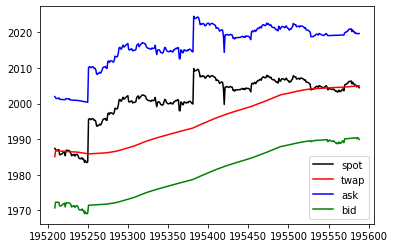

In [72]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[194970:195350].plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_spread.png')

In [73]:
print('spot at jump', prices_filtered[195010:195015])
print('twap at jump', twap_1h_geo[195010:195015])
print('ask at jump', twap_1h_geo_ask_skew[195010:195015])
print('bid at jump', twap_1h_geo_bid_skew[195010:195015])

spot at jump 195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
Name: sim-53, dtype: float64
twap at jump 195249    1985.893596
195250    1985.848948
195251    1985.863894
195252    1985.880668
195253    1985.891454
Name: sim-53, dtype: float64
ask at jump 195249    2000.410478
195250    2000.365504
195251    2010.069299
195252    2010.372638
195253    2010.195708
dtype: float64
bid at jump 195249    1969.016893
195250    1969.258105
195251    1971.452575
195252    1971.469228
195253    1971.479936
dtype: float64


In [74]:
print('spot 1h after jump', prices_filtered[195010+window_1h:195015+window_1h])
print('twap 1h after jump', twap_1h_geo[195010+window_1h:195015+window_1h])
print('ask 1h after jump', twap_1h_geo_ask_skew[195010+window_1h:195015+window_1h])
print('bid 1h after jump', twap_1h_geo_bid_skew[195010+window_1h:195015+window_1h])

spot 1h after jump 195489    2006.375940
195490    2006.265032
195491    2006.807187
195492    2006.988585
195493    2006.943630
Name: sim-53, dtype: float64
twap 1h after jump 195489    2002.341845
195490    2002.436412
195491    2002.483630
195492    2002.530344
195493    2002.577607
Name: sim-53, dtype: float64
ask 1h after jump 195489    2021.042548
195490    2020.930829
195491    2021.476948
195492    2021.659672
195493    2021.614387
dtype: float64
bid 1h after jump 195489    1987.810947
195490    1987.904828
195491    1987.951703
195492    1987.998078
195493    1988.044998
dtype: float64


# And for entire span of timeseries data ...

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


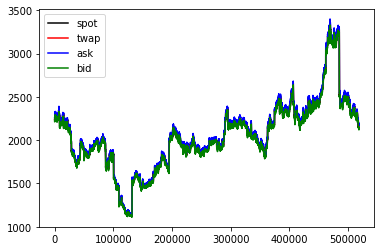

In [75]:
ax = prices_filtered.plot(c='k', label='spot')
twap_1h_geo.plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew.plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew.plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_spread_all.png')

In [76]:
# 3 months of data ...
500000*15.0/86400.0

86.80555555555556

# Ok. Seems to be handling jumps nicely. Now, let's look at profitability of the long lag trade by examining ask price (long's build price) vs bid price 1h into the future (long's unwind price)

In [77]:
twap_1h_geo_ask_skew_1h_later = twap_1h_geo_ask_skew.shift(periods=-window_1h)
twap_1h_geo_bid_skew_1h_later = twap_1h_geo_bid_skew.shift(periods=-window_1h)

In [78]:
print(twap_1h_geo_ask_skew[240:260])
print(twap_1h_geo_ask_skew_1h_later[:20])

479    2291.640118
480    2290.717823
481    2291.442954
482    2290.696155
483    2290.756926
484    2290.702931
485    2290.418495
486    2290.858042
487    2290.854230
488    2290.786291
489    2291.108474
490    2290.913732
491    2290.807520
492    2290.883919
493    2290.909398
494    2290.396761
495    2290.415955
496    2293.653069
497    2293.466396
498    2293.740934
dtype: float64
239    2291.640118
240    2290.717823
241    2291.442954
242    2290.696155
243    2290.756926
244    2290.702931
245    2290.418495
246    2290.858042
247    2290.854230
248    2290.786291
249    2291.108474
250    2290.913732
251    2290.807520
252    2290.883919
253    2290.909398
254    2290.396761
255    2290.415955
256    2293.653069
257    2293.466396
258    2293.740934
dtype: float64


In [79]:
# Look at long scalp lag trade PnL. Compare the ask (long's build price) with the time-shifted bid (long's unwind price)
dp_long_scalp_skew = twap_1h_geo_bid_skew_1h_later / twap_1h_geo_ask_skew - 1
dp_long_scalp_skew[:100]

239   -0.006455
240   -0.006387
241   -0.006318
242   -0.006247
243   -0.006180
         ...   
334   -0.009292
335   -0.008935
336   -0.009247
337   -0.009473
338   -0.009414
Length: 100, dtype: float64

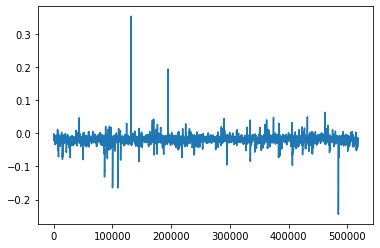

In [80]:
dp_long_scalp_skew.plot()

# Hmm how is there a positive 0.3 price delta? Zoom in ...

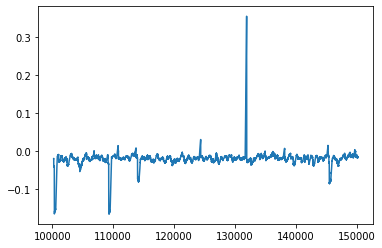

In [81]:
dp_long_scalp_skew[100000:150000].plot()

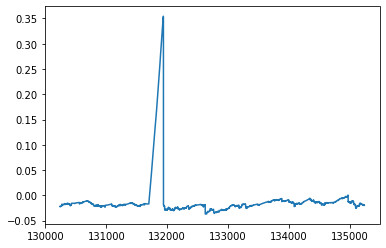

In [82]:
dp_long_scalp_skew[130000:135000].plot()

# Looks weird. Examine price data around there ...

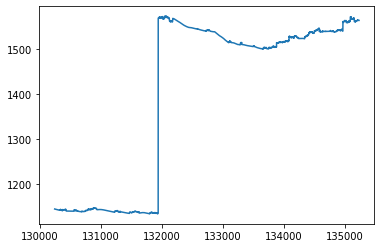

In [83]:
twap_1h_geo_ask_skew[130000:135000].plot()

# Oh, it's my time shift? Since user got in RIGHT before jump. so of course they'll make money. Check to be sure

In [84]:
print(twap_1h_geo_ask_skew[131700:131702])

131939    1137.090463
131940    1569.021661
dtype: float64


In [85]:
dp_long_scalp_skew[131700:131702]

131939    0.353228
131940   -0.019422
dtype: float64

# Ok good. Confirmed - only made money by getting in BEFORE jump occurs. After jump occurs, 1h scalp is no longer profitable. Still issues with manipulation, but this requires knowing price will jump. Either have to manipulate the price to do this (COA analysis) or have info on jump prior to it happening.

## Do we want market impact fees to prevent the latter?

# Check from plot with bands ...

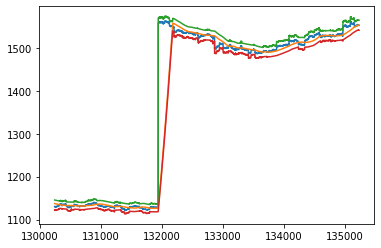

In [86]:
ax = prices_filtered[130000:135000].plot()
twap_1h_geo[130000:135000].plot(ax=ax)
twap_1h_geo_ask_skew[130000:135000].plot(ax=ax)
twap_1h_geo_bid_skew[130000:135000].plot(ax=ax)

# Zoom in ...

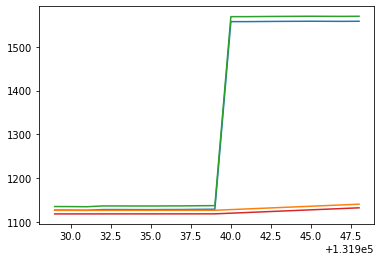

In [87]:
ax = prices_filtered[131690:131710].plot()
twap_1h_geo[131690:131710].plot(ax=ax)
twap_1h_geo_ask_skew[131690:131710].plot(ax=ax)
twap_1h_geo_bid_skew[131690:131710].plot(ax=ax)

In [88]:
# entry price still higher at moment of jump
(1569.021661 - 1137.090463) / 1137.090463

0.37985649519953807

# Look at long entry price (ask) vs long exit price (bid 1h later) on the jump up in price

## => Will only be profitable if user enters long trade BEFORE jump. Ask > bid+1h after jump

### ... suggests need to be manipulating spot OR trader knows jump is coming

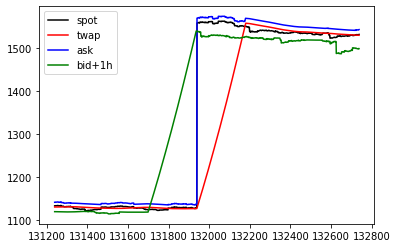

In [89]:
ax = prices_filtered[131000:132500].plot(c='k', label='spot')
twap_1h_geo[131000:132500].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[131000:132500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_1h_later[131000:132500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

# Look at short entry price (bid) vs short exit price (ask 1h later) on the jump up in price

## => Will never be profitable. Ask+1h > bid

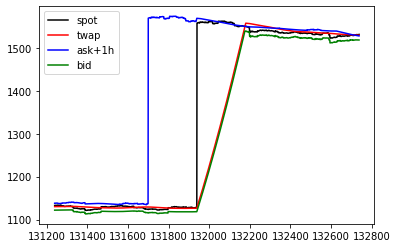

In [90]:
ax = prices_filtered[131000:132500].plot(c='k', label='spot')
twap_1h_geo[131000:132500].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew_1h_later[131000:132500].plot(ax=ax, c='b', label='ask+1h')
twap_1h_geo_bid_skew[131000:132500].plot(ax=ax, c='g', label='bid')
ax.legend()

# What's the average of the pnl on the trade. Careful here since not normally distributed so sample mean, sample variance aren't good to use

In [91]:
dp_long_scalp_skew_sample_mean = dp_long_scalp_skew.sum() / len(dp_long_scalp_skew)
dp_long_scalp_skew_sample_variance = ((dp_long_scalp_skew - dp_long_scalp_skew_sample_mean)**2).sum() / len(dp_long_scalp_skew)
print('sample mean', dp_long_scalp_skew_sample_mean)
print('sample variance', dp_long_scalp_skew_sample_variance)

sample mean -0.018517701378862626
sample variance 0.00018433876776685732


# And for the short lag trade?

In [92]:
# Look at short scalp lag trade PnL. Compare the bid (short's build price) with the time-shifted ask (short's unwind price)
dp_short_scalp_skew = 1 - twap_1h_geo_ask_skew_1h_later / twap_1h_geo_bid_skew
dp_short_scalp_skew[:100]

239   -0.031627
240   -0.030939
241   -0.031189
242   -0.030945
243   -0.031040
         ...   
334   -0.030714
335   -0.030692
336   -0.030492
337   -0.030547
338   -0.030697
Length: 100, dtype: float64

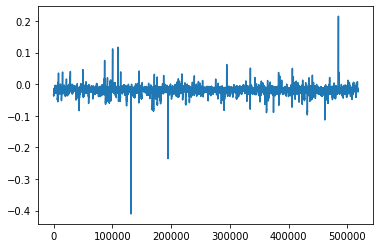

In [93]:
dp_short_scalp_skew.plot()

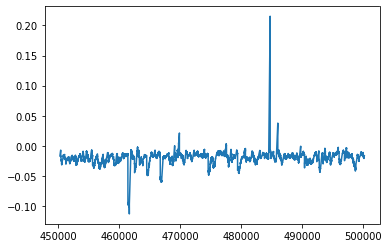

In [94]:
dp_short_scalp_skew[450000:500000].plot()

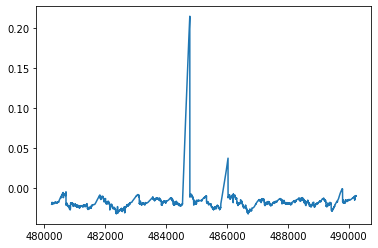

In [95]:
dp_short_scalp_skew[480000:490000].plot()

# Make sure short trade with 20% pnl needs to be entered into BEFORE jump occurred

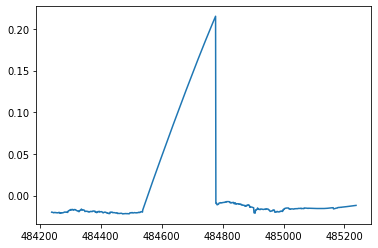

In [96]:
dp_short_scalp_skew[484000:485000].plot()

In [97]:
dp_short_scalp_skew[484000:485000]

484239   -0.019961
484240   -0.020155
484241   -0.019958
484242   -0.020133
484243   -0.020069
            ...   
485234   -0.011973
485235   -0.011927
485236   -0.011877
485237   -0.011826
485238   -0.011781
Length: 1000, dtype: float64

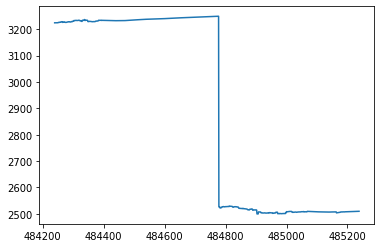

In [98]:
twap_1h_geo_bid_skew[484000:485000].plot()

In [99]:
print(twap_1h_geo_bid_skew[484538:484540])

484777    3249.480660
484778    2526.076849
dtype: float64


In [100]:
-(2526.076849 - 3249.480660) / 3249.480660

0.22262136220869216

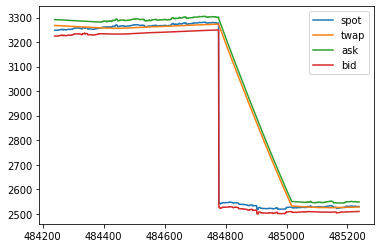

In [101]:
ax = prices_filtered[484000:485000].plot(label='spot')
twap_1h_geo[484000:485000].plot(ax=ax, label='twap')
twap_1h_geo_ask_skew[484000:485000].plot(ax=ax, label='ask')
twap_1h_geo_bid_skew[484000:485000].plot(ax=ax, label='bid')
ax.legend()

In [102]:
dp_short_scalp_skew_sample_mean = dp_short_scalp_skew.sum() / len(dp_short_scalp_skew)
dp_short_scalp_skew_sample_variance = ((dp_short_scalp_skew - dp_short_scalp_skew_sample_mean)**2).sum() / len(dp_short_scalp_skew)
print('sample mean', dp_short_scalp_skew_sample_mean)
print('sample variance', dp_short_scalp_skew_sample_variance)

sample mean -0.01903631428800741
sample variance 0.0002384172226334628


# OK. Bid adjusts properly. Looks good for short trade.

# Look at long entry price (ask) vs long exit price (bid 1h later) on the jump down in price

## => Will never be profitable. ask > bid+1h

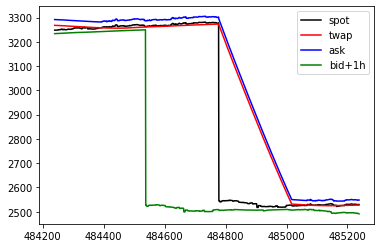

In [103]:
ax = prices_filtered[484000:485000].plot(c='k', label='spot')
twap_1h_geo[484000:485000].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[484000:485000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_1h_later[484000:485000].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

# Look at short entry price (bid) vs short exit price (ask 1h later) on the jump up in price

## => Will only be profitable if user enters short trade BEFORE jump. Ask+1h > bid after jump

### ... suggests need to be manipulating spot OR trader knows jump is coming

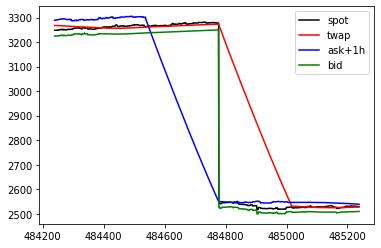

In [104]:
ax = prices_filtered[484000:485000].plot(c='k', label='spot')
twap_1h_geo[484000:485000].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew_1h_later[484000:485000].plot(ax=ax, c='b', label='ask+1h')
twap_1h_geo_bid_skew[484000:485000].plot(ax=ax, c='g', label='bid')
ax.legend()

# What about if we compare with the non-skewed approach?

## As in, where diff with spot isn't accounted for and we just have bands

In [105]:
twap_1h_geo_ask_1h_later = twap_1h_geo_ask.shift(periods=-window_1h)
twap_1h_geo_bid_1h_later = twap_1h_geo_bid.shift(periods=-window_1h)

In [106]:
print(twap_1h_geo_ask[240:260])
print(twap_1h_geo_ask_1h_later[:20])

479    2273.575961
480    2273.726623
481    2273.879586
482    2274.030324
483    2274.181942
484    2274.343914
485    2274.506417
486    2274.687491
487    2274.869002
488    2275.051531
489    2275.231639
490    2275.411111
491    2275.590810
492    2275.769565
493    2275.948084
494    2276.126046
495    2276.303252
496    2276.498537
497    2276.693118
498    2276.888693
Name: sim-53, dtype: float64
239    2273.575961
240    2273.726623
241    2273.879586
242    2274.030324
243    2274.181942
244    2274.343914
245    2274.506417
246    2274.687491
247    2274.869002
248    2275.051531
249    2275.231639
250    2275.411111
251    2275.590810
252    2275.769565
253    2275.948084
254    2276.126046
255    2276.303252
256    2276.498537
257    2276.693118
258    2276.888693
Name: sim-53, dtype: float64


In [107]:
dp_long_scalp = twap_1h_geo_bid_1h_later / twap_1h_geo_ask - 1
dp_long_scalp

239      -0.006455
240      -0.006387
241      -0.006318
242      -0.006247
243      -0.006180
            ...   
518396         NaN
518397         NaN
518398         NaN
518399         NaN
518400         NaN
Name: sim-53, Length: 518162, dtype: float64

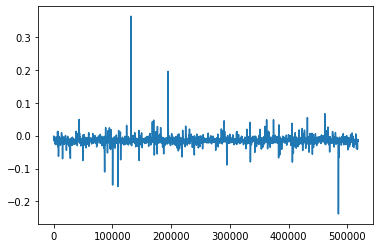

In [108]:
dp_long_scalp.plot()

In [109]:
dp_long_scalp_sample_mean = dp_long_scalp.sum() / len(dp_long_scalp)
dp_long_scalp_sample_variance = ((dp_long_scalp - dp_long_scalp_sample_mean)**2).sum() / len(dp_long_scalp)
print('sample mean', dp_long_scalp_sample_mean)
print('sample variance', dp_long_scalp_sample_variance)

sample mean -0.014388536605569505
sample variance 0.0001691201138230575


# Still not bad actually. But in reality would likely be worse given smart traders

# Test against adam's bump up, which seems to mimic a spot manipulation.

# Two cases to consider:

## 1. I enter a long w max leverage and increase spot price significantly over a few blocks

## 2. I manipulate spot price up over a few blocks and enter a short at the top

## In either case, can I EXIT with substantial profit after a few blocks << avg window?

In [110]:
def rsign():
    return 1 if np.random.random() < 0.5 else -1

In [111]:
class RandomFeed:
    def __init__(self,
                 vol,
                 px: float,
                 #mid,
                 window: int,
                 dist_args=None,
                 distribution=np.random.normal,
                 **kwargs):
        '''Args:
            vol: volatility
            px: beginning px for history
            mid: the market id
            window: the length of the windowSize for TWAP
            dist_args: args that go into the distribution;
                for a gaussian, the center and the std
            
        '''

        self.distribution = distribution
        self.vol = vol
        self.px = px
        #self.id = mid
        self.window = window
        self.dist_args = (0,1)
        self.block_times = [0]
        self.cumul_px = [px]
        self.prices = [px]
        self.twaps = []
        self.returns = []
        self.kwargs = kwargs

    @staticmethod
    def block_time():
        # time it took to mine ith block in seconds
        return 13.23 + rsign()*np.random.rand()
    
    def get_returns(self, arr:np.array):
        # to get returns of any series
        arr_init = np.roll(arr, 1)
        returns = (arr/arr_init) - 1
        return returns[1:] #delete spurious return
    
    def get_twap(self, i:int, window=-1):
        if window < 0:
            window = self.window
        #ith block , window is number of blocks we average over
        if i < self.window:
            return
        else:
            return (self.cumul_px[i] - self.cumul_px[i - window])/window
    
    def update(self, modify_vol=False, **kwargs):      
        #WARNING!  an in-place method that mutates the class                                             
                                                     
        delta = self.get_delta(**kwargs)
        self.px += (self.vol * delta) 
        
        if self.px <= 0:
             raise Exception('the market price went to zero')
               
        block_time = self.block_time()
        
        #here we populate all the dynamic lists and 
        self.prices.append(self.px)
        self.cumul_px.append(self.cumul_px[-1] + block_time*self.px)
        self.block_times.append(block_time)
        self.returns.append(self.prices[-1]/self.prices[-2] - 1)
        
        if modify_vol:
            self.vol = kwargs['vol']

    def get_delta(self, **kwargs):
        #if the % moves are small relative to self.px, then the trader results will be unrealistic. 
        #px needs to move as a % of the price level to reflect compounding
        if kwargs.get('pct', False):
            standard_dev = self.vol*self.px/100   
            center = standard_dev/10  #self.dist_args[0]
            args = (center, standard_dev)
            delta = self.distribution(*args)  # if self.dist_args else self.distribution()    
        else:
            delta = self.distribution(*self.dist_args) if self.dist_args else self.distribution()
        delta = self.distribution(*self.dist_args) if self.dist_args else self.distribution()
        return delta  
    


In [112]:
np.random.seed(1)
markets = {
    0:RandomFeed(vol=1, px = 1e3, window=50, dist_args=(0, 1)),
    #1:RandomFeed(vol=1, px = 1e3, window=150, dist_args=(0, 1)),
    #2:RandomFeed(vol=1, px = 1e3, window=300, dist_args=(0, 1)),
    #3:RandomFeed(vol=1, px = 1e3, window=150, dist_args=(0, 1)),
    }
m = markets[0]
for _ in range(10000):
    m.update()

In [113]:
### test your get_returns method
rets = m.get_returns(m.prices)
all(map(np.isclose, m.returns, rets))

True

In [114]:
twaps = np.array([m.get_twap(i) for i in range(50,10000)])

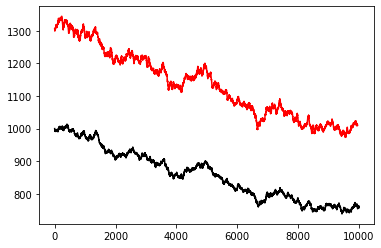

In [115]:
plt.plot(m.prices, c='k')
plt.plot(twaps/10, c='r')

# The TWAP and the spot price are very different numbers , what about the returns?

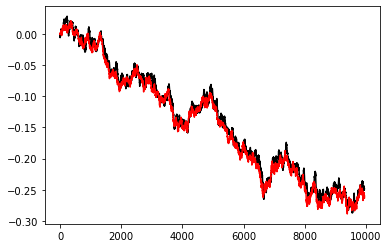

In [116]:
twap_crets = np.cumsum(m.get_returns(twaps))
crets = np.cumsum(m.returns[m.window:])

plt.plot(twap_crets, c='k')
plt.plot(crets, c='r')

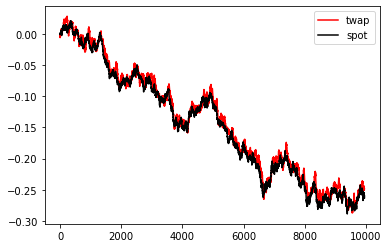

In [117]:
plt.plot(twap_crets, c='r', label='twap')
plt.plot(crets, c='k', label='spot')
plt.legend()

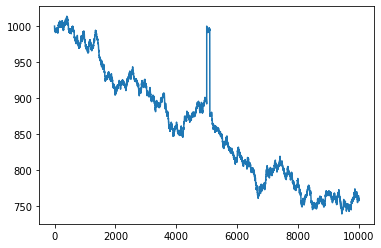

In [118]:
prices_w_shock_norm = m.prices.copy()
shock_block = 5000
for i in range(100):
    prices_w_shock_norm[shock_block + i] = prices_w_shock_norm[i]  
plt.plot(prices_w_shock_norm)

# Recalculate TWAP here from prices_w_shock since something's up w scale on Adam's TWAP

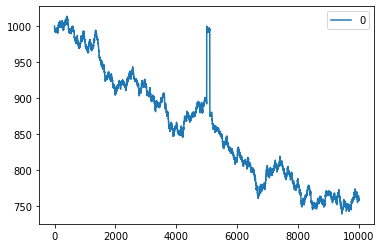

In [119]:
df_prices_w_shock = pd.DataFrame(data=prices_w_shock_norm)
df_prices_w_shock.plot(label='spot')

In [120]:
window_40 = 40
window_50 = 50
window_150 = 150
window_240 = 240

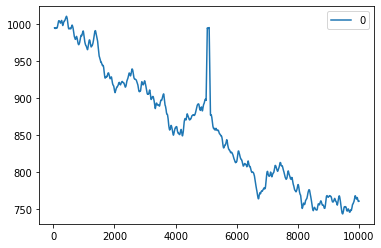

In [121]:
df_twap_40_geo_w_shock = df_prices_w_shock.rolling(window=window_40).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_40), raw=True)
df_twap_40_geo_w_shock = df_twap_40_geo_w_shock[~df_twap_40_geo_w_shock.isnull()]
df_twap_40_geo_w_shock.plot()

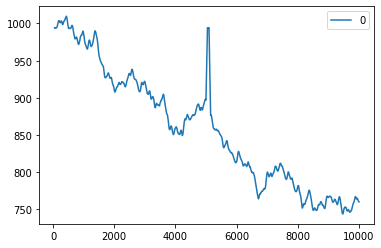

In [122]:
df_twap_50_geo_w_shock = df_prices_w_shock.rolling(window=window_50).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_50), raw=True)
df_twap_50_geo_w_shock = df_twap_50_geo_w_shock[~df_twap_50_geo_w_shock.isnull()]
df_twap_50_geo_w_shock.plot()

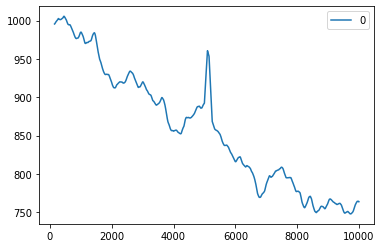

In [123]:
df_twap_150_geo_w_shock = df_prices_w_shock.rolling(window=window_150).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_150), raw=True)
df_twap_150_geo_w_shock = df_twap_150_geo_w_shock[~df_twap_150_geo_w_shock.isnull()]
df_twap_150_geo_w_shock.plot()

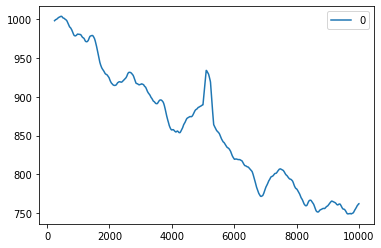

In [124]:
df_twap_240_geo_w_shock = df_prices_w_shock.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_shock = df_twap_240_geo_w_shock[~df_twap_240_geo_w_shock.isnull()]
df_twap_240_geo_w_shock.plot()

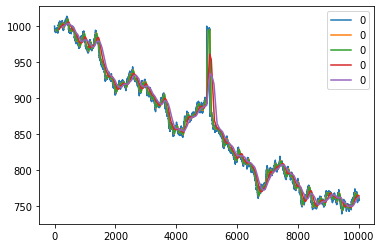

In [125]:
ax = df_prices_w_shock.plot(label='spot')
df_twap_40_geo_w_shock.plot(ax=ax, label='twap-40')
df_twap_50_geo_w_shock.plot(ax=ax, label='twap-50')
df_twap_150_geo_w_shock.plot(ax=ax, label='twap-150')
df_twap_240_geo_w_shock.plot(ax=ax, label='twap-240')
ax.legend()

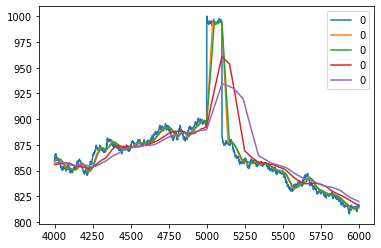

In [126]:
ax = df_prices_w_shock[4000:6000].plot(label='spot')
df_twap_40_geo_w_shock[4000:6000].plot(ax=ax, label='twap-40')
df_twap_50_geo_w_shock[4000:6000].plot(ax=ax, label='twap-50')
df_twap_150_geo_w_shock[4000:6000].plot(ax=ax, label='twap-150')
df_twap_240_geo_w_shock[4000:6000].plot(ax=ax, label='twap-240')
ax.legend()

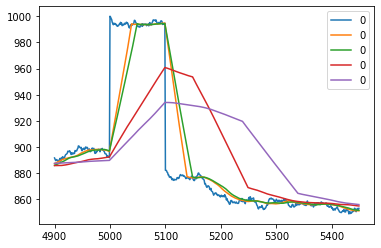

In [127]:
shock_time = 5000
ax = df_prices_w_shock[shock_time-100:shock_time+450].plot(label='spot')
df_twap_40_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-40')
df_twap_50_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-50')
df_twap_150_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-150')
df_twap_240_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-240')
ax.legend()

# Analyze the most extreme lag case with window of 240 ...

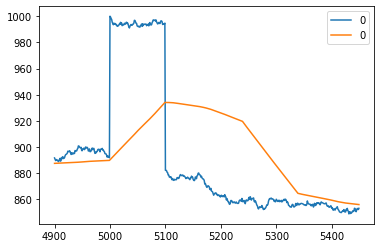

In [128]:
ax = df_prices_w_shock[shock_time-100:shock_time+450].plot(label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+450].plot(ax=ax, label='twap-240')
ax.legend()

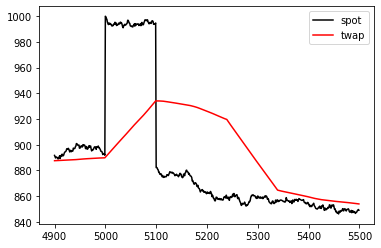

In [129]:
plt.plot(df_prices_w_shock[shock_time-100:shock_time+500], c='k', label='spot')
plt.plot(df_twap_240_geo_w_shock[shock_time-100:shock_time+500], c='r', label='twap')

plt.legend()
plt.savefig('png/sim_twap_attack.png')

# Calculate the bid/ask with spread using skew formula:

## Ask: P_{t} = TWAP when TWAP > spot and = spot when TWAP < spot
## Bid: P_{t} = TWAP when TWAP < spot and = spot when TWAP > spot

## such that ...

## Ask = P_{t} * e^{E_S}
## Bid = P_{t} * e^{-E_S}

In [130]:
df_twap_240_geo_w_shock_ask_skew = pd.concat([df_prices_w_shock, df_twap_240_geo_w_shock], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_shock_bid_skew = pd.concat([df_prices_w_shock, df_twap_240_geo_w_shock], axis=1).min(axis=1) * np.exp(-SPREAD_X)

In [131]:
SPREAD_X

0.007283411446258746

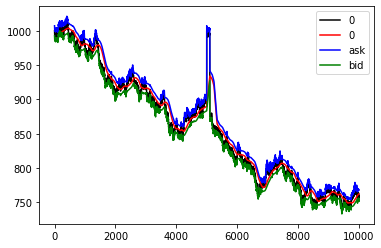

In [132]:
ax = df_prices_w_shock.plot(c='k', label='spot')
df_twap_240_geo_w_shock.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

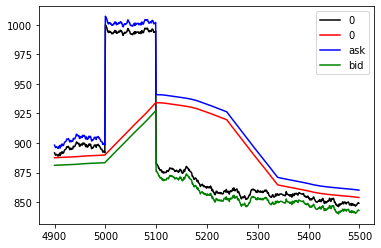

In [133]:
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_bid_skew[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid')
ax.legend()

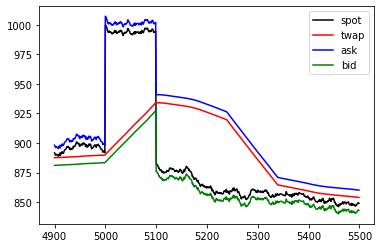

In [134]:
plt.plot(df_prices_w_shock[shock_time-100:shock_time+500], c='k', label='spot')
plt.plot(df_twap_240_geo_w_shock[shock_time-100:shock_time+500], c='r', label='twap')
plt.plot(df_twap_240_geo_w_shock_ask_skew[shock_time-100:shock_time+500], c='b', label='ask')
plt.plot(df_twap_240_geo_w_shock_bid_skew[shock_time-100:shock_time+500], c='g', label='bid')

plt.legend()
plt.savefig('png/sim_twap_attack_spread.png')

# Ask -- Entry price for longs, Exit price for shorts
# Bid -- Entry price for shorts, Exit price for longs

# Analyze PnL if I do attack trades 1. & 2. above over 240 block window.

## Do this by looking at PnL of long and of short trade (similar to before with mc sim path), exiting after 1h in trade

## 1. long: entry at ask, exit at bid
## 2. short: entry at bid, exit at ask

In [135]:
df_twap_240_geo_w_shock_ask_skew_1h_later = df_twap_240_geo_w_shock_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_shock_bid_skew_1h_later = df_twap_240_geo_w_shock_bid_skew.shift(periods=-window_240)

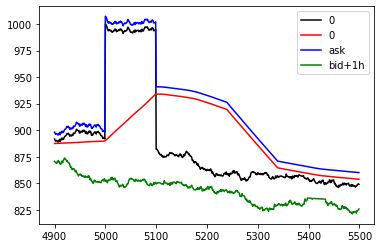

In [136]:
# trade 1 (long): ... yes it looks impossible to profit since blue > green_1h_later for entire graph
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_bid_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

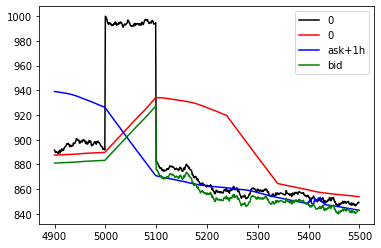

In [137]:
# trade 2 (short): After halfway through the spot manipulation, if I enter into a short, I would have made ~ 4% profit ... due to drift down after?
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_ask_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_shock_bid_skew[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid')
ax.legend()

# With trade 2 here I made 4% from shorting immediately after spike back down. Cost to produce spike on spot for 20M pool is about 50M.

# Cost of attack including capital to overcome 50M sunk cost with offered max leverage of 5x is 50M/0.2 = 250M

## Is this 4% profit simply due to drift down after? or is it an attack?

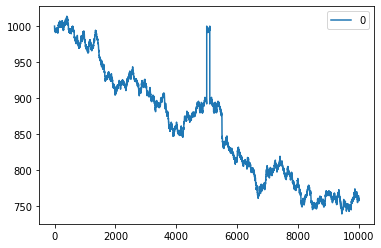

In [138]:
prices_w_shock_and_plateau = df_prices_w_shock[0].to_numpy().copy()
prices_w_shock_and_plateau
for i in range(400):
    prices_w_shock_and_plateau[shock_block + 100 + i] = prices_w_shock_and_plateau[shock_block - i]

df_prices_w_shock_and_plateau = pd.DataFrame(data=prices_w_shock_and_plateau)    
df_prices_w_shock_and_plateau.plot()

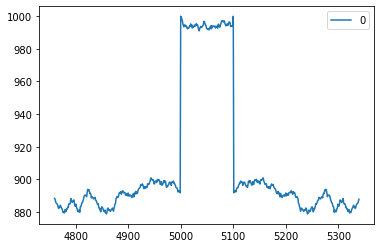

In [139]:
df_prices_w_shock_and_plateau[shock_block-240:shock_block+100+240].plot()

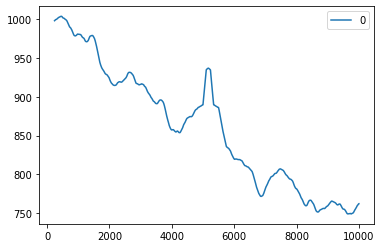

In [140]:
df_twap_240_geo_w_shock_and_plateau = df_prices_w_shock_and_plateau.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_shock_and_plateau = df_twap_240_geo_w_shock_and_plateau[~df_twap_240_geo_w_shock_and_plateau.isnull()]
df_twap_240_geo_w_shock_and_plateau.plot()

In [141]:
df_twap_240_geo_w_shock_and_plateau_ask_skew = pd.concat([df_prices_w_shock_and_plateau, df_twap_240_geo_w_shock_and_plateau], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_shock_and_plateau_bid_skew = pd.concat([df_prices_w_shock_and_plateau, df_twap_240_geo_w_shock_and_plateau], axis=1).min(axis=1) * np.exp(-SPREAD_X)

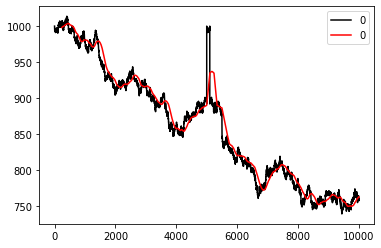

In [142]:
ax = df_prices_w_shock_and_plateau.plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau.plot(ax=ax, c='r', label='twap')
ax.legend()

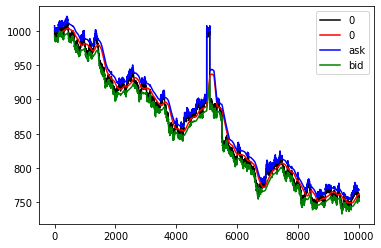

In [143]:
ax = df_prices_w_shock_and_plateau.plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_and_plateau_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_and_plateau_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

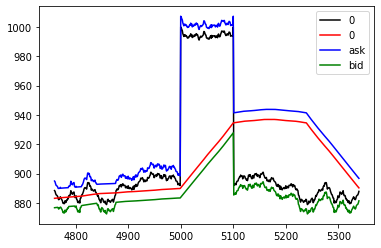

In [144]:
# zoom in
ax = df_prices_w_shock_and_plateau[shock_block-240:shock_block+100+240].plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau[shock_block-240:shock_block+100+240].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_shock_and_plateau_ask_skew[shock_block-240:shock_block+100+240].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_block-240:shock_block+100+240].plot(ax=ax, c='g', label='bid')
ax.legend()

In [145]:
# timeshift bid/ask values to check pnl ...
df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later = df_twap_240_geo_w_shock_and_plateau_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_shock_and_plateau_bid_skew_1h_later = df_twap_240_geo_w_shock_and_plateau_bid_skew.shift(periods=-window_240)

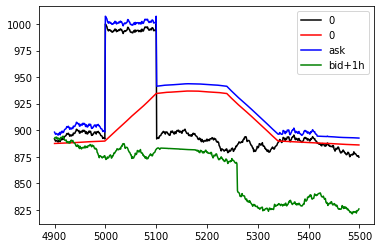

In [146]:
# trade 1 (long): ... yes still looks impossible to profit
ax = df_prices_w_shock_and_plateau[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_and_plateau_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_shock_and_plateau_bid_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

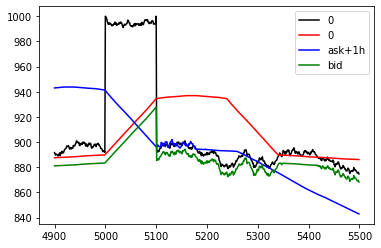

In [147]:
# trade 2 (short): Still ... After halfway through the spot manipulation, if I enter into a short, I would have made ~ 4% profit ... due to drift down after?
ax = df_prices_w_shock_and_plateau[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_shock_and_plateau[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid')
ax.legend()

In [148]:
# PnL is about 3.30% profit
print('bid', df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time+99])
print('ask (1h later)', df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later[shock_time+99])
print('pnl', -(df_twap_240_geo_w_shock_and_plateau_ask_skew_1h_later[shock_time+99] - df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time+99]) / df_twap_240_geo_w_shock_and_plateau_bid_skew[shock_time+99])

bid 927.2804917837719
ask (1h later) 896.7052258818936
pnl 0.032973049873034545


In [149]:
print('cost of manipulation on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M):', 100*(20/2)*(1000.0-891.77)/891.77)
print('cost of attack on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M):', 100*(20/2)*(np.sqrt(1+(1000.0-891.77)/891.77)-1) * (1 + 1/(0.033*5.0)))

cost of manipulation on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M): 121.36537447996683
cost of attack on $20M spot pool with max 5x leverage for 100 block 12% jump (in $M): 416.1902961540871


# Price delta short gets from manipulating the spot then shorting right before stop manipulation is about 3.3% here. To do this profitably, costs upfront about 400M in this example.

# What if shock only happens over e.g. 10 blocks? ... goes from 50M to 5M to manip spot. 

In [150]:
df_prices_w_shock_and_plateau[shock_time-1: shock_time+1]

0
4999   891.770167
5000  1000.000000

In [151]:
print((1000.0-891.77)/891.77)

0.12136537447996683


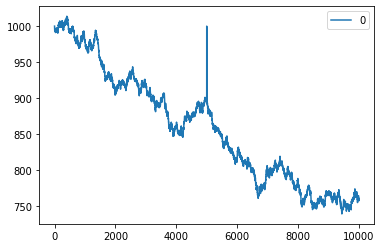

In [152]:
prices_w_short_shock = m.prices.copy()
shock_block = 5000
# 10 blocks is about 2-2.5 min
for i in range(10):
    prices_w_short_shock[shock_block + i] = prices_w_short_shock[i]
df_prices_w_short_shock = pd.DataFrame(data=prices_w_short_shock)    
df_prices_w_short_shock.plot()

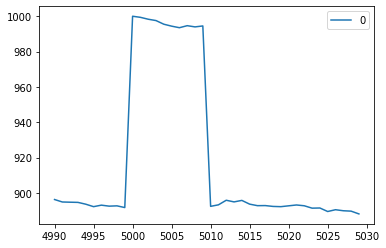

In [153]:
df_prices_w_short_shock[shock_block-10:shock_block+30].plot()

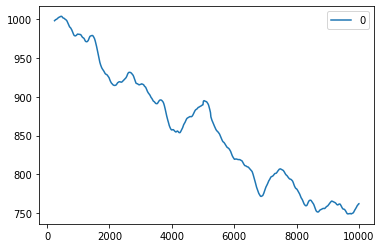

In [154]:
df_twap_240_geo_w_short_shock = df_prices_w_short_shock.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_short_shock = df_twap_240_geo_w_short_shock[~df_twap_240_geo_w_short_shock.isnull()]
df_twap_240_geo_w_short_shock.plot()

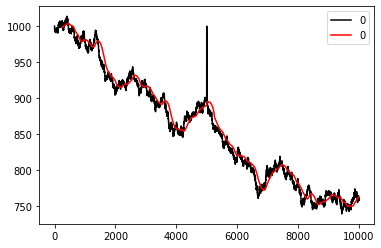

In [155]:
ax = df_prices_w_short_shock.plot(c='k', label='spot')
df_twap_240_geo_w_short_shock.plot(ax=ax, c='r', label='twap')
ax.legend()

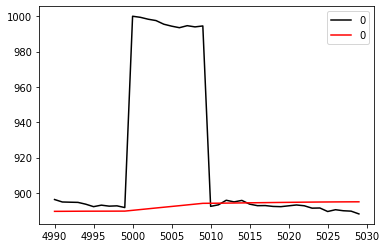

In [156]:
ax = df_prices_w_short_shock[shock_block-10:shock_block+30].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+30].plot(ax=ax, c='r', label='twap')
ax.legend()

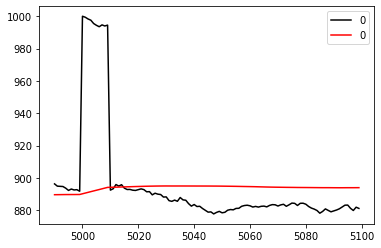

In [157]:
ax = df_prices_w_short_shock[shock_block-10:shock_block+100].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+100].plot(ax=ax, c='r', label='twap')
ax.legend()

In [158]:
df_twap_240_geo_w_short_shock_ask_skew = pd.concat([df_prices_w_short_shock, df_twap_240_geo_w_short_shock], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_short_shock_bid_skew = pd.concat([df_prices_w_short_shock, df_twap_240_geo_w_short_shock], axis=1).min(axis=1) * np.exp(-SPREAD_X)

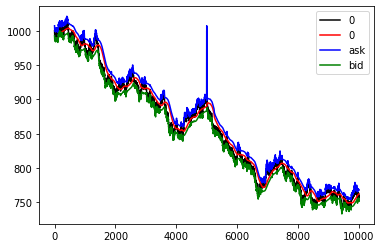

In [159]:
ax = df_prices_w_short_shock.plot(c='k', label='spot')
df_twap_240_geo_w_short_shock.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_shock_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_shock_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

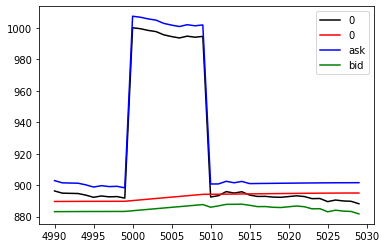

In [160]:
# zoom in
ax = df_prices_w_short_shock[shock_block-10:shock_block+30].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+30].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_shock_ask_skew[shock_block-10:shock_block+30].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_shock_bid_skew[shock_block-10:shock_block+30].plot(ax=ax, c='g', label='bid')
ax.legend()

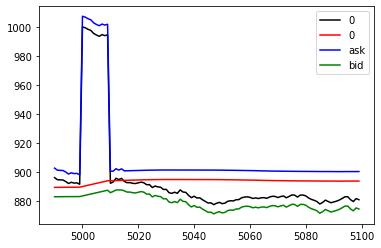

In [161]:
ax = df_prices_w_short_shock[shock_block-10:shock_block+100].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_block-10:shock_block+100].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_shock_ask_skew[shock_block-10:shock_block+100].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_shock_bid_skew[shock_block-10:shock_block+100].plot(ax=ax, c='g', label='bid')
ax.legend()

# Timelag to check whether the short leg of the trade on shorter spot manip is still profitable

In [162]:
df_twap_240_geo_w_short_shock_ask_skew_1h_later = df_twap_240_geo_w_short_shock_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_short_shock_bid_skew_1h_later = df_twap_240_geo_w_short_shock_bid_skew.shift(periods=-window_240)

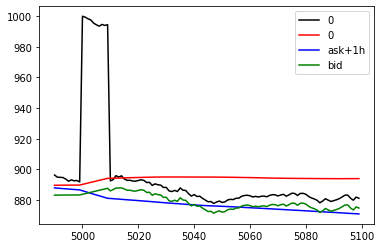

In [163]:
ax = df_prices_w_short_shock[shock_time-10:shock_time+100].plot(c='k', label='spot')
df_twap_240_geo_w_short_shock[shock_time-10:shock_time+100].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_short_shock_ask_skew_1h_later[shock_time-10:shock_time+100].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_short_shock_bid_skew[shock_time-10:shock_time+100].plot(ax=ax, c='g', label='bid')
ax.legend()

# PnL for scalp over shorter duration of 2.5min is only about 0.74%. Likely not worth it...

In [164]:
print('bid (short entry)', df_twap_240_geo_w_short_shock_bid_skew[shock_time+10-1])
print('ask+1h (short exit)', df_twap_240_geo_w_short_shock_ask_skew_1h_later[shock_time+10-1])
print('pnl (short 1h scalp)', -(df_twap_240_geo_w_short_shock_ask_skew_1h_later[shock_time+10-1] - df_twap_240_geo_w_short_shock_bid_skew[shock_time+10-1])/df_twap_240_geo_w_short_shock_bid_skew[shock_time+10-1])

bid (short entry) 887.6672804778636
ask+1h (short exit) 881.1339052055963
pnl (short 1h scalp) 0.007360162322024736


In [165]:
print('cost of manipulation on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M):', 10*(20/2)*(np.sqrt(1+(1000.0-891.77)/891.77)-1))
print('cost of attack on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M):', 10*(20/2)*(np.sqrt(1+(1000.0-891.77)/891.77)-1) * (1 + 1/(0.0074*5.0)))

cost of manipulation on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M): 5.894540675143722
cost of attack on $20M spot pool with max 5x leverage for 10 block 12% jump (in $M): 165.20645081416322


# Still requires ~ 165M for PnL > 0 with attack. And 160M of it is attempting to go into the Overlay market.

# So this appears robust. Falls under original cost of attack on TWAP analysis of note 2

# Try a short LARGE shock to be safe ...

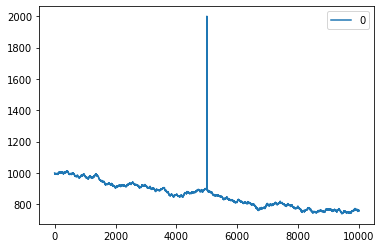

In [166]:
prices_w_short_large_shock = m.prices.copy()
shock_block = 5000
# 10 blocks is about 2-2.5 min
for i in range(10):
    prices_w_short_large_shock[shock_block + i] = prices_w_short_large_shock[i]*2
df_prices_w_short_large_shock = pd.DataFrame(data=prices_w_short_large_shock)    
df_prices_w_short_large_shock.plot()

In [167]:
# cost to manipulate spot 2x over 10 blocks w 20M pool is about $40M 
10*10*(np.sqrt(1+1)-1)

41.42135623730952

In [168]:
df_twap_240_geo_w_short_large_shock = df_prices_w_short_large_shock.rolling(window=window_240).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_240), raw=True)
df_twap_240_geo_w_short_large_shock_ask_skew = pd.concat([df_prices_w_short_large_shock, df_twap_240_geo_w_short_large_shock], axis=1).max(axis=1) * np.exp(SPREAD_X)
df_twap_240_geo_w_short_large_shock_bid_skew = pd.concat([df_prices_w_short_large_shock, df_twap_240_geo_w_short_large_shock], axis=1).min(axis=1) * np.exp(-SPREAD_X)

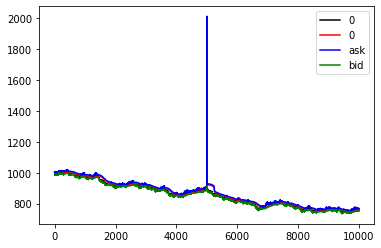

In [169]:
ax = df_prices_w_short_large_shock.plot(c='k', label='spot')
df_twap_240_geo_w_short_large_shock.plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_large_shock_ask_skew.plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_large_shock_bid_skew.plot(ax=ax, c='g', label='bid')
ax.legend()

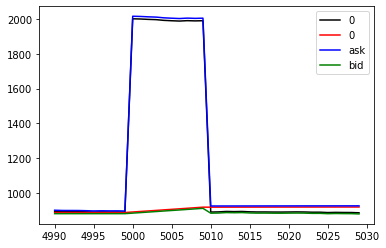

In [170]:
ax = df_prices_w_short_large_shock[shock_time-10:shock_time+30].plot(c='k', label='spot')
df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+30].plot(ax=ax, c='r', label='twap')
df_twap_240_geo_w_short_large_shock_ask_skew[shock_time-10:shock_time+30].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_large_shock_bid_skew[shock_time-10:shock_time+30].plot(ax=ax, c='g', label='bid')
ax.legend()

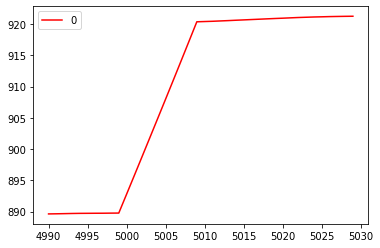

In [171]:
df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+30].plot(c='r', label='twap')

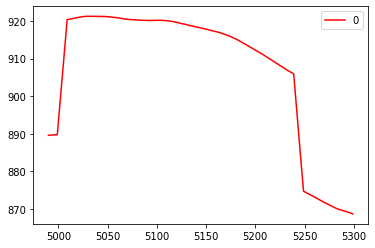

In [172]:
df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+300].plot(c='r', label='twap')

In [173]:
df_twap_240_geo_w_short_large_shock_ask_skew_1h_later = df_twap_240_geo_w_short_large_shock_ask_skew.shift(periods=-window_240)
df_twap_240_geo_w_short_large_shock_bid_skew_1h_later = df_twap_240_geo_w_short_large_shock_bid_skew.shift(periods=-window_240)

# And what about the trades? on the long side => zero profit again ...

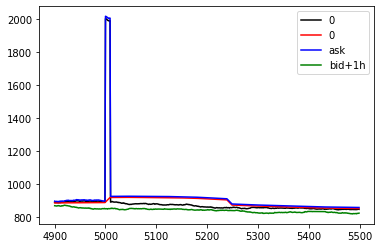

In [174]:
# trade 1 (long): ... yes still looks impossible to profit
ax = df_prices_w_short_large_shock[shock_time-100:shock_time+500].plot(c='k', label='spot')
df_twap_240_geo_w_short_large_shock[shock_time-100:shock_time+500].plot(ax=ax, c='r', label='twap-240')
df_twap_240_geo_w_short_large_shock_ask_skew[shock_time-100:shock_time+500].plot(ax=ax, c='b', label='ask')
df_twap_240_geo_w_short_large_shock_bid_skew_1h_later[shock_time-100:shock_time+500].plot(ax=ax, c='g', label='bid+1h')
ax.legend()

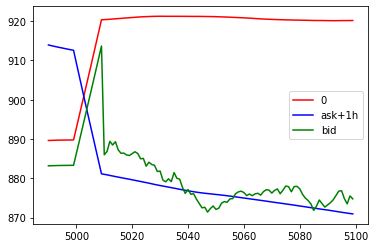

In [175]:
# trade 2 (short): After halfway through the spot manipulation, if I enter into a short, I would have made ~ 4% profit ... due to drift down after?
ax = df_twap_240_geo_w_short_large_shock[shock_time-10:shock_time+100].plot(c='r', label='twap-240')
df_twap_240_geo_w_short_large_shock_ask_skew_1h_later[shock_time-10:shock_time+100].plot(ax=ax, c='b', label='ask+1h')
df_twap_240_geo_w_short_large_shock_bid_skew[shock_time-10:shock_time+100].plot(ax=ax, c='g', label='bid')
ax.legend()

In [176]:
print('bid (short entry)', df_twap_240_geo_w_short_large_shock_bid_skew[shock_time+10-1])
print('ask+1h (short exit)', df_twap_240_geo_w_short_large_shock_ask_skew_1h_later[shock_time+10-1])
print('pnl (short)', -(df_twap_240_geo_w_short_large_shock_ask_skew_1h_later[shock_time+10-1]-df_twap_240_geo_w_short_large_shock_bid_skew[shock_time+10-1])/df_twap_240_geo_w_short_large_shock_bid_skew[shock_time+10-1])

bid (short entry) 913.677917191111
ask+1h (short exit) 881.1339052055963
pnl (short) 0.0356186916343164


In [177]:
print('spot start', df_prices_w_short_large_shock[shock_time-1:shock_time])
print('spot jumps to', df_prices_w_short_large_shock[shock_time:shock_time+1])
print('price change', (2000.0-891.770167)/891.770167)

spot start                0
4999  891.770167
spot jumps to            0
5000  2000.0
price change 1.242730328968271


# 3.56% profit is large and similar to longer attack (100 blocks). This attack is 124.27% jump in price over 10 blocks

## But costs 330M to execute if want PnL > 0. So we're good

In [178]:
print('cost of manipulation on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M):', 10*(20/2)*(np.sqrt(1+(2000.0-891.77)/891.77)-1))
print('cost of attack on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M):', 10*(20/2)*(np.sqrt(1+(2000.0-891.77)/891.77)-1) * (1 + 1/(0.0356*5.0)))

cost of manipulation on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M): 49.757495604057624
cost of attack on $20M spot pool with max 5x leverage for 10 block 125% jump (in $M): 329.2939877616847


# Look at the long side of the spot manipulation scenario. I know the spike is coming because I'm paying to manipulate spot, and I go long on Overlay before manipulating.

# How much can I make? Because the ask is close to the TWAP before BUT the bid is the TWAP at the end of the attack, cost of attack (COA) analysis from note 2 applies here

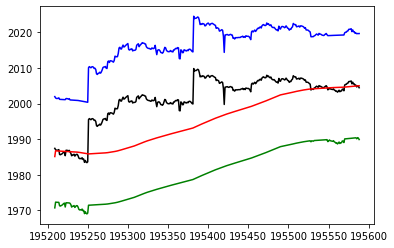

In [179]:
# Come back to this jump ...
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew[194970:195350].plot(ax=ax, c='g', label='bid')

# There actually might be another attack users can do to manipulate the spot ... IF a big real price jump occurs, a user can manipulate the spot in the *opposite* direction to that jump and lock in the better entry price vs the worse case entry price they would have gotten due to the jump.

# This means they effectively can execute the scalp trade but it costs them upfront capital to bring spot price below/above TWAP to manipulate spread. It also takes them only one block of capital for spot manipulation to lock in the smaller spread desired.

In [180]:
(2000-1985)/2000.0

0.0075

In [181]:
# Doesn't cost much capital to bring price back down over just one block
10*1e6*(np.sqrt(1.0075)-1)

37429.949942366926

# Apply a smaller spread envelope ...

In [182]:
# apply a smaller spread ...
SPREAD_X

0.007283411446258746

In [183]:
SPREAD_Y = SPREAD_X / 10.0
SPREAD_Y

0.0007283411446258746

In [184]:
twap_1h_geo_ask_skew_small = pd.concat([prices_filtered, twap_1h_geo], axis=1).max(axis=1) * np.exp(SPREAD_Y)
twap_1h_geo_bid_skew_small = pd.concat([prices_filtered, twap_1h_geo], axis=1).min(axis=1) * np.exp(-SPREAD_Y)

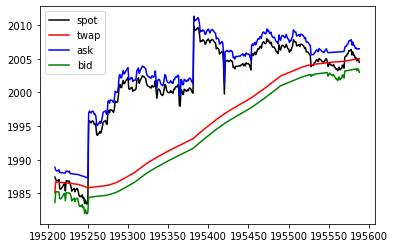

In [185]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_ask_skew_small[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_small[194970:195350].plot(ax=ax, c='g', label='bid')

ax.legend()

# Add a downward shock over only a block but after the initial jump ...

In [186]:
prices_w_shock = prices.copy()
prices_w_shock

0         2239.570000
1         2239.667466
2         2240.655710
3         2238.304510
4         2239.584944
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518401, dtype: float64

In [187]:
attack_block = 195271
print('195250', prices_w_shock[195250])
print('195251', prices_w_shock[195251])
print('195271', prices_w_shock[195271])
print('attack_block-25', prices_w_shock[attack_block-25])

195250 1983.6533818688665
195251 1995.4823229234973
195271 1995.6933244649551
attack_block-25 1983.4974026850225


In [188]:
prices_w_shock[attack_block] = prices_w_shock[attack_block-25]
print('prices_w_shock[attack_block]', prices_w_shock[attack_block])
print('prices_w_shock[attack_block-1]', prices_w_shock[attack_block-1])
print('prices_w_shock[attack_block+1]', prices_w_shock[attack_block+1])

prices_w_shock[attack_block] 1983.4974026850225
prices_w_shock[attack_block-1] 1995.6825197648093
prices_w_shock[attack_block+1] 1995.8247112436645


In [189]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 240 blocks in this sim
twap_1h_geo_w_shock = prices_w_shock.rolling(window=window_1h).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h), raw=True)
twap_1h_geo_w_shock = twap_1h_geo_w_shock[~twap_1h_geo_w_shock.isnull()]
twap_1h_geo_w_shock

239       2238.888859
240       2238.883210
241       2238.877853
242       2238.867539
243       2238.866412
             ...     
518396    2161.265451
518397    2161.344353
518398    2161.423125
518399    2161.497987
518400    2161.572553
Name: sim-53, Length: 518162, dtype: float64

In [190]:
prices_filtered_w_shock = prices_w_shock[239:]
prices_filtered_w_shock

239       2237.622746
240       2238.214274
241       2238.381596
242       2238.179852
243       2238.034022
             ...     
518396    2179.164884
518397    2180.037396
518398    2179.911487
518399    2179.797703
518400    2180.034550
Name: sim-53, Length: 518162, dtype: float64

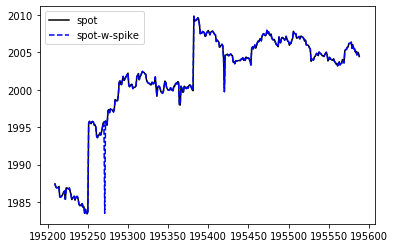

In [191]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
prices_filtered_w_shock[194970:195350].plot(ax=ax, c='b', linestyle='dashed', label='spot-w-spike')
ax.legend()

In [192]:
twap_1h_geo_w_shock_ask_skew_small = pd.concat([prices_filtered_w_shock, twap_1h_geo_w_shock], axis=1).max(axis=1) * np.exp(SPREAD_Y)
twap_1h_geo_w_shock_bid_skew_small = pd.concat([prices_filtered_w_shock, twap_1h_geo_w_shock], axis=1).min(axis=1) * np.exp(-SPREAD_Y)

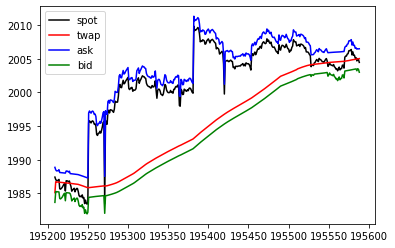

In [193]:
ax = prices_filtered_w_shock[194970:195350].plot(c='k', label='spot')
twap_1h_geo_w_shock[194970:195350].plot(ax=ax, c='r', label='twap')
twap_1h_geo_w_shock_ask_skew_small[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_w_shock_bid_skew_small[194970:195350].plot(ax=ax, c='g', label='bid')

ax.legend()

# Zoom in to see the ask the trader gets when manipulating ...

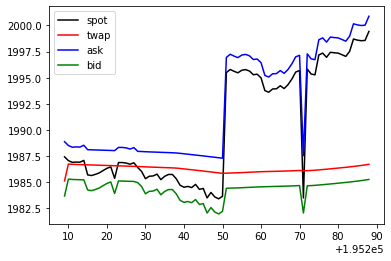

In [194]:
ax = prices_filtered_w_shock[194970:195050].plot(c='k', label='spot')
twap_1h_geo_w_shock[194970:195050].plot(ax=ax, c='r', label='twap')
twap_1h_geo_w_shock_ask_skew_small[194970:195050].plot(ax=ax, c='b', label='ask')
twap_1h_geo_w_shock_bid_skew_small[194970:195050].plot(ax=ax, c='g', label='bid')

ax.legend()

In [195]:
print('ask around shock', twap_1h_geo_w_shock_ask_skew_small[195030:195035])
print('ask at shock/manip', twap_1h_geo_w_shock_ask_skew_small[195271])

ask around shock 195269    1996.991991
195270    1997.136587
195271    1987.537066
195272    1997.278882
195273    1996.803485
dtype: float64
ask at shock/manip 1987.5370656465393


# Then I exit at the bid an hour later ...

In [196]:
print('bid around 1h after shock', twap_1h_geo_w_shock_ask_skew_small[195030+240:195035+240])
print('bid at 1h after shock/manip', twap_1h_geo_w_shock_ask_skew_small[195271+240])

bid around 1h after shock 195509    2008.960280
195510    2008.356179
195511    2008.428401
195512    2008.454163
195513    2008.588193
dtype: float64
bid at 1h after shock/manip 2008.428401327608


In [197]:
print('pnl from lag trade (excluding manip costs)', (2008.428401327608-1987.5370656465393)/1987.5370656465393)

pnl from lag trade (excluding manip costs) 0.010511167837905394


# Capital required to move spot down? dy = y * (1/np.sqrt(1+e)-1)

## Assume y = 10M for 20M pool ...

In [198]:
# capital required to move spot down? dy = y * (1/np.sqrt(1+e)-1)
e_shock = (1983.4974026850225-1995.6825197648093)/1995.6825197648093
print('e_shock', e_shock)

e_shock -0.006105739244147306


In [199]:
dy = 10 * (1/np.sqrt(1+e_shock)-1)
dy * 1e6

30669.211555527378

In [200]:
# So profitable with lag trade if PnL from trade > cost to shock over 1 block
print('Break even OI to be profitable:', dy * 1e6 / 0.010511167837905394)

Break even OI to be profitable: 2917773.9361108863


# So 30M dollars of OI ends up making this profitable scalp. We'd bleed from this continously with high enough caps *and* small enough spread envelope e^{E_s}

# Instead of using spot directly, use the 10m TWAP. Cost to shock over 40 blocks (~ 10min) is much larger => min 40M dollars for 5x leverage

In [201]:
# excludes cost to enter into a trade on Overlay market to scalp a profit
dy * 1e6 * 40

1226768.462221095

In [202]:
l_max = 5
l_max

5

In [203]:
# cost to enter max lev trade that's profitable is 1/(L*e_shock). Approx below ...
tc_b = 10 * 40 * (np.sqrt(1-e_shock) - 1) * (1 + 1/(l_max*(-e_shock)))
tc_b # in millions of dollars

41.1584178147016

In [204]:
# vs only 1M over 1 block
10 * (np.sqrt(1-e_shock) - 1) * (1 + 1/(l_max*(-e_shock)))

1.02896044536754

# Calculate the 10m TWAP (40 blocks) and use it as proxy for spot with these jumps.

# Calibrate e^{+/- E_s} such that 99% of time, 10m TWAP can't be front run profitably. For ETH-DAI, gives E_s = 0.00624957

In [205]:
SPREAD_X_10M = 0.00624957

In [206]:
window_10m = 4*10
window_10m

40

In [207]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 40 blocks in this sim
twap_10m_geo = prices.rolling(window=window_10m).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m), raw=True)
twap_10m_geo = twap_10m_geo[~twap_10m_geo.isnull()]
twap_10m_geo

39        2238.330164
40        2238.203490
41        2238.081433
42        2237.947631
43        2237.891592
             ...     
518396    2174.866962
518397    2175.003304
518398    2175.138929
518399    2175.282396
518400    2175.447723
Name: sim-53, Length: 518362, dtype: float64

In [208]:
# Filter the 10m such that length coincides with the 1h TWAP
twap_10m_geo = twap_10m_geo[239-39:]
twap_10m_geo

239       2237.645213
240       2237.707604
241       2237.767635
242       2237.819742
243       2237.874367
             ...     
518396    2174.866962
518397    2175.003304
518398    2175.138929
518399    2175.282396
518400    2175.447723
Name: sim-53, Length: 518162, dtype: float64

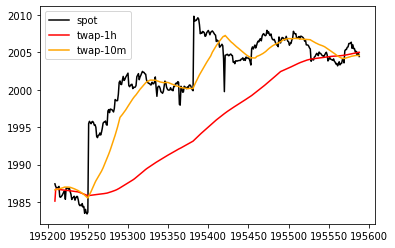

In [209]:
# Plot 10m, 1h TWAPs and spot around jump
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[194970:195350].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double.png')

In [210]:
# New skew around min/max bw 1h and 10m. Use twap_10m_geo as proxy for spot
twap_1h_geo_ask_skew_10m = pd.concat([twap_10m_geo, twap_1h_geo], axis=1).max(axis=1) * np.exp(SPREAD_X_10M)
twap_1h_geo_bid_skew_10m = pd.concat([twap_10m_geo, twap_1h_geo], axis=1).min(axis=1) * np.exp(-SPREAD_X_10M)

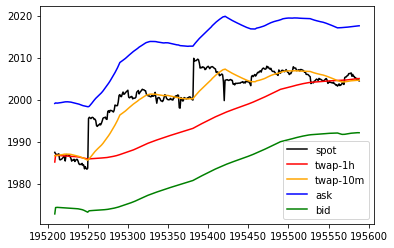

In [211]:
ax = prices_filtered[194970:195350].plot(c='k', label='spot')
twap_1h_geo[194970:195350].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[194970:195350].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[194970:195350].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[194970:195350].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread.png')

In [212]:
print('spot at jump', prices_filtered[195010:195015])
print('twap-1h at jump', twap_1h_geo[195010:195015])
print('twap-10m at jump', twap_10m_geo[195010:195015])
print('ask at jump', twap_1h_geo_ask_skew_10m[195010:195015])
print('bid at jump', twap_1h_geo_bid_skew_10m[195010:195015])
print('bid 1h after jump', twap_1h_geo_bid_skew_10m[195010+window_1h:195015+window_1h])

spot at jump 195249    1983.410406
195250    1983.653382
195251    1995.482323
195252    1995.783461
195253    1995.607815
Name: sim-53, dtype: float64
twap-1h at jump 195249    1985.893596
195250    1985.848948
195251    1985.863894
195252    1985.880668
195253    1985.891454
Name: sim-53, dtype: float64
twap-10m at jump 195249    1985.624060
195250    1985.538856
195251    1985.752748
195252    1985.973597
195253    1986.190393
Name: sim-53, dtype: float64
ask at jump 195249    1998.343439
195250    1998.298512
195251    1998.313551
195252    1998.423942
195253    1998.642098
dtype: float64
bid at jump 195249    1973.253460
195250    1973.168786
195251    1973.381345
195252    1973.508468
195253    1973.519188
dtype: float64
bid 1h after jump 195489    1989.867091
195490    1989.961069
195491    1990.007993
195492    1990.054416
195493    1990.101384
dtype: float64


# How does spread around the 10m TWAP as proxy for spot perform in relatively normal periods? ...

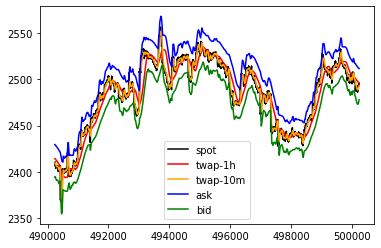

In [213]:
# 490000:500000, 496000:497500, and 495000:500000 from above
ax = prices_filtered[490000:500000].plot(c='k', label='spot')
twap_1h_geo[490000:500000].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[490000:500000].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[490000:500000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[490000:500000].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_vol_zoom_1x.png')

In [214]:
(500000-490000)*15/86400.0

1.7361111111111112

# Doesn't look that bad. Zoom in ...

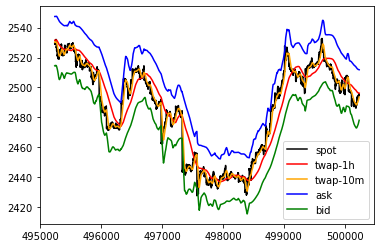

In [215]:
ax = prices_filtered[495000:500000].plot(c='k', label='spot')
twap_1h_geo[495000:500000].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[495000:500000].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[495000:500000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[495000:500000].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_vol_zoom_2x.png')

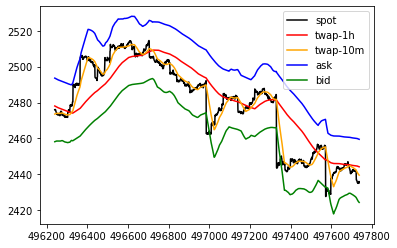

In [216]:
# 496000:497500
ax = prices_filtered[496000:497500].plot(c='k', label='spot')
twap_1h_geo[496000:497500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[496000:497500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[496000:497500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[496000:497500].plot(ax=ax, c='g', label='bid')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_vol_zoom_3x.png')

In [217]:
print('spot at top', prices_filtered[496369:496379])
print('twap-1h at top', twap_1h_geo[496369:496379])
print('twap-10m at top', twap_10m_geo[496369:496379])
print('ask at top', twap_1h_geo_ask_skew_10m[496369:496379])
print('bid at top', twap_1h_geo_bid_skew_10m[496369:496379])
print('ask 6h after top', twap_1h_geo_ask_skew_10m[497500-10:497500])
print('spot 6h after top', prices_filtered[497500-10:497500])

spot at top 496608    2514.315885
496609    2514.400384
496610    2514.081685
496611    2513.963872
496612    2514.305530
496613    2514.236195
496614    2514.031408
496615    2513.649435
496616    2513.237583
496617    2512.364085
Name: sim-53, dtype: float64
twap-1h at top 496608    2505.245007
496609    2505.280943
496610    2505.317860
496611    2505.352766
496612    2505.389623
496613    2505.424414
496614    2505.457059
496615    2505.490553
496616    2505.528605
496617    2505.562368
Name: sim-53, dtype: float64
twap-10m at top 496608    2511.783112
496609    2511.848208
496610    2511.914051
496611    2511.968213
496612    2512.054643
496613    2512.124658
496614    2512.182777
496615    2512.225218
496616    2512.236462
496617    2512.269418
Name: sim-53, dtype: float64
ask at top 496608    2527.529830
496609    2527.595334
496610    2527.661590
496611    2527.716092
496612    2527.803064
496613    2527.873518
496614    2527.932001
496615    2527.974708
496616    2527.986022
4

In [218]:
# pnl of trade over 6h
(2489.709524-2459.498776)/2489.709524

0.012134246067172923

# Zoom in more at the large downlegs around 497000 and 497300

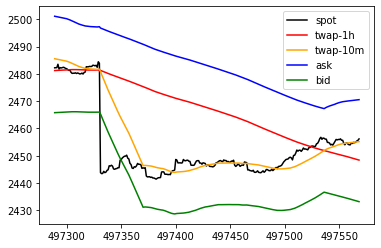

In [219]:
# 497000
ax = prices_filtered[497050:497050+240+40].plot(c='k', label='spot')
twap_1h_geo[497050:497050+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497050:497050+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[497050:497050+240+40].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[497050:497050+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

In [220]:
# Looks close. Timelag to check profitability of trades
twap_1h_geo_ask_skew_10m_shift_1h_later = twap_1h_geo_ask_skew_10m.shift(periods=-window_1h)
twap_1h_geo_bid_skew_10m_shift_1h_later = twap_1h_geo_bid_skew_10m.shift(periods=-window_1h)

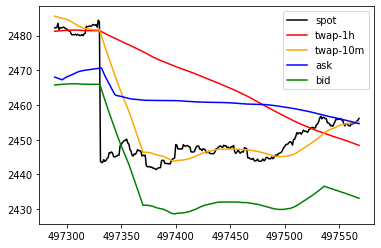

In [221]:
ax = prices_filtered[497050:497050+240+40].plot(c='k', label='spot')
twap_1h_geo[497050:497050+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497050:497050+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m_shift_1h_later[497050:497050+240+40].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[497050:497050+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

# Interesting. Not profitable still even with 1.6% jump down over 1 block ...

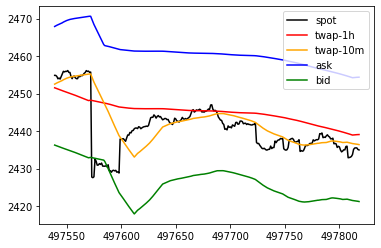

In [222]:
# 497300
ax = prices_filtered[497300:497300+240+40].plot(c='k', label='spot')
twap_1h_geo[497300:497300+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497300:497300+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[497300:497300+240+40].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[497300:497300+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

# Not nearly as bad. Def not profitable ... but let's check to be sure

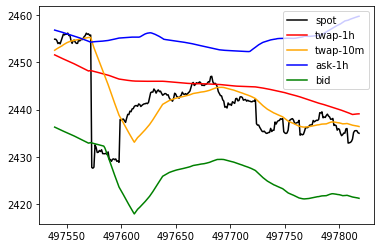

In [223]:
ax = prices_filtered[497300:497300+240+40].plot(c='k', label='spot')
twap_1h_geo[497300:497300+240+40].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[497300:497300+240+40].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m_shift_1h_later[497300:497300+240+40].plot(ax=ax, c='b', label='ask-1h')
twap_1h_geo_bid_skew_10m[497300:497300+240+40].plot(ax=ax, c='g', label='bid')
ax.legend()

# Ok look at the crazy unrealistic jumps from earlier.

# First at 131000. Jump is 50% in *1 block* -- which is insane but let's entertain it

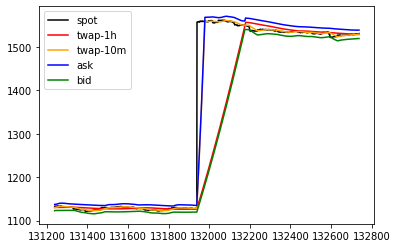

In [224]:
ax = prices_filtered[131000:132500].plot(c='k', label='spot')
twap_1h_geo[131000:132500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[131000:132500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[131000:132500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[131000:132500].plot(ax=ax, c='g', label='bid')
ax.legend()

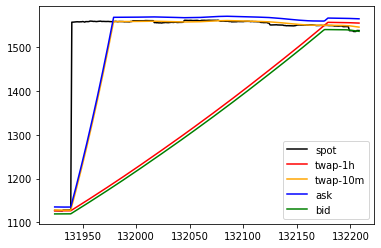

In [225]:
ax = prices_filtered[131685:131650+240+80].plot(c='k', label='spot')
twap_1h_geo[131685:131650+240+80].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[131685:131650+240+80].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[131685:131650+240+80].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m[131685:131650+240+80].plot(ax=ax, c='g', label='bid')
ax.legend()

# Look at time lagged to see profit made from bid ask scalp

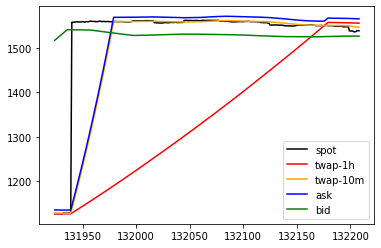

In [226]:
ax = prices_filtered[131685:131650+240+80].plot(c='k', label='spot')
twap_1h_geo[131685:131650+240+80].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo[131685:131650+240+80].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m[131685:131650+240+80].plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m_shift_1h_later[131685:131650+240+80].plot(ax=ax, c='g', label='bid')
ax.legend()

# For that 10m interval, protocol is completely exposed. Need worst case market impact OI fee (lambda * OI^2) to cover this situation

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


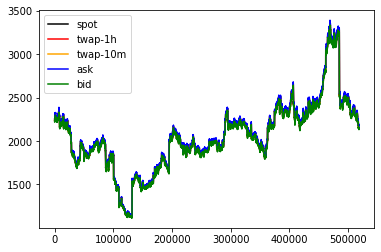

In [227]:
ax = prices_filtered.plot(c='k', label='spot')
twap_1h_geo.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_bid_skew_10m.plot(ax=ax, c='g', label='bid')

ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_double_spread_all.png')

# Check how often scalp trade is profitable *given* entry 1 block after a large jump.

# Large jump is

## - spot(t+10m) > spot(t)*e^{E_s} for long scalp
## - spot(t+10m) < spot(t)*e^{-E_s} for short scalp

In [228]:
# Get the indices where spot jumps up happen
spot_jump_long_filtered = prices_filtered.rolling(window=window_10m).apply(lambda w: np.log(w[-1]/w[0]) if np.log(w[-1]/w[0]) > SPREAD_X_10M else 0.0, raw=True)
spot_jump_long_idxs = [ index for index, value in spot_jump_long_filtered.items() if value > 0.0 ]
print(f"{len(spot_jump_long_idxs)} number of occurrences of large spot jumps up")
print(f"{len(prices_filtered)} number of sample bars")
print(f"{100*len(spot_jump_long_idxs)/len(prices_filtered)}% of sample bars have large spot jumps up to execute long scalp trade")

15039 number of occurrences of large spot jumps up
518162 number of sample bars
2.902374160976683% of sample bars have large spot jumps up to execute long scalp trade


In [229]:
# Get the indices where spot jumps down happen
spot_jump_short_filtered = prices_filtered.rolling(window=window_10m).apply(lambda w: np.log(w[-1]/w[0]) if np.log(w[-1]/w[0]) < -SPREAD_X_10M else 0.0, raw=True)
spot_jump_short_idxs = [ index for index, value in spot_jump_short_filtered.items() if value < 0.0 ]
print(f"{len(spot_jump_short_idxs)} number of occurrences of large spot jumps down")
print(f"{len(prices_filtered)} number of sample bars")
print(f"{100*len(spot_jump_short_idxs)/len(prices_filtered)}% of sample bars have large spot jumps down to execute short scalp trade")

15767 number of occurrences of large spot jumps down
518162 number of sample bars
3.042870762425651% of sample bars have large spot jumps down to execute short scalp trade


In [230]:
# Looks consistent w mathematica numbers at end of note-2.nb

# Out of the indices where price jumps substantially, calculate PnL of scalp assuming exit 1h later

In [231]:
#### NOTE: recurring indices after the jump given the 10m window (40 indices/blocks)
start_idx = 239
print('idxs', spot_jump_long_idxs[:45])
print('values', spot_jump_long_filtered[spot_jump_long_idxs[0]-239:spot_jump_long_idxs[0]-239+10])
print('value', spot_jump_long_filtered[spot_jump_long_idxs[0]])

idxs [293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 1081, 1082, 1083, 1084, 1085, 1086]
values 293    0.010883
294    0.010915
295    0.011369
296    0.011433
297    0.011060
298    0.011215
299    0.011592
300    0.011857
301    0.011844
302    0.012036
Name: sim-53, dtype: float64
value 0.01088250402371506


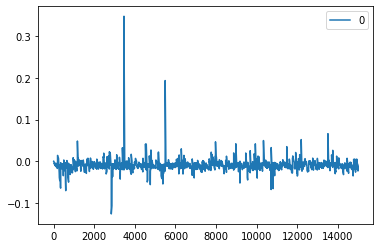

In [232]:
pnl_scalp_spot_jump_long = [ twap_1h_geo_bid_skew_10m[idx+window_1h] / twap_1h_geo_ask_skew_10m[idx] - 1 for idx in spot_jump_long_idxs if idx+window_1h in twap_1h_geo_bid_skew_10m ]
pd.DataFrame(data=pnl_scalp_spot_jump_long).plot()


# Still looks like a bit of a problem for scalp trade PnL given large wins still remain when in front-running the 10m.

# How well does it work with Adam's original manipulation jump?

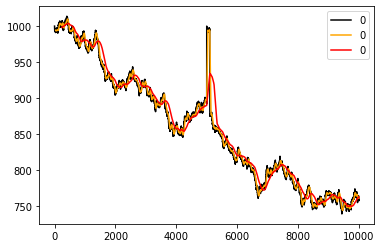

In [233]:
ax = df_prices_w_shock.plot(label='spot', c='k')
df_twap_40_geo_w_shock.plot(ax=ax, label='twap-40', c='orange')
df_twap_240_geo_w_shock.plot(ax=ax, label='twap-240', c='r')
ax.legend()

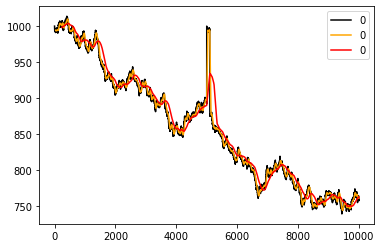

In [234]:
ax = df_prices_w_shock.plot(label='spot', c='k')
df_twap_40_geo_w_shock.plot(ax=ax, label='twap-40', c='orange')
df_twap_240_geo_w_shock.plot(ax=ax, label='twap-240', c='r')
ax.legend()

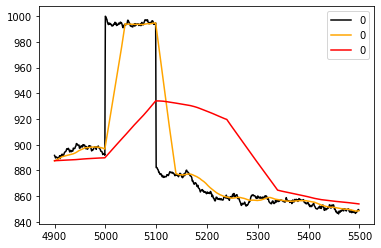

In [235]:
# [shock_time-100:shock_time+500]
ax = df_prices_w_shock[shock_time-100:shock_time+500].plot(label='spot', c='k')
df_twap_40_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, label='twap-40', c='orange')
df_twap_240_geo_w_shock[shock_time-100:shock_time+500].plot(ax=ax, label='twap-240', c='r')
ax.legend()

In [236]:
# zoom in around shock ...

# Below ... Market impact OI fee for extreme case to cover remaining 1% of cases

In [237]:
qs = np.array([q for q in np.arange(0.001, 0.1, 0.001)])

In [238]:
H_STABLE_USDC_WETH = 0.0285405
lambda_stable_usdc_weth = [ H_STABLE_USDC_WETH / q for q in qs ]
df_lambda_stable_usdc_weth = pd.DataFrame(data=[qs, lambda_stable_usdc_weth]).T
df_lambda_stable_usdc_weth.columns = ['q', 'lambda-stable']

In [239]:
H_NORMAL_USDC_WETH = 0.00110089
lambda_normal_usdc_weth = [ H_NORMAL_USDC_WETH / q for q in qs ]
df_lambda_normal_usdc_weth = pd.DataFrame(data=[qs, lambda_normal_usdc_weth]).T
df_lambda_normal_usdc_weth.columns = ['q', 'lambda-normal']

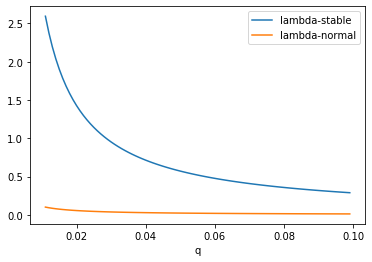

In [240]:
ax = df_lambda_stable_usdc_weth[10:].plot(x='q', y='lambda-stable')
df_lambda_normal_usdc_weth[10:].plot(ax=ax, x='q', y='lambda-normal')
ax.legend()
ax.get_figure().savefig('png/sim_twap_lag_lambda_norm_v_stable.png')

In [241]:
print('q[19]', df_lambda_normal_usdc_weth['q'][19])
print('lambda-normal[19]', df_lambda_normal_usdc_weth['lambda-normal'][19])

q[19] 0.02
lambda-normal[19] 0.055044499999999996


In [242]:
print('q[19]', df_lambda_stable_usdc_weth['q'][19])
print('lambda-stable[19]', df_lambda_stable_usdc_weth['lambda-stable'][19])

q[19] 0.02
lambda-stable[19] 1.427025


In [243]:
# Calc percent diff between normal and stable
print(f"Diff: {100*(df_lambda_stable_usdc_weth['lambda-stable'][19]/df_lambda_normal_usdc_weth['lambda-normal'][19] -1)}%")

Diff: 2492.493346292545%


In [244]:
# What about further out on q curve. Shouldn't matter given expression ..
print('q[80]', df_lambda_normal_usdc_weth['q'][80])
print('lambda-normal[80]', df_lambda_normal_usdc_weth['lambda-normal'][80])

q[80] 0.081
lambda-normal[80] 0.013591234567901234


# Look at FTX ETH-USD 1m historical data for several months: Jan 1, 2021 to Aug 19, 2021

In [245]:
FILENAME_FTX = "ethusd_01012021_08192021"

In [246]:
df_ftx = pd.read_csv(f"csv/{FILENAME_FTX}.csv")
df_ftx

t        o        h        l        c             v
0       1.609459e+12   737.28   737.91   736.90   737.80    9917.16625
1       1.609459e+12   737.80   739.92   737.80   739.53   30086.73403
2       1.609459e+12   739.53   740.00   738.21   738.75     257.16222
3       1.609459e+12   738.75   739.10   738.14   738.14     185.36104
4       1.609459e+12   738.14   738.63   737.62   737.78     178.66611
...              ...      ...      ...      ...      ...           ...
335028  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335029  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335030  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335031  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350
335032  1.629419e+12  3216.00  3218.70  3215.10  3215.30  521958.38350

[335033 rows x 6 columns]

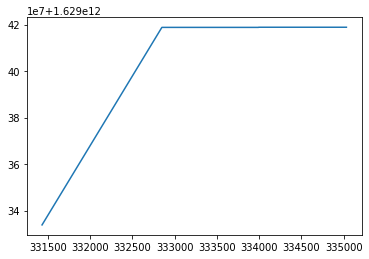

In [247]:
df_ftx['t'][len(df_ftx['t'])-3600:].plot()

In [248]:
# Need to filter out last 1h
df_ftx = df_ftx[:len(df_ftx)-3600]
df_ftx

t        o        h        l        c             v
0       1.609459e+12   737.28   737.91   736.90   737.80    9917.16625
1       1.609459e+12   737.80   739.92   737.80   739.53   30086.73403
2       1.609459e+12   739.53   740.00   738.21   738.75     257.16222
3       1.609459e+12   738.75   739.10   738.14   738.14     185.36104
4       1.609459e+12   738.14   738.63   737.62   737.78     178.66611
...              ...      ...      ...      ...      ...           ...
331428  1.629334e+12  3011.50  3017.00  3011.40  3016.90  130268.47360
331429  1.629334e+12  3016.90  3020.30  3014.30  3014.30  127879.60120
331430  1.629334e+12  3014.30  3022.10  3013.80  3022.10  184599.61450
331431  1.629334e+12  3022.10  3026.70  3021.40  3026.70  100082.19650
331432  1.629334e+12  3026.70  3026.90  3024.60  3026.10  138457.23580

[331433 rows x 6 columns]

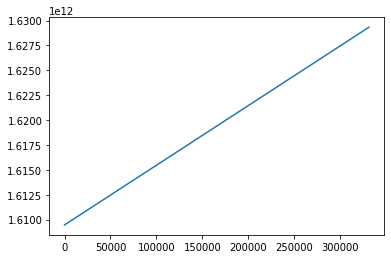

In [249]:
df_ftx['t'].plot()

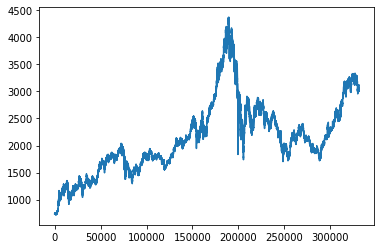

In [250]:
df_ftx['c'].plot()

In [251]:
# Check data only 1m apart
df_ftx['t'][len(df_ftx)-7200]-df_ftx['t'][len(df_ftx)-7200-1]

60000.0

In [252]:
# Use close prices
ethusd_ftx_c = df_ftx['c']
ethusd_ftx_c

0          737.80
1          739.53
2          738.75
3          738.14
4          737.78
           ...   
331428    3016.90
331429    3014.30
331430    3022.10
331431    3026.70
331432    3026.10
Name: c, Length: 331433, dtype: float64

In [253]:
# Take geometric moving average... 10m and 1h
window_1h_ftx = 60
window_10m_ftx = 10

In [254]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_1h_geo_ftx = ethusd_ftx_c.rolling(window=window_1h_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h_ftx), raw=True)
twap_1h_geo_ftx = twap_1h_geo_ftx[~twap_1h_geo_ftx.isnull()]
twap_1h_geo_ftx

59         734.366739
60         734.326529
61         734.243339
62         734.183561
63         734.140552
             ...     
331428    3024.791399
331429    3024.224342
331430    3023.736407
331431    3023.308679
331432    3022.986692
Name: c, Length: 331374, dtype: float64

In [255]:
twap_10m_geo_ftx = ethusd_ftx_c.rolling(window=window_10m_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m_ftx), raw=True)
twap_10m_geo_ftx = twap_10m_geo_ftx[~twap_10m_geo_ftx.isnull()]
twap_10m_geo_ftx

9          737.042236
10         736.632633
11         735.983608
12         735.515024
13         734.941054
             ...     
331428    3012.418154
331429    3012.598101
331430    3013.897089
331431    3014.854699
331432    3016.393286
Name: c, Length: 331424, dtype: float64

In [256]:
# filter the 10m data
twap_10m_geo_ftx = twap_10m_geo_ftx[50:]
twap_10m_geo_ftx

59         735.614895
60         735.607893
61         735.518821
62         735.403862
63         735.383869
             ...     
331428    3012.418154
331429    3012.598101
331430    3013.897089
331431    3014.854699
331432    3016.393286
Name: c, Length: 331374, dtype: float64

In [257]:
ethusd_ftx_c_filtered = ethusd_ftx_c[59:]
ethusd_ftx_c_filtered

59         735.13
60         735.38
61         734.52
62         735.15
63         735.55
           ...   
331428    3016.90
331429    3014.30
331430    3022.10
331431    3026.70
331432    3026.10
Name: c, Length: 331374, dtype: float64

# Plot them all together 

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


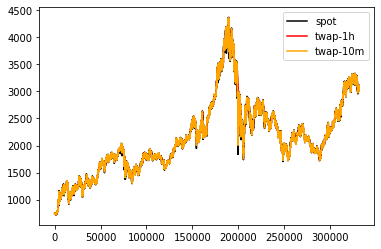

In [258]:
ax = ethusd_ftx_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx.plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

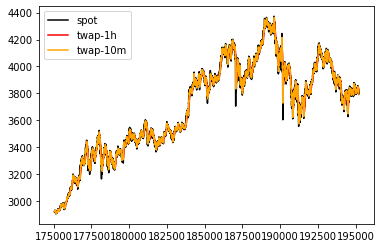

In [259]:
# Zoom in around run up
ax = ethusd_ftx_c_filtered[175000:175000+1440*14].plot(c='k', label='spot')
twap_1h_geo_ftx[175000:175000+1440*14].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[175000:175000+1440*14].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

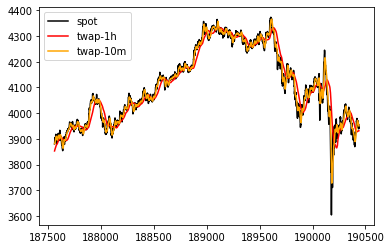

In [260]:
ax = ethusd_ftx_c_filtered[187500:187500+1440*2].plot(c='k', label='spot')
twap_1h_geo_ftx[187500:187500+1440*2].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[187500:187500+1440*2].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

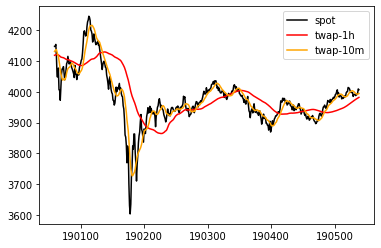

In [261]:
# Check most extreme drop near end of this window
ax = ethusd_ftx_c_filtered[190000:190000+60*8].plot(c='k', label='spot')
twap_1h_geo_ftx[190000:190000+60*8].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190000:190000+60*8].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

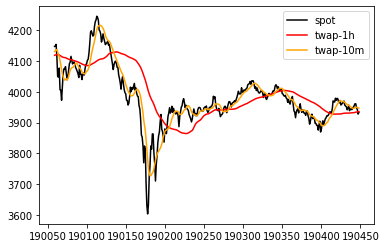

In [262]:
ax = ethusd_ftx_c_filtered[190000:190150+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx[190000:190150+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190000:190150+60*4].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

# Nice. Can the bid-ask spread handle this? Seems to be the most extreme

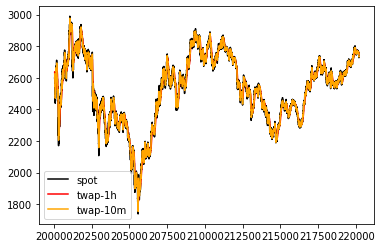

In [263]:
ax = ethusd_ftx_c_filtered[200000:200000+1440*14].plot(c='k', label='spot')
twap_1h_geo_ftx[200000:200000+1440*14].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[200000:200000+1440*14].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

# Or this ?

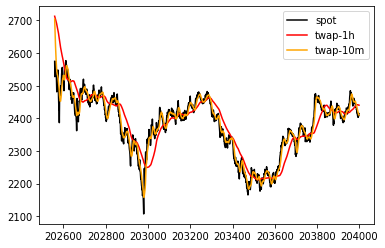

In [264]:
ax = ethusd_ftx_c_filtered[202500:202500+1440].plot(c='k', label='spot')
twap_1h_geo_ftx[202500:202500+1440].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[202500:202500+1440].plot(ax=ax, c='orange', label='twap-10m')
ax.legend()

# 95% confidence level for FTX ETH USD data gives:

## >>> dlt = 0.006258241054078503
## >>> l(0.035) = 0.6510291646000596

In [265]:
delta_95p_ftx = 0.006258241054078503
log_ev_95p_ftx = 0.022786020761002085

def lambda_95p(q):
    return log_ev_95p_ftx/q

In [266]:
# Apply the static spread first
twap_1h_geo_ftx_ask_skew_10m = pd.concat([twap_10m_geo_ftx, twap_1h_geo_ftx], axis=1).max(axis=1) * np.exp(delta_95p_ftx)
twap_1h_geo_ftx_bid_skew_10m = pd.concat([twap_10m_geo_ftx, twap_1h_geo_ftx], axis=1).min(axis=1) * np.exp(-delta_95p_ftx)

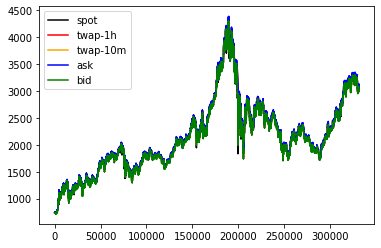

In [267]:
ax = ethusd_ftx_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m.plot(ax=ax, c='g', label='bid')

ax.legend()

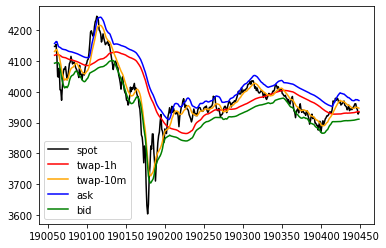

In [268]:
# How'd it do in really stressful 4k to 3.6k drop?
ax = ethusd_ftx_c_filtered[190000:190150+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx[190000:190150+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190000:190150+60*4].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[190000:190150+60*4].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[190000:190150+60*4].plot(ax=ax, c='g', label='bid')

ax.legend()

# Was it a profitable trade anymore to short around t=190140 and exit at t=190200? (60 min window for ask to catch up)
# Strict non-movement of the ask seems to help majorly here

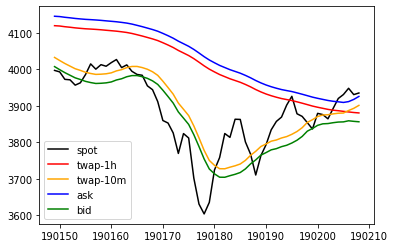

In [269]:
# zoom in around region of interest 190140:190200
ax = ethusd_ftx_c_filtered[190090:190150].plot(c='k', label='spot')
twap_1h_geo_ftx[190090:190150].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190090:190150].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[190090:190150].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[190090:190150].plot(ax=ax, c='g', label='bid')

ax.legend()

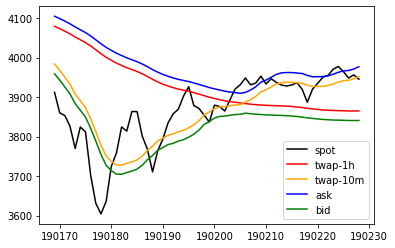

In [270]:
# Start short at t=190170 where gap bw spot and bid starts getting bad/extreme and then exit trade at t=190230
ax = ethusd_ftx_c_filtered[190170-60:190230-60].plot(c='k', label='spot')
twap_1h_geo_ftx[190170-60:190230-60].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[190170-60:190230-60].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[190170-60:190230-60].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[190170-60:190230-60].plot(ax=ax, c='g', label='bid')

ax.legend()

# Even for this large drop in historical data of about 10% in 10m, scalp trade doesn't make profit. Can't overcome static spread of 60bps per side of trade.

# Ask price not budging and following the 1h TWAP is key.

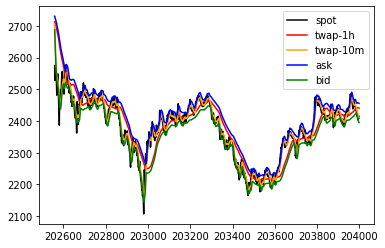

In [271]:
# and look at the other drop ... [202500:202500+1440]. then look at march of 2000 collapse to test
ax = ethusd_ftx_c_filtered[202500:202500+1440].plot(c='k', label='spot')
twap_1h_geo_ftx[202500:202500+1440].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[202500:202500+1440].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[202500:202500+1440].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[202500:202500+1440].plot(ax=ax, c='g', label='bid')

ax.legend()

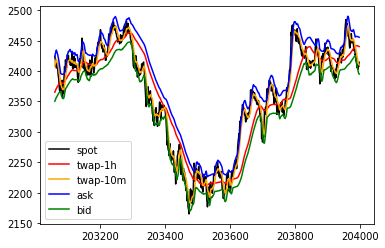

In [272]:
# zoom inaround 203000
ax = ethusd_ftx_c_filtered[203000:202500+1440].plot(c='k', label='spot')
twap_1h_geo_ftx[203000:202500+1440].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203000:202500+1440].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203000:202500+1440].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203000:202500+1440].plot(ax=ax, c='g', label='bid')

ax.legend()

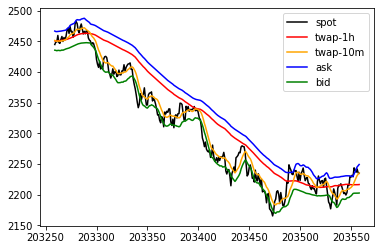

In [273]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203200:203500].plot(c='k', label='spot')
twap_1h_geo_ftx[203200:203500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203200:203500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203200:203500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203200:203500].plot(ax=ax, c='g', label='bid')

ax.legend()

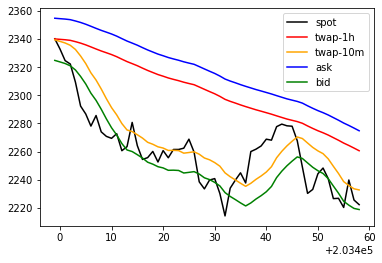

In [274]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203340:203400].plot(c='k', label='spot')
twap_1h_geo_ftx[203340:203400].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203340:203400].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203340:203400].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203340:203400].plot(ax=ax, c='g', label='bid')

ax.legend()

# There's a bit of profit here. Timeshift to check properly

In [275]:
window_1h_ftx

60

In [276]:
twap_1h_geo_ftx_ask_skew_10m_shift_1h_later = twap_1h_geo_ftx_ask_skew_10m.shift(periods=-window_1h_ftx)
twap_1h_geo_ftx_bid_skew_10m_shift_1h_later = twap_1h_geo_ftx_bid_skew_10m.shift(periods=-window_1h_ftx)

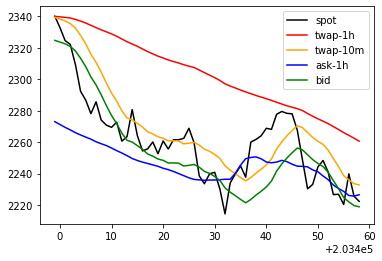

In [277]:
ax = ethusd_ftx_c_filtered[203340:203400].plot(c='k', label='spot')
twap_1h_geo_ftx[203340:203400].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203340:203400].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m_shift_1h_later[203340:203400].plot(ax=ax, c='b', label='ask-1h')
twap_1h_geo_ftx_bid_skew_10m[203340:203400].plot(ax=ax, c='g', label='bid')

ax.legend()

In [278]:
# Profit of 2.5% on scalp here if time properly. market impact will help substantially to mitigate
60/2320

0.02586206896551724

In [279]:
# Look at entire span w time shift.

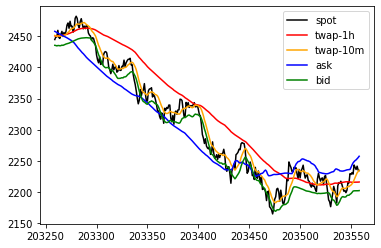

In [280]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203200:203500].plot(c='k', label='spot')
twap_1h_geo_ftx[203200:203500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203200:203500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m_shift_1h_later[203200:203500].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203200:203500].plot(ax=ax, c='g', label='bid')

ax.legend()

# Is it more of a downward trend thing and this should be profitable? Likely. Timeshift by only 10m to check

In [281]:
twap_1h_geo_ftx_ask_skew_10m_shift_10m_later = twap_1h_geo_ftx_ask_skew_10m.shift(periods=-window_10m_ftx)
twap_1h_geo_ftx_bid_skew_10m_shift_10m_later = twap_1h_geo_ftx_bid_skew_10m.shift(periods=-window_10m_ftx)

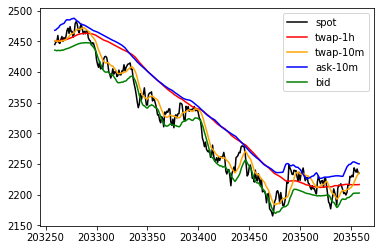

In [282]:
# zoom inaround 203200 to 203500
ax = ethusd_ftx_c_filtered[203200:203500].plot(c='k', label='spot')
twap_1h_geo_ftx[203200:203500].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203200:203500].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m_shift_10m_later[203200:203500].plot(ax=ax, c='b', label='ask-10m')
twap_1h_geo_ftx_bid_skew_10m[203200:203500].plot(ax=ax, c='g', label='bid')

ax.legend()

# Yes. More of a general downward trend to make money off of vs scalp. To be more conservative. check bid vs twap_shift_10m

# look at the long spike up around 203800

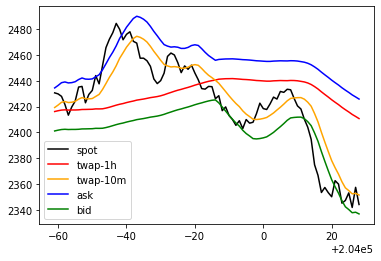

In [283]:
ax = ethusd_ftx_c_filtered[203880:203880+90].plot(c='k', label='spot')
twap_1h_geo_ftx[203880:203880+90].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203880:203880+90].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203880:203880+90].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m[203880:203880+90].plot(ax=ax, c='g', label='bid')

ax.legend()

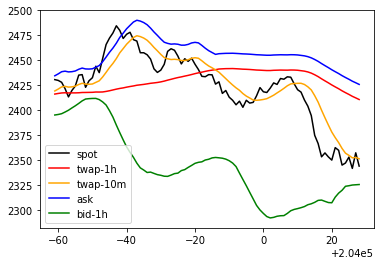

In [284]:
ax = ethusd_ftx_c_filtered[203880:203880+90].plot(c='k', label='spot')
twap_1h_geo_ftx[203880:203880+90].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203880:203880+90].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203880:203880+90].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m_shift_1h_later[203880:203880+90].plot(ax=ax, c='g', label='bid-1h')

ax.legend()

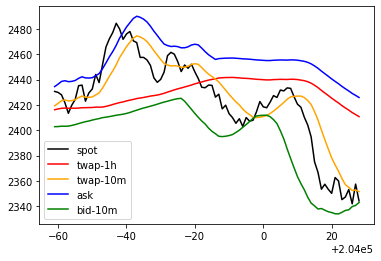

In [285]:
ax = ethusd_ftx_c_filtered[203880:203880+90].plot(c='k', label='spot')
twap_1h_geo_ftx[203880:203880+90].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx[203880:203880+90].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_ask_skew_10m[203880:203880+90].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_bid_skew_10m_shift_10m_later[203880:203880+90].plot(ax=ax, c='g', label='bid-10m')

ax.legend()

# still no profit on scalp! :) 

# Look at collapse in march 2020

In [286]:
FILENAME_FTX_2020 = "ethusd_01012020_08012020"

In [287]:
df_ftx_2020 = pd.read_csv(f"csv/{FILENAME_FTX_2020}.csv")
df_ftx_2020

t       o       h       l       c            v
0       1.577837e+12  128.59  128.59  128.48  128.50      0.00000
1       1.577837e+12  128.50  128.52  128.48  128.48      0.00000
2       1.577837e+12  128.44  128.47  128.42  128.42      0.00000
3       1.577837e+12  128.43  128.44  128.42  128.44      0.00000
4       1.577837e+12  128.43  128.43  128.29  128.34      0.00000
...              ...     ...     ...     ...     ...          ...
308115  1.596314e+12  387.36  387.73  387.36  387.70  10642.42935
308116  1.596314e+12  387.68  387.73  386.46  386.67  21154.51088
308117  1.596314e+12  386.67  387.00  386.40  386.50   1245.20724
308118  1.596314e+12  386.51  386.84  386.48  386.75  11233.66816
308119  1.596314e+12  386.75  386.75  385.45  385.87    963.73278

[308120 rows x 6 columns]

In [288]:
ethusd_ftx_2020_c = df_ftx_2020['c']
ethusd_ftx_2020_c

0         128.50
1         128.48
2         128.42
3         128.44
4         128.34
           ...  
308115    387.70
308116    386.67
308117    386.50
308118    386.75
308119    385.87
Name: c, Length: 308120, dtype: float64

In [289]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_1h_geo_ftx_2020 = ethusd_ftx_2020_c.rolling(window=window_1h_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h_ftx), raw=True)
twap_1h_geo_ftx_2020 = twap_1h_geo_ftx_2020[~twap_1h_geo_ftx_2020.isnull()]
twap_1h_geo_ftx_2020

59        128.353815
60        128.351150
61        128.348984
62        128.349650
63        128.350816
             ...    
308115    385.822735
308116    385.797010
308117    385.763163
308118    385.752366
308119    385.723276
Name: c, Length: 308061, dtype: float64

In [290]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_10m_geo_ftx_2020 = ethusd_ftx_2020_c.rolling(window=window_10m_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m_ftx), raw=True)
twap_10m_geo_ftx_2020 = twap_10m_geo_ftx_2020[~twap_10m_geo_ftx_2020.isnull()]
twap_10m_geo_ftx_2020

9         128.367971
10        128.348978
11        128.331986
12        128.322989
13        128.309995
             ...    
308115    386.829635
308116    386.905748
308117    386.888734
308118    386.905745
308119    386.874675
Name: c, Length: 308111, dtype: float64

In [291]:
# filter the 10m data
twap_10m_geo_ftx_2020 = twap_10m_geo_ftx_2020[50:]
twap_10m_geo_ftx_2020

59        128.286992
60        128.290991
61        128.297989
62        128.318982
63        128.344972
             ...    
308115    386.829635
308116    386.905748
308117    386.888734
308118    386.905745
308119    386.874675
Name: c, Length: 308061, dtype: float64

In [292]:
# and the spot data
ethusd_ftx_2020_c_filtered = ethusd_ftx_2020_c[59:]
ethusd_ftx_2020_c_filtered

59        128.36
60        128.34
61        128.35
62        128.46
63        128.51
           ...  
308115    387.70
308116    386.67
308117    386.50
308118    386.75
308119    385.87
Name: c, Length: 308061, dtype: float64

In [293]:
twap_1h_geo_ftx_2020_ask_skew_10m = pd.concat([twap_10m_geo_ftx_2020, twap_1h_geo_ftx_2020], axis=1).max(axis=1) * np.exp(delta_95p_ftx)
twap_1h_geo_ftx_2020_bid_skew_10m = pd.concat([twap_10m_geo_ftx_2020, twap_1h_geo_ftx_2020], axis=1).min(axis=1) * np.exp(-delta_95p_ftx)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


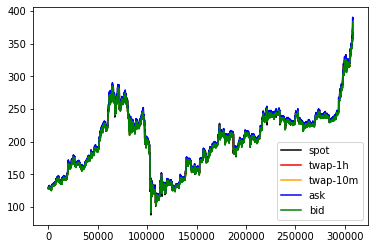

In [294]:
ax = ethusd_ftx_2020_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx_2020.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m.plot(ax=ax, c='g', label='bid')

ax.legend()

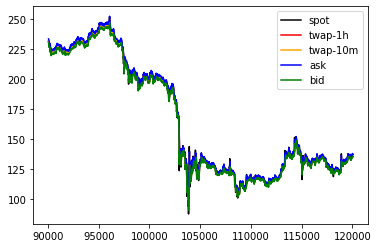

In [295]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[90000:120000].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[90000:120000].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[90000:120000].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[90000:120000].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[90000:120000].plot(ax=ax, c='g', label='bid')

ax.legend()

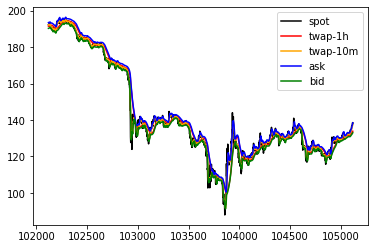

In [296]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[102060:105060].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102060:105060].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102060:105060].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102060:105060].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102060:105060].plot(ax=ax, c='g', label='bid')

ax.legend()

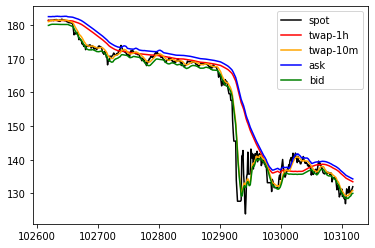

In [297]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[102560:103060].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102560:103060].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102560:103060].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102560:103060].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102560:103060].plot(ax=ax, c='g', label='bid')

ax.legend()

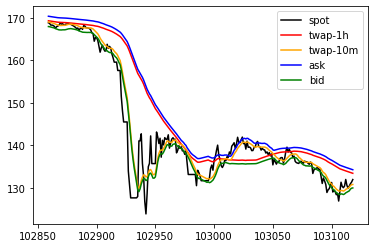

In [298]:
# Zoom in on Mar 12, 2020. 1d candle was -43.32%
ax = ethusd_ftx_2020_c_filtered[102800:103060].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102800:103060].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102800:103060].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102800:103060].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102800:103060].plot(ax=ax, c='g', label='bid')

ax.legend()

In [299]:
# 23.5% drop in an hour
40/170

0.23529411764705882

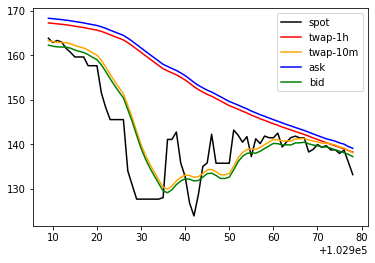

In [300]:
ax = ethusd_ftx_2020_c_filtered[102850:102920].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102850:102920].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102850:102920].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m[102850:102920].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2020_bid_skew_10m[102850:102920].plot(ax=ax, c='g', label='bid')

ax.legend()

In [301]:
# about 18% in 10m ...
30/160.0

0.1875

# Timeshift to check pnl ...

In [302]:
twap_1h_geo_ftx_2020_ask_skew_10m_shift_1h_later = twap_1h_geo_ftx_2020_ask_skew_10m.shift(periods=-window_1h_ftx)
twap_1h_geo_ftx_2020_bid_skew_10m_shift_1h_later = twap_1h_geo_ftx_2020_bid_skew_10m.shift(periods=-window_1h_ftx)

In [303]:
twap_1h_geo_ftx_2020_ask_skew_10m_shift_10m_later = twap_1h_geo_ftx_2020_ask_skew_10m.shift(periods=-window_10m_ftx)
twap_1h_geo_ftx_2020_bid_skew_10m_shift_10m_later = twap_1h_geo_ftx_2020_bid_skew_10m.shift(periods=-window_10m_ftx)

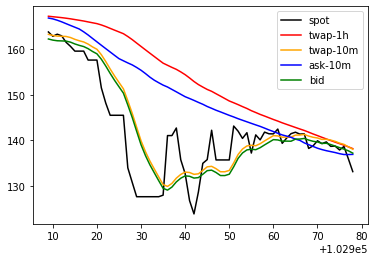

In [304]:
ax = ethusd_ftx_2020_c_filtered[102850:102920].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102850:102920].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102850:102920].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m_shift_10m_later[102850:102920].plot(ax=ax, c='b', label='ask-10m')
twap_1h_geo_ftx_2020_bid_skew_10m[102850:102920].plot(ax=ax, c='g', label='bid')

ax.legend()

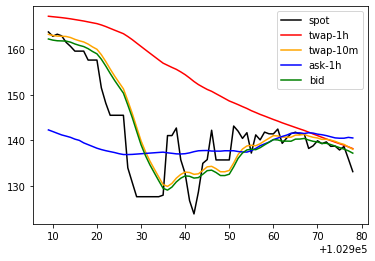

In [305]:
ax = ethusd_ftx_2020_c_filtered[102850:102920].plot(c='k', label='spot')
twap_1h_geo_ftx_2020[102850:102920].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2020[102850:102920].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2020_ask_skew_10m_shift_1h_later[102850:102920].plot(ax=ax, c='b', label='ask-1h')
twap_1h_geo_ftx_2020_bid_skew_10m[102850:102920].plot(ax=ax, c='g', label='bid')

ax.legend()

In [306]:
# 12.5% profit if held thru the 1h. Market impact greatly needed.
20/160.0

0.125

In [307]:
15/160

0.09375

In [308]:
# PnL from market impact if -EV at 3.5% of cap
lambda_95p(0.035)

0.6510291646000596

In [309]:
np.exp(-lambda_95p(0.035)*0.0175)

0.9886716441925837

In [310]:
twap_1h_geo_ftx_2020_bid_skew_10m[102919]

159.50440698018483

In [311]:
twap_1h_geo_ftx_2020_bid_skew_10m[102919]*np.exp(-lambda_95p(0.035)*0.0175)

157.69748430506235

In [312]:
twap_1h_geo_ftx_2020_ask_skew_10m[102919+60]

138.68929316044654

In [313]:
# Scalp made in return
-(twap_1h_geo_ftx_2020_ask_skew_10m[102919+60]/twap_1h_geo_ftx_2020_bid_skew_10m[102919]*np.exp(lambda_95p(0.035)*0.0175)-1)

0.12053579185730623

In [314]:
# lost to scalp about 0.42% of OI cap on march 2020 collapse. Not terrible
0.12053579185730623*0.035

0.004218752715005719

# What's the max q i can enter to remain profitable with this?

In [315]:
# What's the max q i can enter to remain profitable with this?
def mar2020_short_scalp_pnl(q):
    return -(twap_1h_geo_ftx_2020_ask_skew_10m[102919+60]/twap_1h_geo_ftx_2020_bid_skew_10m[102919]*np.exp(lambda_95p(0.035)*q)-1)

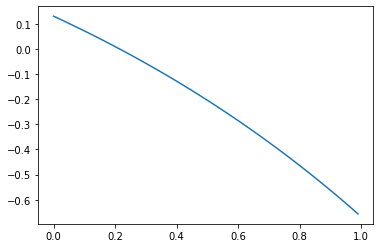

In [316]:
plt.plot(np.arange(0, 1, 0.01), [ mar2020_short_scalp_pnl(q) for q in np.arange(0, 1, 0.01) ])

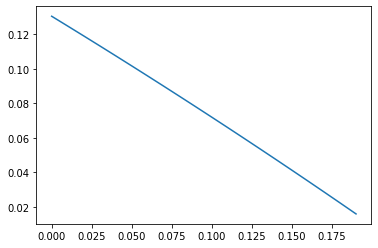

In [317]:
plt.plot(np.arange(0, 0.2, 0.01), [ mar2020_short_scalp_pnl(q) for q in np.arange(0, 0.2, 0.01) ])

# Nice only profitable to 0.18 times the OI cap if aped, but at 0.18 times OI cap, make only <2% pnl

# What's max nominal pnl? for given position size

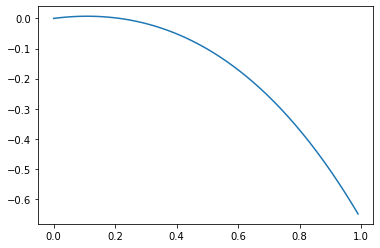

In [318]:
plt.plot(np.arange(0, 1, 0.01), [ q*mar2020_short_scalp_pnl(q) for q in np.arange(0, 1, 0.01) ])

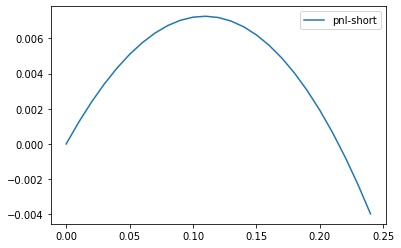

In [319]:
plt.plot(np.arange(0, 0.25, 0.01), [ q*mar2020_short_scalp_pnl(q) for q in np.arange(0, 0.25, 0.01) ], label='pnl-short')
plt.legend()

In [320]:
print([ q*mar2020_short_scalp_pnl(q) for q in np.arange(0, 0.25, 0.01) ][11])
print(0.11*mar2020_short_scalp_pnl(0.11))

0.007254181961006391
0.007254181961006391


# Optimal size for max pnl nominal on short scalp is around 11% of OI cap w slippage

## Worst case yields about 0.725% of OI cap in profits for scalp in largest drop of 2020 (~ -40% drop in 1d and -18% drop in 10m)

In [321]:
print(0.0175*mar2020_short_scalp_pnl(0.0175))
print(0.045*mar2020_short_scalp_pnl(0.045))
print(0.09*mar2020_short_scalp_pnl(0.09))

0.0021093763575028594
0.004709190917375918
0.007022716841976677


# Look at last two years from FTX data. See how much we would have lost to scalp.

# Are note 8 expressions conservative due to 1h TWAP?

# Using FTX ETH-USD 1m historical data: Jan 1, 2020 to Aug 23, 2021

In [322]:
FILENAME_FTX_2YR = "ethusd_01012020_08232021"

In [323]:
df_ftx_2yr = pd.read_csv(f"csv/{FILENAME_FTX_2YR}.csv")
df_ftx_2yr

t        o        h        l        c             v
0       1.577837e+12   128.59   128.59   128.48   128.50  0.000000e+00
1       1.577837e+12   128.50   128.52   128.48   128.48  0.000000e+00
2       1.577837e+12   128.44   128.47   128.42   128.42  0.000000e+00
3       1.577837e+12   128.43   128.44   128.42   128.44  0.000000e+00
4       1.577837e+12   128.43   128.43   128.29   128.34  0.000000e+00
...              ...      ...      ...      ...      ...           ...
865240  1.629729e+12  3360.40  3362.60  3360.00  3361.40  3.156269e+05
865241  1.629729e+12  3361.40  3361.40  3352.10  3355.00  3.889148e+05
865242  1.629729e+12  3355.00  3355.00  3343.00  3347.80  9.464433e+05
865243  1.629729e+12  3347.80  3349.90  3335.20  3336.00  9.268230e+05
865244  1.629729e+12  3336.00  3339.20  3334.10  3334.80  1.016610e+06

[865245 rows x 6 columns]

In [324]:
# Use 2021 fit params since relatively close. Ideally we'd have a sim where update fits every month - couple of months, but doesn't change that much
# Use close prices
ethusd_ftx_2yr_c = df_ftx_2yr['c']
ethusd_ftx_2yr_c

0          128.50
1          128.48
2          128.42
3          128.44
4          128.34
           ...   
865240    3361.40
865241    3355.00
865242    3347.80
865243    3336.00
865244    3334.80
Name: c, Length: 865245, dtype: float64

In [325]:
# Geometric mean is a bit more annoying given inf in pd. Do it all through rolling apply knowing dt is always 60 steps (1m data) in this sim
twap_10m_geo_ftx_2yr = ethusd_ftx_2yr_c.rolling(window=window_10m_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_10m_ftx), raw=True)
twap_10m_geo_ftx_2yr = twap_10m_geo_ftx_2yr[~twap_10m_geo_ftx_2yr.isnull()]
twap_10m_geo_ftx_2yr

9          128.367971
10         128.348978
11         128.331986
12         128.322989
13         128.309995
             ...     
865240    3366.537554
865241    3364.816489
865242    3362.244273
865243    3359.045975
865244    3356.009100
Name: c, Length: 865236, dtype: float64

In [326]:
twap_1h_geo_ftx_2yr = ethusd_ftx_2yr_c.rolling(window=window_1h_ftx).apply(lambda w: w[0] * (np.prod(w/w[0]))**(1/window_1h_ftx), raw=True)
twap_1h_geo_ftx_2yr = twap_1h_geo_ftx_2yr[~twap_1h_geo_ftx_2yr.isnull()]
twap_1h_geo_ftx_2yr

59         128.353815
60         128.351150
61         128.348984
62         128.349650
63         128.350816
             ...     
865240    3353.379885
865241    3353.698989
865242    3353.871228
865243    3353.799224
865244    3353.683690
Name: c, Length: 865186, dtype: float64

In [327]:
ethusd_ftx_2yr_c_filtered = ethusd_ftx_2yr_c[59:]
ethusd_ftx_2yr_c_filtered

59         128.36
60         128.34
61         128.35
62         128.46
63         128.51
           ...   
865240    3361.40
865241    3355.00
865242    3347.80
865243    3336.00
865244    3334.80
Name: c, Length: 865186, dtype: float64

In [328]:
twap_10m_geo_ftx_2yr = twap_10m_geo_ftx_2yr[50:]

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


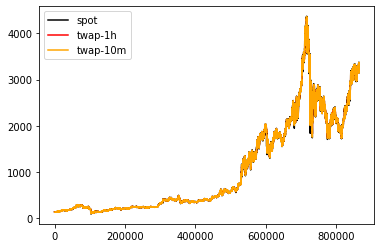

In [329]:
ax = ethusd_ftx_2yr_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx_2yr.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr.plot(ax=ax, c='orange', label='twap-10m')
#twap_1h_geo_ftx_2yr_ask_skew_10m.plot(ax=ax, c='b', label='ask')
#twap_1h_geo_ftx_2yr_bid_skew_10m.plot(ax=ax, c='g', label='bid')
ax.legend()

In [330]:
# bid/ask ... use fit from 2021 (close to 2020)
twap_1h_geo_ftx_2yr_ask_skew_10m = pd.concat([twap_10m_geo_ftx_2yr, twap_1h_geo_ftx_2yr], axis=1).max(axis=1) * np.exp(delta_95p_ftx)
twap_1h_geo_ftx_2yr_bid_skew_10m = pd.concat([twap_10m_geo_ftx_2yr, twap_1h_geo_ftx_2yr], axis=1).min(axis=1) * np.exp(-delta_95p_ftx)

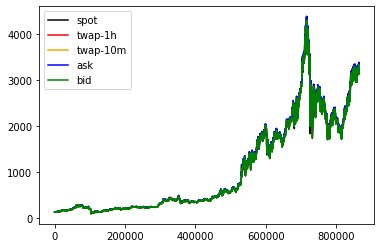

In [331]:
ax = ethusd_ftx_2yr_c_filtered.plot(c='k', label='spot')
twap_1h_geo_ftx_2yr.plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr.plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m.plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m.plot(ax=ax, c='g', label='bid')
ax.legend()

# Strategy: if spot goes outside of static spread, deploy capital when jump happens before 10m window elapses. Exit after 1h once deploy

In [332]:
# Calc returns for trade when spot < bid or spot > ask
ret_tmp_1h_geo_ftx_2yr = pd.concat([ethusd_ftx_2yr_c_filtered, twap_1h_geo_ftx_2yr_bid_skew_10m, twap_1h_geo_ftx_2yr_ask_skew_10m], axis=1)
ret_tmp_1h_geo_ftx_2yr.columns = ['c', 'b', 'a']
ret_tmp_1h_geo_ftx_2yr

c            b            a
59       128.36   127.486648   129.159603
60       128.34   127.490622   129.156921
61       128.35   127.497577   129.154742
62       128.46   127.518438   129.155412
63       128.51   127.544267   129.156585
...         ...          ...          ...
865240  3361.40  3332.459157  3387.672222
865241  3355.00  3332.776270  3385.940351
865242  3347.80  3332.947434  3383.351988
865243  3336.00  3332.875880  3380.133611
865244  3334.80  3332.761067  3377.077671

[865186 rows x 3 columns]

In [333]:
# short trade return over the 1h
ret_tmp_short_1h_geo_ftx_2yr = -(ret_tmp_1h_geo_ftx_2yr.a.shift(periods=-window_1h_ftx)/ret_tmp_1h_geo_ftx_2yr.b - 1)
ret_tmp_short_1h_geo_ftx_2yr

59       -0.024529
60       -0.025104
61       -0.025632
62       -0.025748
63       -0.025912
            ...   
865240         NaN
865241         NaN
865242         NaN
865243         NaN
865244         NaN
Length: 865186, dtype: float64

In [334]:
# long trade return over the 1h
ret_tmp_long_1h_geo_ftx_2yr = (ret_tmp_1h_geo_ftx_2yr.b.shift(periods=-window_1h_ftx)/ret_tmp_1h_geo_ftx_2yr.a - 1)
ret_tmp_long_1h_geo_ftx_2yr

59       -0.005156
60       -0.004881
61       -0.004613
62       -0.004403
63       -0.004199
            ...   
865240         NaN
865241         NaN
865242         NaN
865243         NaN
865244         NaN
Length: 865186, dtype: float64

In [335]:
# diff between ask and closing price
ret_tmp_ask_v_c_1h_geo_ftx_2yr = ret_tmp_1h_geo_ftx_2yr.c/ret_tmp_1h_geo_ftx_2yr.a - 1
ret_tmp_ask_v_c_1h_geo_ftx_2yr

59       -0.006191
60       -0.006325
61       -0.006231
62       -0.005384
63       -0.005006
            ...   
865240   -0.007755
865241   -0.009138
865242   -0.010508
865243   -0.013057
865244   -0.012519
Length: 865186, dtype: float64

In [336]:
# diff between bid and closing price
ret_tmp_bid_v_c_1h_geo_ftx_2yr = ret_tmp_1h_geo_ftx_2yr.c/ret_tmp_1h_geo_ftx_2yr.b - 1
ret_tmp_bid_v_c_1h_geo_ftx_2yr

59        0.006851
60        0.006662
61        0.006686
62        0.007384
63        0.007572
            ...   
865240    0.008685
865241    0.006668
865242    0.004456
865243    0.000937
865244    0.000612
Length: 865186, dtype: float64

In [337]:
ret_1h_geo_ftx_2yr = pd.concat([ethusd_ftx_2yr_c_filtered, twap_1h_geo_ftx_2yr_bid_skew_10m, twap_1h_geo_ftx_2yr_ask_skew_10m, ret_tmp_ask_v_c_1h_geo_ftx_2yr, ret_tmp_long_1h_geo_ftx_2yr, ret_tmp_bid_v_c_1h_geo_ftx_2yr, ret_tmp_short_1h_geo_ftx_2yr], axis=1)
ret_1h_geo_ftx_2yr.columns = ['c', 'b', 'a', '(c-a)/a', 'r_long', '(c-b)/b', 'r_short']
ret_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
59       128.36   127.486648   129.159603 -0.006191 -0.005156  0.006851   
60       128.34   127.490622   129.156921 -0.006325 -0.004881  0.006662   
61       128.35   127.497577   129.154742 -0.006231 -0.004613  0.006686   
62       128.46   127.518438   129.155412 -0.005384 -0.004403  0.007384   
63       128.51   127.544267   129.156585 -0.005006 -0.004199  0.007572   
...         ...          ...          ...       ...       ...       ...   
865240  3361.40  3332.459157  3387.672222 -0.007755       NaN  0.008685   
865241  3355.00  3332.776270  3385.940351 -0.009138       NaN  0.006668   
865242  3347.80  3332.947434  3383.351988 -0.010508       NaN  0.004456   
865243  3336.00  3332.875880  3380.133611 -0.013057       NaN  0.000937   
865244  3334.80  3332.761067  3377.077671 -0.012519       NaN  0.000612   

         r_short  
59     -0.024529  
60     -0.025104  
61     -0.025632  
62     -0.025748  
63     -0.025912  
...          ...  
865240       NaN  
865241       NaN  
865242       NaN  
865243       NaN  
865244       NaN  

[865186 rows x 7 columns]

In [338]:
ret_1h_geo_ftx_2yr = ret_1h_geo_ftx_2yr[:len(ret_1h_geo_ftx_2yr)-window_1h_ftx]

In [339]:
ret_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
59       128.36   127.486648   129.159603 -0.006191 -0.005156  0.006851   
60       128.34   127.490622   129.156921 -0.006325 -0.004881  0.006662   
61       128.35   127.497577   129.154742 -0.006231 -0.004613  0.006686   
62       128.46   127.518438   129.155412 -0.005384 -0.004403  0.007384   
63       128.51   127.544267   129.156585 -0.005006 -0.004199  0.007572   
...         ...          ...          ...       ...       ...       ...   
865180  3337.50  3314.163154  3362.262183 -0.007365 -0.008864  0.007042   
865181  3335.90  3314.292335  3362.009110 -0.007766 -0.008695  0.006520   
865182  3337.50  3314.570516  3361.777906 -0.007222 -0.008576  0.006918   
865183  3340.30  3315.315659  3361.576987 -0.006329 -0.008538  0.007536   
865184  3341.70  3316.299447  3361.399555 -0.005861 -0.008520  0.007659   

         r_short  
59     -0.024529  
60     -0.025104  
61     -0.025632  
62     -0.025748  
63     -0.025912  
...          ...  
865180 -0.022180  
865181 -0.021618  
865182 -0.020751  
865183 -0.019551  
865184 -0.018327  

[865126 rows x 7 columns]

In [340]:
ret_1h_geo_ftx_2yr.sort_values('(c-a)/a', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    97.979911   100.473904  0.155225  0.203545  0.184631   
103881   124.48    99.850368   113.281554  0.098855  0.096033  0.246665   
103874   110.30    99.255650   100.850871  0.093694  0.203455  0.111272   
103877   113.39    99.391899   106.137725  0.068329  0.155480  0.140837   
103886   126.76   100.856370   118.754299  0.067414  0.055816  0.256837   
...         ...          ...          ...       ...       ...       ...   
726815  2014.60  2218.945866  2594.937371 -0.223642 -0.114462 -0.092091   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726814  1990.00  2270.467764  2608.197552 -0.237021 -0.122228 -0.123529   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
726829  1835.10  2061.357828  2442.347687 -0.248633 -0.028050 -0.109762   

         r_short  
103873 -0.391434  
103881 -0.398705  
103874 -0.381596  
103877 -0.395871  
103886 -0.369265  
...          ...  
726815 -0.124206  
726813 -0.068900  
726814 -0.092315  
726828 -0.148558  
726829 -0.173206  

[865126 rows x 7 columns]

In [341]:
ret_1h_geo_ftx_2yr.sort_values('r_long', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
103873   116.07    97.979911   100.473904  0.155225  0.203545  0.184631   
103874   110.30    99.255650   100.850871  0.093694  0.203455  0.111272   
103872   104.69    95.888115   100.353304  0.043214  0.201175  0.091793   
103871   100.13    94.817374   100.398859 -0.002678  0.194266  0.056030   
103875   109.14    99.271337   102.399882  0.065822  0.189713  0.099411   
...         ...          ...          ...       ...       ...       ...   
726771  2715.70  2685.335935  2761.714507 -0.016662 -0.270135  0.011307   
726772  2708.20  2683.839620  2759.198158 -0.018483 -0.274129  0.009077   
726775  2703.00  2680.106899  2746.964374 -0.016005 -0.274843  0.008542   
726773  2715.30  2682.494731  2755.446231 -0.014570 -0.275745  0.012229   
726774  2727.20  2681.368299  2752.283662 -0.009114 -0.275774  0.017093   

         r_short  
103873 -0.391434  
103874 -0.381596  
103872 -0.410540  
103871 -0.408950  
103875 -0.388271  
...          ...  
726771  0.100102  
726772  0.103536  
726775  0.113623  
726773  0.106949  
726774  0.110507  

[865126 rows x 7 columns]

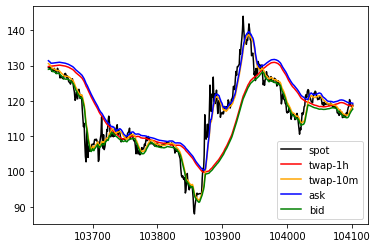

In [342]:
# Plot around 103873 to see what happened here ...
ax = ethusd_ftx_2yr_c_filtered[103873-60*4-60:103873-10-60+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-60*4-60:103873-10-60+60*4].plot(ax=ax, c='g', label='bid')
ax.legend()

In [343]:
ethusd_ftx_2yr_c_filtered[103873-60:103873-60+1440]

103872    104.69
103873    116.07
103874    110.30
103875    109.14
103876    110.77
           ...  
105307    131.91
105308    131.91
105309    132.09
105310    131.77
105311    131.77
Name: c, Length: 1440, dtype: float64

In [344]:
103872*60/86400.0

72.13333333333334

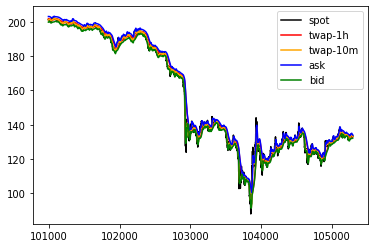

In [345]:
# Yea this was Mar 12
ax = ethusd_ftx_2yr_c_filtered[103873-60*48-60:103873-10-60+60*24].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-60*48-60:103873-10-60+60*24].plot(ax=ax, c='g', label='bid')
ax.legend()

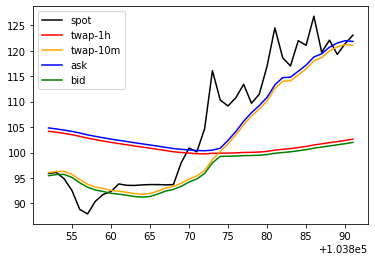

In [346]:
# eth-usd jumped about 20% in 5 minutes is what happened
# Ok when spike happens, don't know it won't come back down, but still looks pretty good potentially for pnl on trade
ax = ethusd_ftx_2yr_c_filtered[103873-10*2-60:103873+10*2-60].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-10*2-60:103873+10*2-60].plot(ax=ax, c='g', label='bid')
ax.legend()

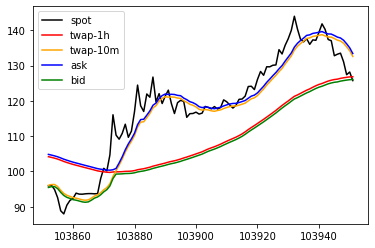

In [347]:
ax = ethusd_ftx_2yr_c_filtered[103873-10*2-60:103873+10*2-60+60].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[103873-10*2-60:103873+10*2-60+60].plot(ax=ax, c='g', label='bid')
ax.legend()

In [348]:
ret_1h_geo_ftx_2yr.sort_values('(c-b)/b', ascending=True)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
308606   327.22   380.401536   405.951532 -0.193943 -0.085127 -0.139804   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726814  1990.00  2270.467764  2608.197552 -0.237021 -0.122228 -0.123529   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
...         ...          ...          ...       ...       ...       ...   
103888   122.06   101.308735   120.681929  0.011419  0.042091  0.204832   
103891   123.05   101.993872   121.815968  0.010130  0.034846  0.206445   
103884   121.96   100.353574   115.956540  0.051773  0.078724  0.215303   
103881   124.48    99.850368   113.281554  0.098855  0.096033  0.246665   
103886   126.76   100.856370   118.754299  0.067414  0.055816  0.256837   

         r_short  
308605  0.029293  
308606  0.004957  
726813 -0.068900  
726814 -0.092315  
726828 -0.148558  
...          ...  
103888 -0.354363  
103891 -0.308322  
103884 -0.384646  
103881 -0.398705  
103886 -0.369265  

[865126 rows x 7 columns]

In [349]:
ret_1h_geo_ftx_2yr.sort_values('r_short', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
726784  2654.70  2668.621214  2705.542709 -0.018792 -0.176089 -0.005217   
726783  2666.10  2672.798277  2709.523531 -0.016026 -0.186600 -0.002506   
726785  2633.40  2661.668793  2704.286694 -0.026213 -0.164534 -0.010621   
102917   159.58   160.579324   167.221266 -0.045696 -0.176347 -0.006223   
102918   157.62   160.117073   167.025115 -0.056310 -0.178461 -0.015595   
...         ...          ...          ...       ...       ...       ...   
103868    93.71    92.764259   100.788345 -0.070230  0.170537  0.010195   
103870   100.88    94.204208   100.525235  0.003529  0.186120  0.070865   
103869    97.99    93.374606   100.632404 -0.026258  0.178739  0.049429   
103871   100.13    94.817374   100.398859 -0.002678  0.194266  0.056030   
103872   104.69    95.888115   100.353304  0.043214  0.201175  0.091793   

         r_short  
726784  0.132665  
726783  0.132228  
726785  0.131530  
102917  0.131453  
102918  0.131389  
...          ...  
103868 -0.401566  
103870 -0.405853  
103869 -0.405977  
103871 -0.408950  
103872 -0.410540  

[865126 rows x 7 columns]

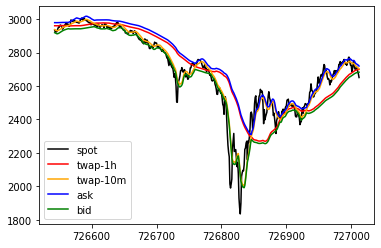

In [350]:
# what happened at 726784? and 308605?
# ah, The 726784 was the may 19 drop
ax = ethusd_ftx_2yr_c_filtered[726784-60*4-60:726784-10-60+60*4].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[726784-60*4-60:726784-10-60+60*4].plot(ax=ax, c='g', label='bid')
ax.legend()

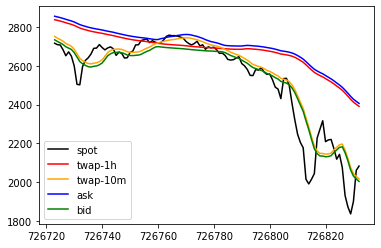

In [351]:
ax = ethusd_ftx_2yr_c_filtered[726784-60*1-60:726784-10-60+60*1].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[726784-60*1-60:726784-10-60+60*1].plot(ax=ax, c='g', label='bid')
ax.legend()

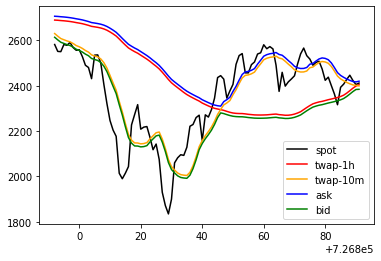

In [352]:
# More likely to go short where diff bw spot and bid is greatest: 726813
ax = ethusd_ftx_2yr_c_filtered[726813-10*2-60:726813+10*2-60+60*1].plot(c='k', label='spot')
twap_1h_geo_ftx_2yr[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='r', label='twap-1h')
twap_10m_geo_ftx_2yr[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='orange', label='twap-10m')
twap_1h_geo_ftx_2yr_ask_skew_10m[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='b', label='ask')
twap_1h_geo_ftx_2yr_bid_skew_10m[726813-10*2-60:726813+10*2-60+60*1].plot(ax=ax, c='g', label='bid')
ax.legend()

In [353]:
300/2600.0

0.11538461538461539

In [354]:
# Look at (c-a)/a and (c-b)/b as indicators for trade (what scalper would use).
# Then scalp and see profits if (c-a)/a and (c-b)/b are large enough
ret_1h_geo_ftx_2yr_sorted = ret_1h_geo_ftx_2yr.sort_values('(c-b)/b', ascending=True)
ret_1h_geo_ftx_2yr_sorted

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
308606   327.22   380.401536   405.951532 -0.193943 -0.085127 -0.139804   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726814  1990.00  2270.467764  2608.197552 -0.237021 -0.122228 -0.123529   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
...         ...          ...          ...       ...       ...       ...   
103888   122.06   101.308735   120.681929  0.011419  0.042091  0.204832   
103891   123.05   101.993872   121.815968  0.010130  0.034846  0.206445   
103884   121.96   100.353574   115.956540  0.051773  0.078724  0.215303   
103881   124.48    99.850368   113.281554  0.098855  0.096033  0.246665   
103886   126.76   100.856370   118.754299  0.067414  0.055816  0.256837   

         r_short  
308605  0.029293  
308606  0.004957  
726813 -0.068900  
726814 -0.092315  
726828 -0.148558  
...          ...  
103888 -0.354363  
103891 -0.308322  
103884 -0.384646  
103881 -0.398705  
103886 -0.369265  

[865126 rows x 7 columns]

In [355]:
ret_1h_geo_ftx_2yr_sorted[ret_1h_geo_ftx_2yr_sorted['(c-b)/b'] < 0]

c            b            a   (c-a)/a    r_long       (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -1.572619e-01   
308606   327.22   380.401536   405.951532 -0.193943 -0.085127 -1.398037e-01   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -1.304438e-01   
726814  1990.00  2270.467764  2608.197552 -0.237021 -0.122228 -1.235286e-01   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -1.127682e-01   
...         ...          ...          ...       ...       ...           ...   
770386  2151.90  2151.903858  2210.027363 -0.026302 -0.029284 -1.792736e-06   
112252   116.14   116.140156   117.757851 -0.013739 -0.022128 -1.339077e-06   
118936   131.44   131.440172   133.609033 -0.016234 -0.028952 -1.305896e-06   
354767   429.48   429.480334   436.520618 -0.016129 -0.021600 -7.785937e-07   
675302  2260.90  2260.900352  2313.897771 -0.022904 -0.020017 -1.554903e-07   

         r_short  
308605  0.029293  
308606  0.004957  
726813 -0.068900  
726814 -0.092315  
726828 -0.148558  
...          ...  
770386 -0.011480  
112252 -0.007919  
118936 -0.002697  
354767 -0.012098  
675302 -0.022757  

[10294 rows x 7 columns]

In [356]:
# Look at cases where c/b-1 is < - 2 * delt_95
ret_short_1h_geo_ftx_2yr = ret_1h_geo_ftx_2yr[ret_1h_geo_ftx_2yr['(c-b)/b'] < -2*delta_95p_ftx]
ret_short_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
26600    167.76   172.425568   175.948049 -0.046537 -0.062253 -0.027058   
26601    165.02   171.441552   175.774937 -0.061186 -0.062048 -0.037456   
26602    167.95   170.758540   175.653678 -0.043857 -0.062267 -0.016447   
26603    167.22   169.998344   175.521599 -0.047297 -0.062569 -0.016343   
26604    163.52   168.899053   175.323558 -0.067324 -0.062336 -0.031848   
...         ...          ...          ...       ...       ...       ...   
773984  2011.60  2037.418692  2127.272218 -0.054376 -0.063395 -0.012672   
774150  1966.90  1996.797756  2028.582934 -0.030407 -0.026494 -0.014973   
774151  1959.30  1992.278591  2027.411426 -0.033595 -0.026589 -0.016553   
794448  2231.70  2261.732763  2310.506152 -0.034108 -0.048039 -0.013279   
839199  2531.00  2577.260410  2634.436064 -0.039263 -0.016798 -0.017949   

         r_short  
26600   0.029595  
26601   0.024004  
26602   0.020402  
26603   0.016263  
26604   0.009699  
...          ...  
773984  0.003631  
774150 -0.007965  
774151 -0.010415  
794448  0.014248  
839199 -0.023721  

[561 rows x 7 columns]

In [357]:
# only look at the unique occurrences of jumps ... might have to manually go through to see worst case pnl (to start)
short_windows = [[]]
short_windows_min_c_vs_bid = []
for i in range(len(ret_short_1h_geo_ftx_2yr.index)-1):
    last = short_windows[len(short_windows)-1]
    if len(last) == 0:
        short_windows[len(short_windows)-1].append(ret_short_1h_geo_ftx_2yr.index[i])
        short_windows_min_c_vs_bid.append(ret_short_1h_geo_ftx_2yr.index[i])
    elif ret_short_1h_geo_ftx_2yr.index[i] - last[-1] == 1:
        short_windows[len(short_windows)-1].append(ret_short_1h_geo_ftx_2yr.index[i])
        
        min_index = short_windows_min_c_vs_bid[len(short_windows)-1]
        new_min_index = ret_short_1h_geo_ftx_2yr.index[i]
        if ret_short_1h_geo_ftx_2yr.loc[new_min_index]['(c-b)/b'] < ret_short_1h_geo_ftx_2yr.loc[min_index]['(c-b)/b']:
            short_windows_min_c_vs_bid[len(short_windows)-1] = new_min_index
    else:
        short_windows.append([ret_short_1h_geo_ftx_2yr.index[i]])
        short_windows_min_c_vs_bid.append(ret_short_1h_geo_ftx_2yr.index[i])
        
print('len(short_windows):', len(short_windows))
print('short_windows[:10]:', short_windows[:10])
print('short_windows_min[:10]:', short_windows_min_c_vs_bid[:10])

len(short_windows): 243
short_windows[:10]: [[26600, 26601, 26602, 26603, 26604, 26605], [52704], [62437, 62438, 62439], [62789], [65814], [67239], [67267], [67269, 67270, 67271, 67272], [71891, 71892, 71893, 71894, 71895, 71896, 71897], [82177]]
short_windows_min[:10]: [26601, 52704, 62437, 62789, 65814, 67239, 67267, 67271, 71892, 82177]


In [358]:
# Within the windows, pick the point at which (c-b)/b is at its lowest
ret_short_1h_geo_ftx_2yr.loc[67271]['(c-b)/b']

-0.022356462693137735

In [359]:
ret_short_1h_geo_ftx_2yr[ret_short_1h_geo_ftx_2yr.index.isin(short_windows_min_c_vs_bid)].sort_values('(c-b)/b', ascending=True)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
102929   127.67   142.011743   162.361646 -0.213669 -0.186757 -0.100990   
187312   183.00   203.283941   210.977427 -0.132609 -0.097046 -0.099781   
...         ...          ...          ...       ...       ...       ...   
67239    252.85   256.090623   260.978072 -0.031145 -0.053322 -0.012654   
115161   129.08   130.728823   132.418901 -0.025215 -0.020822 -0.012613   
646687  1555.20  1575.065022  1616.809893 -0.038106 -0.028256 -0.012612   
604058  1505.80  1525.031681  1592.821591 -0.054634 -0.117444 -0.012611   
730137  2259.40  2288.245924  2369.138853 -0.046320 -0.084147 -0.012606   

         r_short  
308605  0.029293  
726813 -0.068900  
726828 -0.148558  
102929  0.035175  
187312  0.050958  
...          ...  
67239   0.021625  
115161 -0.007301  
646687 -0.012919  
604058  0.020495  
730137  0.000010  

[243 rows x 7 columns]

In [360]:
# For each one of these window times, short the bid with optimal size
# Assume get c at some point for the ask exit price. Rough pnl is then -(c-b/b)
# Including market impact, know that will make in pnl ~ q*(1 - (ask/bid) * (1 + l*q))
#
# dpnl/dq = (1 - (ask/bid) * (1 + l*q)) + q * (-(ask/bid)*l) = 1 - (ask/bid) - 2*(ask/bid)*l*q
# .... critical when ... 
#     2*(ask/bid)*l*q = 1-ask/bid ... q = (1/(2*l)) * (bid/ask - 1)
#   but since taking ask ~ c .... q_c = (1/(2*l)) * (b/c - 1)
#
# pnl_c = q*[1 - (c/b)*(1+[(1/2) * (b/c - 1)])] = q * [ 1 - c/b - (1/2)*(1 - c/b) ]
#       = q/2 * [ 1 - c/b ]
#
# So each time, compute q_c
l = lambda_95p(0.035)
qc_short_1h_geo_ftx_2yr = (ret_short_1h_geo_ftx_2yr.b/ret_short_1h_geo_ftx_2yr.c - 1)/(2*l)
qc_short_1h_geo_ftx_2yr

26600     0.021359
26601     0.029886
26602     0.012843
26603     0.012760
26604     0.025264
            ...   
773984    0.009857
774150    0.011674
774151    0.012927
794448    0.010335
839199    0.014037
Length: 561, dtype: float64

In [361]:
pnl_short_hypothesis_1h_geo_ftx_2y = qc_short_1h_geo_ftx_2yr * (1-(ret_short_1h_geo_ftx_2yr.c/ret_short_1h_geo_ftx_2yr.b)*np.exp(l*qc_short_1h_geo_ftx_2yr))
pnl_short_hypothesis_1h_geo_ftx_2y

26600     0.000287
26601     0.000554
26602     0.000105
26603     0.000104
26604     0.000399
            ...   
773984    0.000062
774150    0.000087
774151    0.000107
794448    0.000068
839199    0.000125
Length: 561, dtype: float64

In [362]:
max(pnl_short_hypothesis_1h_geo_ftx_2y)

0.010726755295003844

In [363]:
# TODO: In reality, max pnl is less due to 1h twap. need to cycle through 1h after to check ...

In [364]:
short_hypothesis_1h_geo_ftx_2yr = pd.concat([ret_short_1h_geo_ftx_2yr, qc_short_1h_geo_ftx_2yr, pnl_short_hypothesis_1h_geo_ftx_2y], axis=1)
short_hypothesis_1h_geo_ftx_2yr.columns = ['c', 'b', 'a', '(c-a)/a', 'r_long', '(c-b)/b', 'r_short', 'qc_short', 'pnl_short_hypothesis']
short_hypothesis_1h_geo_ftx_2yr

c            b            a   (c-a)/a    r_long   (c-b)/b  \
26600    167.76   172.425568   175.948049 -0.046537 -0.062253 -0.027058   
26601    165.02   171.441552   175.774937 -0.061186 -0.062048 -0.037456   
26602    167.95   170.758540   175.653678 -0.043857 -0.062267 -0.016447   
26603    167.22   169.998344   175.521599 -0.047297 -0.062569 -0.016343   
26604    163.52   168.899053   175.323558 -0.067324 -0.062336 -0.031848   
...         ...          ...          ...       ...       ...       ...   
773984  2011.60  2037.418692  2127.272218 -0.054376 -0.063395 -0.012672   
774150  1966.90  1996.797756  2028.582934 -0.030407 -0.026494 -0.014973   
774151  1959.30  1992.278591  2027.411426 -0.033595 -0.026589 -0.016553   
794448  2231.70  2261.732763  2310.506152 -0.034108 -0.048039 -0.013279   
839199  2531.00  2577.260410  2634.436064 -0.039263 -0.016798 -0.017949   

         r_short  qc_short  pnl_short_hypothesis  
26600   0.029595  0.021359              0.000287  
26601   0.024004  0.029886              0.000554  
26602   0.020402  0.012843              0.000105  
26603   0.016263  0.012760              0.000104  
26604   0.009699  0.025264              0.000399  
...          ...       ...                   ...  
773984  0.003631  0.009857              0.000062  
774150 -0.007965  0.011674              0.000087  
774151 -0.010415  0.012927              0.000107  
794448  0.014248  0.010335              0.000068  
839199 -0.023721  0.014037              0.000125  

[561 rows x 9 columns]

In [365]:
short_hypothesis_1h_geo_ftx_2yr.sort_values('qc_short', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
308606   327.22   380.401536   405.951532 -0.193943 -0.085127 -0.139804   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726814  1990.00  2270.467764  2608.197552 -0.237021 -0.122228 -0.123529   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
...         ...          ...          ...       ...       ...       ...   
646687  1555.20  1575.065022  1616.809893 -0.038106 -0.028256 -0.012612   
604058  1505.80  1525.031681  1592.821591 -0.054634 -0.117444 -0.012611   
730137  2259.40  2288.245924  2369.138853 -0.046320 -0.084147 -0.012606   
104237   123.93   125.508045   127.421139 -0.027398 -0.010627 -0.012573   
109223   109.34   110.727673   114.408587 -0.044303 -0.041869 -0.012532   

         r_short  qc_short  pnl_short_hypothesis  
308605  0.029293  0.143318              0.010727  
308606  0.004957  0.124822              0.008361  
726813 -0.068900  0.115211              0.007225  
726814 -0.092315  0.108243              0.006444  
726828 -0.148558  0.097616              0.005325  
...          ...       ...                   ...  
646687 -0.012919  0.009810              0.000062  
604058  0.020495  0.009809              0.000062  
730137  0.000010  0.009805              0.000062  
104237 -0.030107  0.009779              0.000061  
109223 -0.003337  0.009747              0.000061  

[561 rows x 9 columns]

In [366]:
# only look at unique values
short_hypothesis_1h_geo_ftx_2yr_max_c_v_b = short_hypothesis_1h_geo_ftx_2yr[short_hypothesis_1h_geo_ftx_2yr.index.isin(short_windows_min_c_vs_bid)]
short_hypothesis_1h_geo_ftx_2yr_max_c_v_b.sort_values('pnl_short_hypothesis', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
102929   127.67   142.011743   162.361646 -0.213669 -0.186757 -0.100990   
187312   183.00   203.283941   210.977427 -0.132609 -0.097046 -0.099781   
...         ...          ...          ...       ...       ...       ...   
67239    252.85   256.090623   260.978072 -0.031145 -0.053322 -0.012654   
115161   129.08   130.728823   132.418901 -0.025215 -0.020822 -0.012613   
646687  1555.20  1575.065022  1616.809893 -0.038106 -0.028256 -0.012612   
604058  1505.80  1525.031681  1592.821591 -0.054634 -0.117444 -0.012611   
730137  2259.40  2288.245924  2369.138853 -0.046320 -0.084147 -0.012606   

         r_short  qc_short  pnl_short_hypothesis  
308605  0.029293  0.143318              0.010727  
726813 -0.068900  0.115211              0.007225  
726828 -0.148558  0.097616              0.005325  
102929  0.035175  0.086275              0.004232  
187312  0.050958  0.085128              0.004127  
...          ...       ...                   ...  
67239   0.021625  0.009843              0.000062  
115161 -0.007301  0.009810              0.000062  
646687 -0.012919  0.009810              0.000062  
604058  0.020495  0.009809              0.000062  
730137  0.000010  0.009805              0.000062  

[243 rows x 9 columns]

In [367]:
# Hypothesis pnl (bleeding on short scalp) over time (2y) is ...
short_hypothesis_1h_geo_ftx_2yr_max_c_v_b['pnl_short_hypothesis'].sum()

0.08854313801942837

In [370]:
# So look at bid prices 1h after enter short. pick bid which maximizes profit for worst case scalp return (as if trader knew price beforehand)
print('short_windows_min_c_vs_bid', short_windows_min_c_vs_bid)

short_windows_min_c_vs_bid [26601, 52704, 62437, 62789, 65814, 67239, 67267, 67271, 71892, 82177, 97502, 97949, 102903, 102918, 102929, 102942, 102968, 102978, 102985, 103092, 103096, 103252, 103510, 103516, 103527, 103532, 103564, 103673, 103689, 103693, 103709, 103767, 103770, 103827, 103843, 103849, 103857, 103963, 103991, 103999, 104006, 104019, 104235, 104238, 104389, 104618, 104625, 104655, 104811, 104851, 107949, 108398, 108405, 108411, 108495, 108501, 108651, 109218, 109222, 113755, 114611, 114930, 115014, 115040, 115161, 117412, 118134, 125322, 148424, 159640, 173142, 173490, 180690, 187312, 189832, 202622, 221325, 230543, 234421, 252580, 257644, 301080, 308605, 313957, 316353, 353620, 355110, 355315, 355791, 356711, 358017, 358390, 358393, 422788, 464150, 464160, 471819, 472830, 475530, 475555, 475853, 483233, 483294, 506700, 515593, 520715, 531539, 531985, 532006, 532060, 532062, 532064, 532109, 532112, 532115, 532158, 532511, 532514, 532830, 533206, 533208, 533211, 533213, 

In [373]:
short_windows_min_ask_1h_later_index = []
short_windows_min_ask_1h_later_value = []
for i in short_windows_min_c_vs_bid:
    short_windows_min_ask_1h_later_index.append(i)
    short_windows_min_ask_1h_later_value.append(ret_1h_geo_ftx_2yr.loc[i].a)
    for j in range(i, i+window_1h_ftx):
        last_index = short_windows_min_ask_1h_later_index[-1]
        last_ask = short_windows_min_ask_1h_later_value[-1]
        if last_ask > ret_1h_geo_ftx_2yr.loc[j].a:
            short_windows_min_ask_1h_later_index[-1] = j
            short_windows_min_ask_1h_later_value[-1] = ret_1h_geo_ftx_2yr.loc[j].a

print('short indexes for min ask', short_windows_min_ask_1h_later_index)

short indexes for min ask [26660, 52735, 62496, 62845, 65872, 67298, 67302, 67302, 71929, 82201, 97533, 98004, 102962, 102977, 102987, 102987, 102987, 102987, 102987, 103123, 103123, 103301, 103569, 103575, 103586, 103589, 103589, 103732, 103748, 103752, 103752, 103826, 103829, 103872, 103872, 103872, 103872, 104022, 104032, 104032, 104065, 104071, 104238, 104238, 104447, 104677, 104680, 104694, 104866, 104866, 107998, 108457, 108462, 108470, 108554, 108557, 108708, 109277, 109281, 113812, 114651, 114975, 115071, 115071, 115218, 117471, 118137, 125381, 148474, 159699, 173143, 173526, 180749, 187371, 189867, 202680, 221384, 230602, 234449, 252639, 257703, 301127, 308664, 314016, 316406, 353662, 355164, 355372, 355834, 356753, 358050, 358444, 358444, 422841, 464209, 464209, 471844, 472880, 475589, 475614, 475912, 483292, 483351, 506739, 515620, 520772, 531597, 532044, 532065, 532119, 532121, 532123, 532168, 532171, 532174, 532182, 532556, 532556, 532877, 533260, 533260, 533260, 533260, 5

In [384]:
df_short_windows_min_ask_1h_later = pd.DataFrame(data=short_windows_min_ask_1h_later_value, index=short_windows_min_c_vs_bid)
df_short_windows_min_ask_1h_later.columns = ['a+1h']
df_short_windows_min_ask_1h_later

a+1h
26601    167.322592
52704    213.353700
62437    262.121426
62789    271.944288
65814    270.263860
...             ...
773977  2034.228144
773979  2032.475081
773984  2029.991956
774151  2012.252752
794448  2229.818547

[243 rows x 1 columns]

In [387]:
short_1h_geo_ftx_2yr_max_c_v_b_a_1h = pd.concat([short_hypothesis_1h_geo_ftx_2yr_max_c_v_b, df_short_windows_min_ask_1h_later], axis=1)
short_1h_geo_ftx_2yr_max_c_v_b_a_1h

c            b            a   (c-a)/a    r_long   (c-b)/b  \
26601    165.02   171.441552   175.774937 -0.061186 -0.062048 -0.037456   
52704    205.38   210.663126   215.667604 -0.047701 -0.023310 -0.025079   
62437    258.23   263.931695   270.824358 -0.046504 -0.046300 -0.021603   
62789    265.30   269.307269   274.655977 -0.034064 -0.024670 -0.014880   
65814    266.22   269.645752   277.234991 -0.039732 -0.037469 -0.012705   
...         ...          ...          ...       ...       ...       ...   
773977  2053.80  2097.381995  2135.813286 -0.038399 -0.065314 -0.020779   
773979  2033.80  2081.832471  2133.881538 -0.046901 -0.064644 -0.023072   
773984  2011.60  2037.418692  2127.272218 -0.054376 -0.063395 -0.012672   
774151  1959.30  1992.278591  2027.411426 -0.033595 -0.026589 -0.016553   
794448  2231.70  2261.732763  2310.506152 -0.034108 -0.048039 -0.013279   

         r_short  qc_short  pnl_short_hypothesis         a+1h  
26601   0.024004  0.029886              0.000554   167.322592  
52704  -0.019952  0.019756              0.000246   213.353700  
62437   0.006746  0.016958              0.000182   262.121426  
62789  -0.010302  0.011601              0.000086   271.944288  
65814  -0.002190  0.009883              0.000063   270.263860  
...          ...       ...                   ...          ...  
773977  0.030533  0.016297              0.000168  2034.228144  
773979  0.023900  0.018138              0.000208  2032.475081  
773984  0.003631  0.009857              0.000062  2029.991956  
774151 -0.010415  0.012927              0.000107  2012.252752  
794448  0.014248  0.010335              0.000068  2229.818547  

[243 rows x 10 columns]

In [408]:
# So in reality, if entered in w qc_short and exited at perfect ask timing, would have in pnl ...
pnl_short_actual_1h_geo_ftx_2y_w_mkt_impact = short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short * (1-(short_1h_geo_ftx_2yr_max_c_v_b_a_1h['a+1h']/short_1h_geo_ftx_2yr_max_c_v_b_a_1h.b)*np.exp(l*short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short))
pnl_short_actual_1h_geo_ftx_2y_w_mkt_impact

26601     0.000145
52704    -0.000511
62437    -0.000071
62789    -0.000202
65814    -0.000087
            ...   
773977    0.000322
773979    0.000220
773984   -0.000027
774151   -0.000240
794448    0.000077
Length: 243, dtype: float64

In [409]:
# Do it without market impact to compare ...
pnl_short_actual_1h_geo_ftx_2y = short_1h_geo_ftx_2yr_max_c_v_b_a_1h.qc_short * (1-(short_1h_geo_ftx_2yr_max_c_v_b_a_1h['a+1h']/short_1h_geo_ftx_2yr_max_c_v_b_a_1h.b))
pnl_short_actual_1h_geo_ftx_2y

26601     0.000718
52704    -0.000252
62437     0.000116
62789    -0.000114
65814    -0.000023
            ...   
773977    0.000491
773979    0.000430
773984    0.000036
774151   -0.000130
794448    0.000146
Length: 243, dtype: float64

In [410]:
short_actual_1h_geo_ftx_2yr_max_c_v_b = pd.concat([short_1h_geo_ftx_2yr_max_c_v_b_a_1h, pnl_short_actual_1h_geo_ftx_2y, pnl_short_actual_1h_geo_ftx_2y_w_mkt_impact], axis=1)
short_actual_1h_geo_ftx_2yr_max_c_v_b.columns = list(short_1h_geo_ftx_2yr_max_c_v_b_a_1h.columns) + ['pnl_short_actual', 'pnl_short_actual_w_mkt_impact']
short_actual_1h_geo_ftx_2yr_max_c_v_b

c            b            a   (c-a)/a    r_long   (c-b)/b  \
26601    165.02   171.441552   175.774937 -0.061186 -0.062048 -0.037456   
52704    205.38   210.663126   215.667604 -0.047701 -0.023310 -0.025079   
62437    258.23   263.931695   270.824358 -0.046504 -0.046300 -0.021603   
62789    265.30   269.307269   274.655977 -0.034064 -0.024670 -0.014880   
65814    266.22   269.645752   277.234991 -0.039732 -0.037469 -0.012705   
...         ...          ...          ...       ...       ...       ...   
773977  2053.80  2097.381995  2135.813286 -0.038399 -0.065314 -0.020779   
773979  2033.80  2081.832471  2133.881538 -0.046901 -0.064644 -0.023072   
773984  2011.60  2037.418692  2127.272218 -0.054376 -0.063395 -0.012672   
774151  1959.30  1992.278591  2027.411426 -0.033595 -0.026589 -0.016553   
794448  2231.70  2261.732763  2310.506152 -0.034108 -0.048039 -0.013279   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
26601   0.024004  0.029886              0.000554   167.322592   
52704  -0.019952  0.019756              0.000246   213.353700   
62437   0.006746  0.016958              0.000182   262.121426   
62789  -0.010302  0.011601              0.000086   271.944288   
65814  -0.002190  0.009883              0.000063   270.263860   
...          ...       ...                   ...          ...   
773977  0.030533  0.016297              0.000168  2034.228144   
773979  0.023900  0.018138              0.000208  2032.475081   
773984  0.003631  0.009857              0.000062  2029.991956   
774151 -0.010415  0.012927              0.000107  2012.252752   
794448  0.014248  0.010335              0.000068  2229.818547   

        pnl_short_actual  pnl_short_actual_w_mkt_impact  
26601           0.000718                       0.000145  
52704          -0.000252                      -0.000511  
62437           0.000116                      -0.000071  
62789          -0.000114                      -0.000202  
65814          -0.000023                      -0.000087  
...                  ...                            ...  
773977          0.000491                       0.000322  
773979          0.000430                       0.000220  
773984          0.000036                      -0.000027  
774151         -0.000130                      -0.000240  
794448          0.000146                       0.000077  

[243 rows x 12 columns]

In [411]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.sort_values('pnl_short_actual_w_mkt_impact', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
726804  2430.80  2519.742139  2677.898933 -0.092273 -0.155805 -0.035298   
103673   120.16   123.629907   129.057241 -0.068940 -0.143646 -0.028067   
726793  2550.90  2601.654690  2704.948973 -0.056951 -0.163429 -0.019509   
102918   157.62   160.117073   167.025115 -0.056310 -0.178461 -0.015595   
102903   161.92   164.205985   168.871039 -0.041162 -0.171827 -0.013921   
...         ...          ...          ...       ...       ...       ...   
102942   123.90   131.752602   153.880846 -0.194832 -0.132065 -0.059601   
103857    87.95    93.187253   103.473854 -0.150027  0.074338 -0.056201   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
726804 -0.010429  0.028101              0.000491  2309.778962   
103673  0.089705  0.022178              0.000309   112.553835   
726793  0.058563  0.015281              0.000148  2309.778962   
102918  0.131389  0.012167              0.000094   139.470738   
102903  0.120445  0.010843              0.000075   144.769913   
...          ...       ...                   ...          ...   
102942 -0.043940  0.048676              0.001427   136.910402   
103857 -0.295789  0.045734              0.001266   100.353304   
726813 -0.068900  0.115211              0.007225  2309.778962   
308605  0.029293  0.143318              0.010727   376.964384   
726828 -0.148558  0.097616              0.005325  2309.778962   

        pnl_short_actual  pnl_short_actual_w_mkt_impact  
726804          0.002342                       0.001866  
103673          0.001987                       0.001693  
726793          0.001714                       0.001579  
102918          0.001569                       0.001485  
102903          0.001283                       0.001216  
...                  ...                            ...  
102942         -0.001906                      -0.003534  
103857         -0.003517                      -0.005005  
726813          0.000327                      -0.008621  
308605          0.004479                      -0.009099  
726828         -0.009246                      -0.016257  

[243 rows x 12 columns]

In [412]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.sort_values('pnl_short_hypothesis', ascending=False)

c            b            a   (c-a)/a    r_long   (c-b)/b  \
308605   327.93   389.124465   407.346299 -0.194960 -0.087642 -0.157262   
726813  2014.20  2316.354125  2621.987195 -0.231804 -0.130343 -0.130444   
726828  1872.00  2109.933507  2458.773404 -0.238645 -0.039004 -0.112768   
102929   127.67   142.011743   162.361646 -0.213669 -0.186757 -0.100990   
187312   183.00   203.283941   210.977427 -0.132609 -0.097046 -0.099781   
...         ...          ...          ...       ...       ...       ...   
67239    252.85   256.090623   260.978072 -0.031145 -0.053322 -0.012654   
115161   129.08   130.728823   132.418901 -0.025215 -0.020822 -0.012613   
646687  1555.20  1575.065022  1616.809893 -0.038106 -0.028256 -0.012612   
604058  1505.80  1525.031681  1592.821591 -0.054634 -0.117444 -0.012611   
730137  2259.40  2288.245924  2369.138853 -0.046320 -0.084147 -0.012606   

         r_short  qc_short  pnl_short_hypothesis         a+1h  \
308605  0.029293  0.143318              0.010727   376.964384   
726813 -0.068900  0.115211              0.007225  2309.778962   
726828 -0.148558  0.097616              0.005325  2309.778962   
102929  0.035175  0.086275              0.004232   136.910402   
187312  0.050958  0.085128              0.004127   192.948608   
...          ...       ...                   ...          ...   
67239   0.021625  0.009843              0.000062   250.614847   
115161 -0.007301  0.009810              0.000062   131.632128   
646687 -0.012919  0.009810              0.000062  1593.370957   
604058  0.020495  0.009809              0.000062  1494.705893   
730137  0.000010  0.009805              0.000062  2289.621035   

        pnl_short_actual  pnl_short_actual_w_mkt_impact  
308605          0.004479                      -0.009099  
726813          0.000327                      -0.008621  
726828         -0.009246                      -0.016257  
102929          0.003099                      -0.001706  
187312          0.004328                      -0.000276  
...                  ...                            ...  
67239           0.000210                       0.000149  
115161         -0.000068                      -0.000131  
646687         -0.000114                      -0.000178  
604058          0.000195                       0.000133  
730137         -0.000006                      -0.000069  

[243 rows x 12 columns]

# For hypothetical worst case: What was expected to be a 1% profitable scalp at the max drop, ultimately ended up being a loss of -0.9%

## Realized scalps are order of magnitude less than hypothesis for worst case

In [413]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual_w_mkt_impact.sum()

-0.10120802406340648

# Scalping ended up losing money over time, due to choice of q with market impact for trade. 10% loss over the 1.5 years of trading.

# Had hypothesized 8% gain

In [407]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_hypothesis.sum()

0.08854313801942837

In [414]:
short_actual_1h_geo_ftx_2yr_max_c_v_b.pnl_short_actual.sum()

-0.0017731465177803652

# Without market impact, loss to trader is only 0.1% of OI cap over 1.5 yr.

# With market impact and qc chosen based off spot vs bid spread, loss is 10% of OI cap over 1.5 yr.

# Finally, try to have just 0.0175 of OI cap as qc each time, for EV approach. what's the PnL?